<h1><center> Projet P9  Data Analyst : <br><br>Etude de marché </center></h1><br><br>


<center>

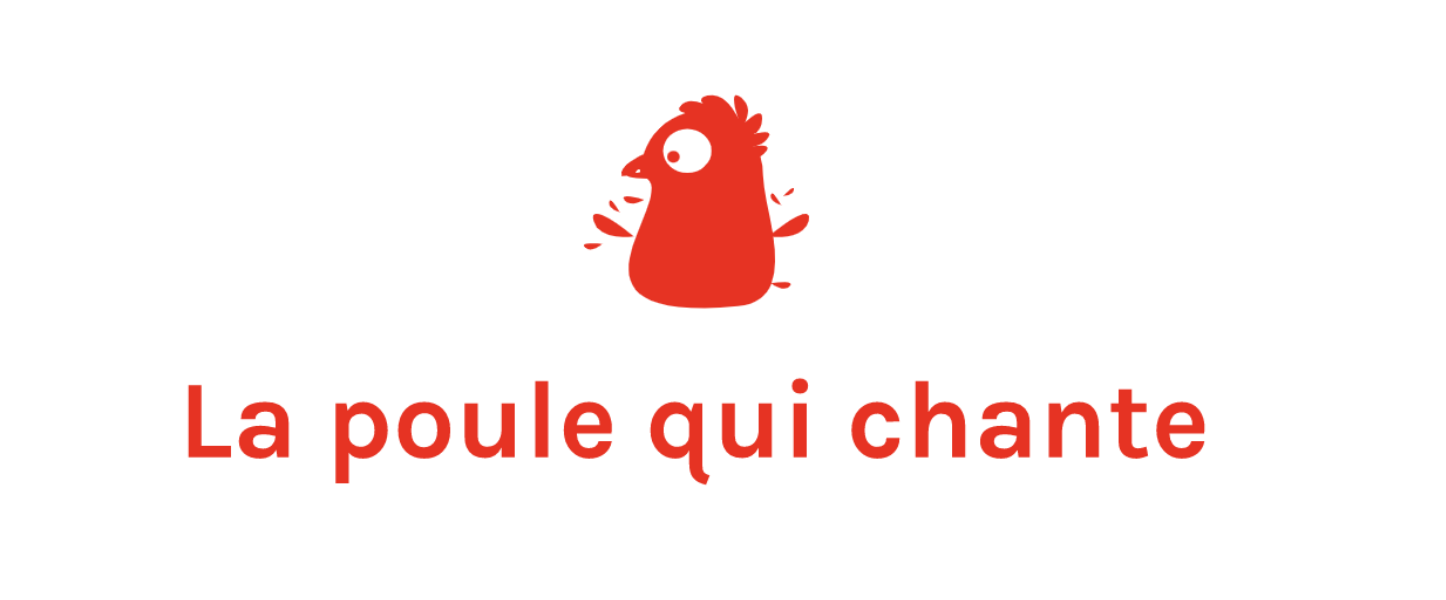

</center>

La poule qui chante, une entreprise française d’agroalimentaire souhaite se développer à l'international.<br><br>
L'international, oui, mais pour l'instant, le champ des possibles est bien large : aucun pays particulier ni aucun continent n'est pour le moment choisi. Tous les pays sont envisageables !<br>
L' objectif sera de proposer une première analyse des groupements de pays que l’on peut cibler pour exporter les poulets.

Partie analyse :

- Tester la classification ascendante hiérarchique, avec un dendrogramme comme visualisation.
- Utiliser la méthode des k-means, afin d’affiner l’analyse et comparer les résultats des deux méthodes de clustering.
- Réaliser une ACP afin de visualiser les résultats de l’analyse, comprendre les groupes, les liens entre les variables, les liens entre les individus…


# Paramétrage de l'environnement

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import sklearn as sk
import statsmodels.formula.api as smf
import statsmodels.api as sm
from termcolor import colored

import warnings
warnings.simplefilter(action='ignore', category=Warning)
%matplotlib inline
from functions import *

In [2]:
# paramétrage de l'environnement graphique

sns.set_theme(context='notebook', style='whitegrid', palette='pastel')


# Exploratory Data Analysis (EDA)

In [3]:
disp_alim = pd.read_csv('DisponibiliteAlimentaire_2017.csv')
pop = pd.read_csv('Population_2000_2018.csv')

## Disponibilité alimentaire

UNIQUE:
Code Domaine                 1
Domaine                      1
Code zone                  174
Zone                       174
Code Élément                17
Élément                     17
Code Produit                98
Produit                     98
Code année                   1
Année                        1
Unité                        4
Valeur                    7250
Symbole                      2
Description du Symbole       2
dtype: int64

----------------------
COUNT:
Code Domaine              176600
Domaine                   176600
Code zone                 176600
Zone                      176600
Code Élément              176600
Élément                   176600
Code Produit              176600
Produit                   176600
Code année                176600
Année                     176600
Unité                     176600
Valeur                    176600
Symbole                   176600
Description du Symbole    176600
dtype: int64

----------------------
NULL:
Code Doma

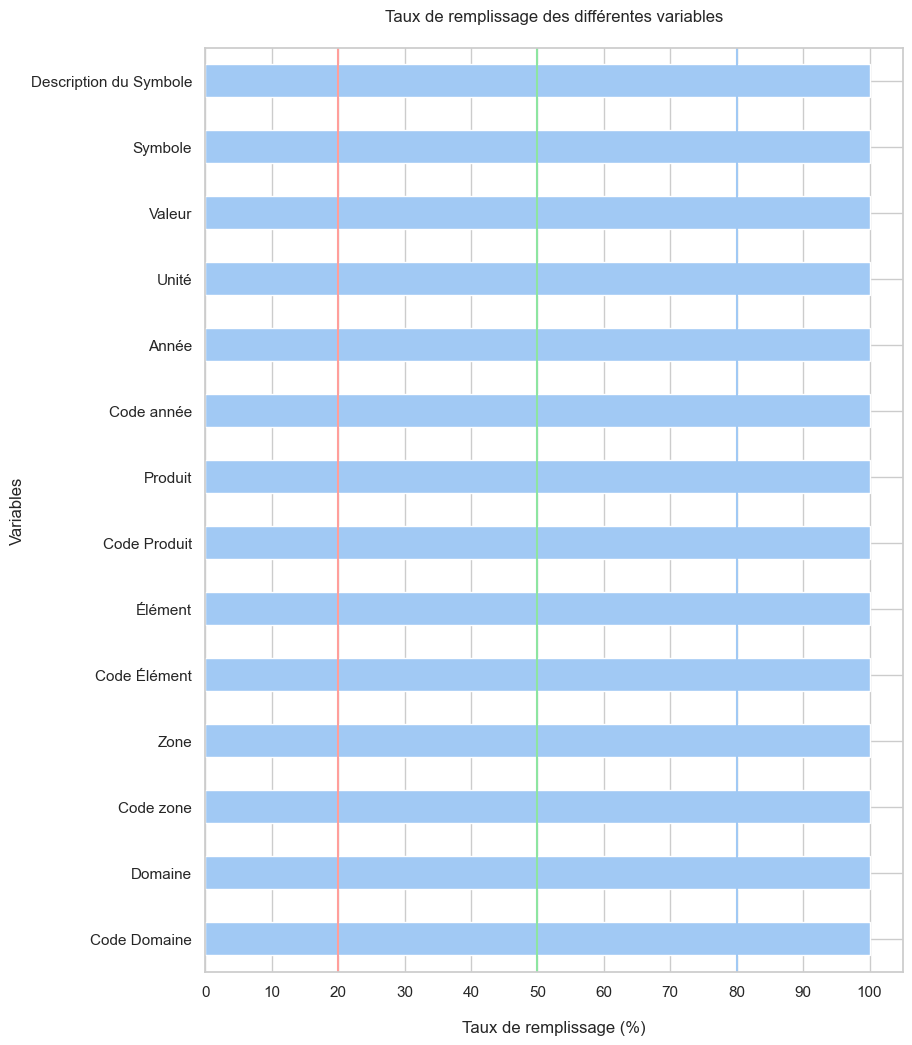

Code Domaine                      Domaine  Code zone         Zone  \
0               FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
1               FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
2               FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
3               FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
4               FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
...             ...                          ...        ...          ...   
176595          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   
176596          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   
176597          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   
176598          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   
176599          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   

        Code Élément                                            Élément  \
0               5511                                         Production   
1               5611                            Importations - Quantité   
2               5072                                 Variation de stock   
3               5911                            Exportations - Quantité   
4               5301                           Disponibilité intérieure   
...              ...                                                ...   
176595          5142                                         Nourriture   
176596           645  Disponibilité alimentaire en quantité (kg/pers...   
176597           664     Disponibilité alimentaire (Kcal/personne/jour)   
176598           674  Disponibilité de protéines en quantité (g/pers...   
176599           684  Disponibilité de matière grasse en quantité (g...   

        Code Produit          Produit  Code année  Année               Unité  \
0               2511  Blé et produits        2017   2017  Milliers de tonnes   
1               2511  Blé et produits        2017   2017  Milliers de tonnes   
2               2511  Blé et produits        2017   2017  Milliers de tonnes   
3               2511  Blé et produits        2017   2017  Milliers de tonnes   
4               2511  Blé et produits        2017   2017  Milliers de tonnes   
...              ...              ...         ...    ...                 ...   
176595          2899     Miscellanees        2017   2017  Milliers de tonnes   
176596          2899     Miscellanees        2017   2017                  kg   
176597          2899     Miscellanees        2017   2017  Kcal/personne/jour   
176598          2899     Miscellanees        2017   2017     g/personne/jour   
176599          2899     Miscellanees        2017   2017     g/personne/jour   

         Valeur Symbole Description du Symbole  
0       4281.00       S  Données standardisées  
1       2302.00       S  Données standardisées  
2       -119.00       S  Données standardisées  
3          0.00       S  Données standardisées  
4       6701.00       S  Données standardisées  
...         ...     ...                    ...  
176595    19.00       S  Données standardisées  
176596     1.33      Fc        Donnée calculée  
176597     1.00      Fc        Donnée calculée  
176598     0.04      Fc        Donnée calculée  
176599     0.02      Fc        Donnée calculée  

[176600 rows x 14 columns]

In [4]:
# Vérification du df

verif(disp_alim)
      
disp_alim

In [5]:
#Analyse des modalités de la variable 'Élément' qui semble avoir une importance pour l'étude
#Fonction .unique() permet de les afficher

disp_alim['Élément'].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure',
       'Aliments pour animaux', 'Semences', 'Pertes', 'Résidus',
       'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Alimentation pour touristes'], dtype=object)

In [6]:
# Vérification de présence de la ressource volailles dans la variable Produit

#disp_alim['Produit'].unique()

substring = 'vol'
mask = disp_alim.applymap(lambda x: substring in x.lower() if isinstance(x,str) else False).to_numpy()
disp_alim.loc[mask]  

Code Domaine                      Domaine  Code zone         Zone  \
651             FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
652             FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
653             FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
654             FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
655             FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
...             ...                          ...        ...          ...   
176396          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   
176397          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   
176398          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   
176399          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   
176400          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   

        Code Élément                                            Élément  \
651             5511                                         Production   
652             5611                            Importations - Quantité   
653             5072                                 Variation de stock   
654             5301                           Disponibilité intérieure   
655             5123                                             Pertes   
...              ...                                                ...   
176396          5142                                         Nourriture   
176397           645  Disponibilité alimentaire en quantité (kg/pers...   
176398           664     Disponibilité alimentaire (Kcal/personne/jour)   
176399           674  Disponibilité de protéines en quantité (g/pers...   
176400           684  Disponibilité de matière grasse en quantité (g...   

        Code Produit              Produit  Code année  Année  \
651             2734  Viande de Volailles        2017   2017   
652             2734  Viande de Volailles        2017   2017   
653             2734  Viande de Volailles        2017   2017   
654             2734  Viande de Volailles        2017   2017   
655             2734  Viande de Volailles        2017   2017   
...              ...                  ...         ...    ...   
176396          2734  Viande de Volailles        2017   2017   
176397          2734  Viande de Volailles        2017   2017   
176398          2734  Viande de Volailles        2017   2017   
176399          2734  Viande de Volailles        2017   2017   
176400          2734  Viande de Volailles        2017   2017   

                     Unité  Valeur Symbole Description du Symbole  
651     Milliers de tonnes   28.00       S  Données standardisées  
652     Milliers de tonnes   29.00       S  Données standardisées  
653     Milliers de tonnes    0.00       S  Données standardisées  
654     Milliers de tonnes   57.00       S  Données standardisées  
655     Milliers de tonnes    2.00       S  Données standardisées  
...                    ...     ...     ...                    ...  
176396  Milliers de tonnes   67.00       S  Données standardisées  
176397                  kg    4.68      Fc        Donnée calculée  
176398  Kcal/personne/jour   16.00      Fc        Donnée calculée  
176399     g/personne/jour    1.59      Fc        Donnée calculée  
176400     g/personne/jour    0.99      Fc        Donnée calculée  

[2061 rows x 14 columns]

<h2> DF disponibilité alimentaire totale

In [7]:
#Méthode .pivot_table() utile pour rendre le dataframe exploitable selon les modalités précédentes

disp_alim_tot = disp_alim.pivot_table(index=['Zone'], 
                                            columns='Élément', values='Valeur', aggfunc=sum).reset_index()
disp_alim_tot

Élément                   Zone  Alimentation pour touristes  \
0                  Afghanistan                          NaN   
1               Afrique du Sud                          0.0   
2                      Albanie                          NaN   
3                      Algérie                          0.0   
4                    Allemagne                          NaN   
..                         ...                          ...   
169        Émirats arabes unis                          NaN   
170                   Équateur                          0.0   
171      États-Unis d'Amérique                          NaN   
172                   Éthiopie                          0.0   
173               Îles Salomon                        182.0   

Élément  Aliments pour animaux  Autres utilisations (non alimentaire)  \
0                        456.0                                   94.0   
1                       9371.0                                 1448.0   
2                        697.0                                  177.0   
3                       4884.0                                 2405.0   
4                      30904.0                                 8316.0   
..                         ...                                    ...   
169                     1479.0                                 2661.0   
170                     1017.0                                 2475.0   
171                   151389.0                               171964.0   
172                     4710.0                                 4126.0   
173                       15.0                                   11.0   

Élément  Disponibilité alimentaire (Kcal/personne/jour)  \
0                                                1997.0   
1                                                2987.0   
2                                                3400.0   
3                                                3345.0   
4                                                3559.0   
..                                                  ...   
169                                              3370.0   
170                                              2585.0   
171                                              3762.0   
172                                              2304.0   
173                                              2410.0   

Élément  Disponibilité alimentaire en quantité (kg/personne/an)  \
0                                                   357.31        
1                                                   556.42        
2                                                  1260.49        
3                                                   798.71        
4                                                   943.24        
..                                                     ...        
169                                                 627.67        
170                                                 563.62        
171                                                 990.38        
172                                                 361.77        
173                                                 659.79        

Élément  Disponibilité de matière grasse en quantité (g/personne/jour)  \
0                                                    30.63               
1                                                    81.92               
2                                                   117.57               
3                                                    79.62               
4                                                   147.96               
..                                                     ...               
169                                                  89.31               
170                                                  89.24               
171                                                 167.00               
172                                                  26.80               
173                                   

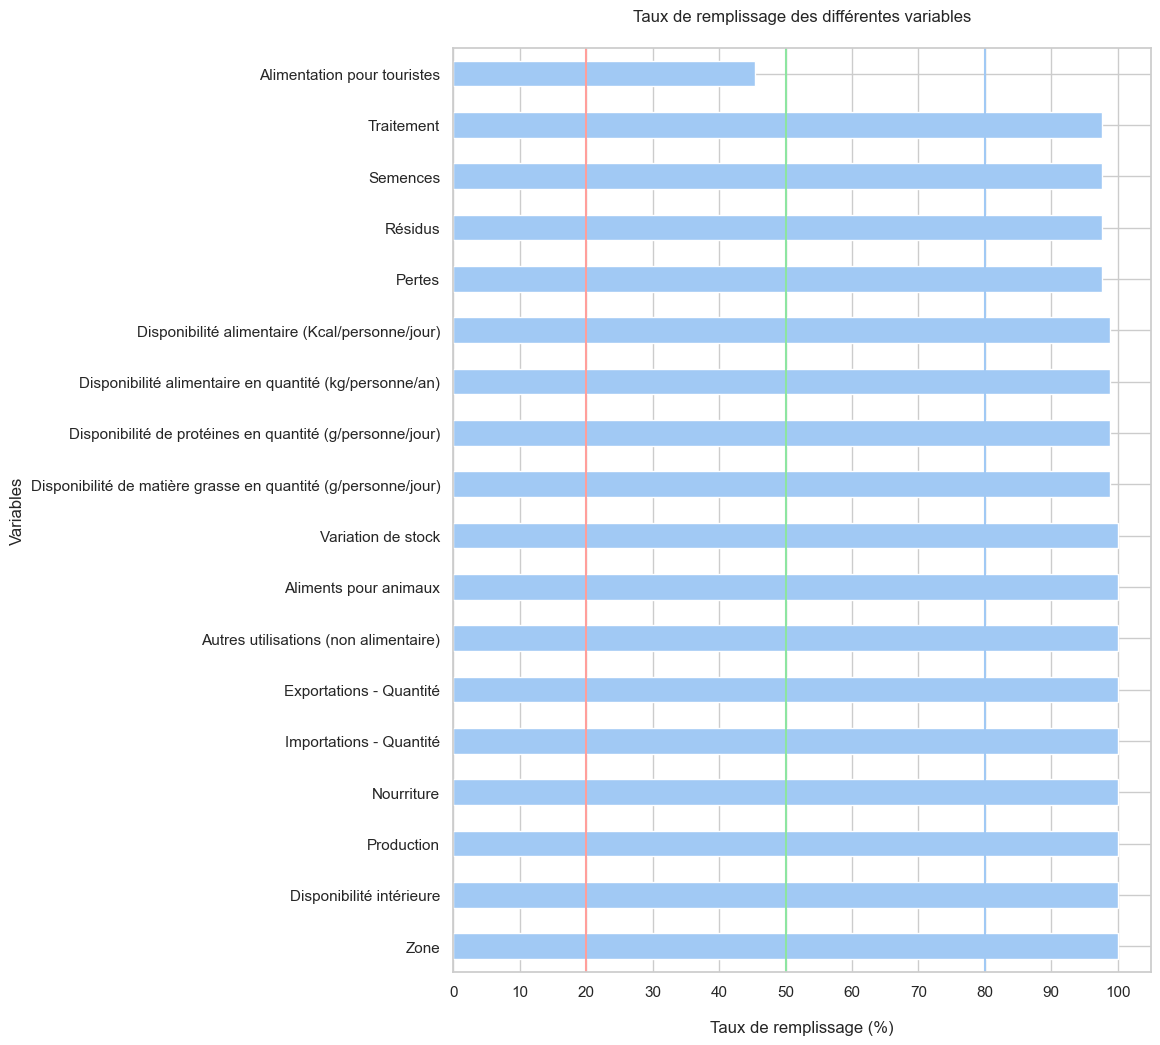

In [8]:
taux_nul(disp_alim_tot)

In [9]:
#Suppression des colonnes inutiles pour l'analyse, conservation de toutes les disponibilités, des origines et pays
disp_alim_tot.drop(['Alimentation pour touristes','Aliments pour animaux', 'Autres utilisations (non alimentaire)','Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité de matière grasse en quantité (g/personne/jour)',
                'Disponibilité intérieure', 'Exportations - Quantité', 'Importations - Quantité', 'Nourriture',
                'Pertes', 'Production', 'Semences', 'Traitement', 'Variation de stock','Résidus'], axis=1, inplace=True)

disp_alim_tot.head()

Élément            Zone  Disponibilité alimentaire (Kcal/personne/jour)  \
0           Afghanistan                                          1997.0   
1        Afrique du Sud                                          2987.0   
2               Albanie                                          3400.0   
3               Algérie                                          3345.0   
4             Allemagne                                          3559.0   

Élément  Disponibilité de protéines en quantité (g/personne/jour)  
0                                                    54.09         
1                                                    83.36         
2                                                   119.50         
3                                                    92.85         
4                                                   104.07

UNIQUE:
Élément
Zone                                                        174
Disponibilité alimentaire (Kcal/personne/jour)              166
Disponibilité de protéines en quantité (g/personne/jour)    169
dtype: int64

----------------------
COUNT:
Élément
Zone                                                        174
Disponibilité alimentaire (Kcal/personne/jour)              172
Disponibilité de protéines en quantité (g/personne/jour)    172
dtype: int64

----------------------
NULL:
Élément
Zone                                                        0
Disponibilité alimentaire (Kcal/personne/jour)              2
Disponibilité de protéines en quantité (g/personne/jour)    2
dtype: int64

----------------------
Taux de valeurs manquantes (%):
Élément
Zone                                                        0.00
Disponibilité alimentaire (Kcal/personne/jour)              1.15
Disponibilité de protéines en quantité (g/personne/jour)    1.15
dtype: float64

----------------------


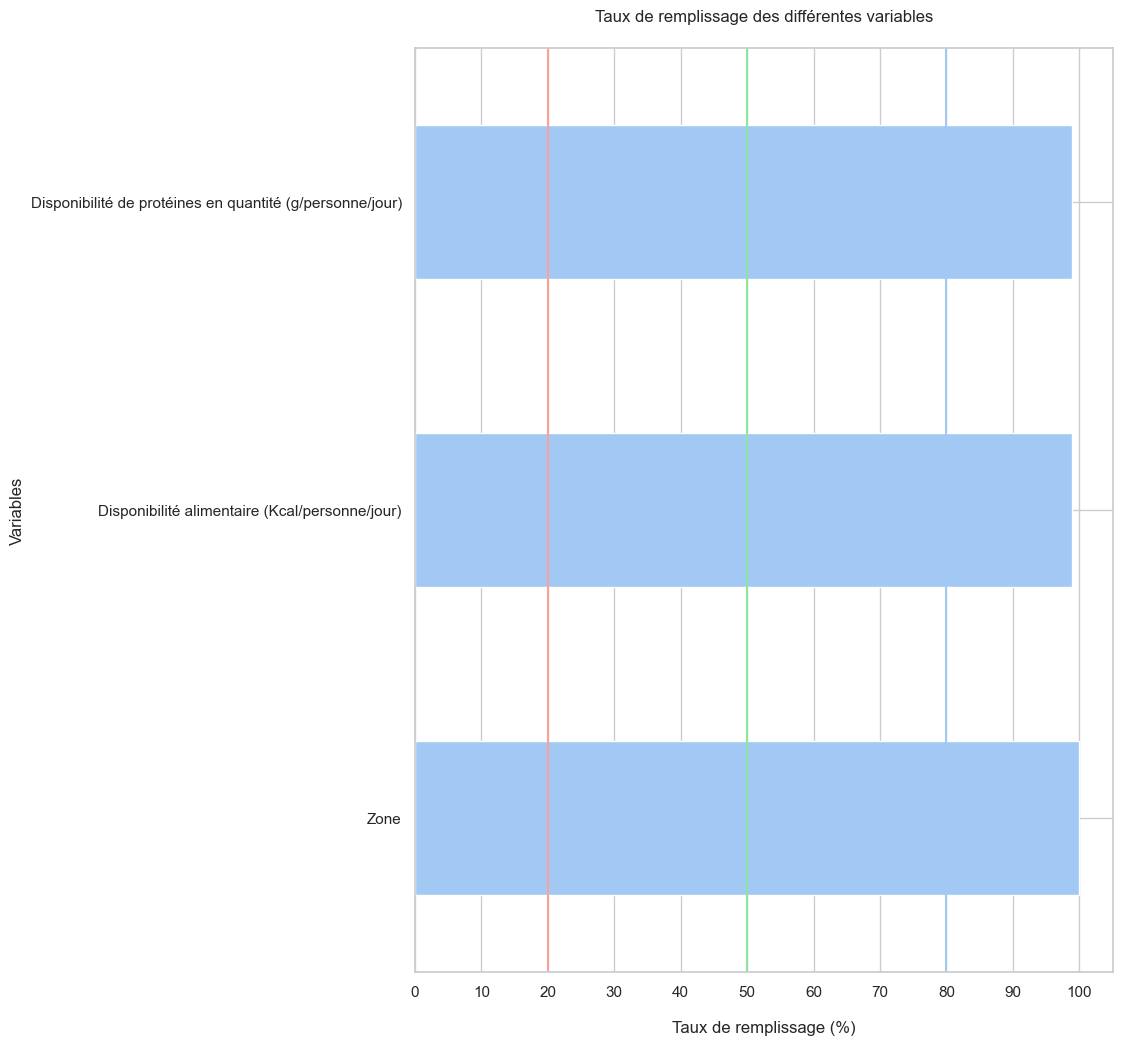

In [10]:
verif(disp_alim_tot)

In [11]:
disp_alim_tot[disp_alim_tot.isna().any(axis=1)]

Élément               Zone  Disponibilité alimentaire (Kcal/personne/jour)  \
18                Bermudes                                             NaN   
22       Brunéi Darussalam                                             NaN   

Élément  Disponibilité de protéines en quantité (g/personne/jour)  
18                                                     NaN         
22                                                     NaN

In [12]:
disp_alim_tot.fillna(0, inplace = True)
disp_alim_tot.isna().sum()

Élément
Zone                                                        0
Disponibilité alimentaire (Kcal/personne/jour)              0
Disponibilité de protéines en quantité (g/personne/jour)    0
dtype: int64

<h2> DF disponibilités alimentaire volailles

In [13]:
# Création d'un df avec uniquement les informations concernant la volailles

disp_alim_v = disp_alim.loc[disp_alim['Produit'] == 'Viande de Volailles']
disp_alim_v

Code Domaine                      Domaine  Code zone         Zone  \
651             FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
652             FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
653             FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
654             FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
655             FBS  Nouveaux Bilans Alimentaire          2  Afghanistan   
...             ...                          ...        ...          ...   
176396          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   
176397          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   
176398          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   
176399          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   
176400          FBS  Nouveaux Bilans Alimentaire        181     Zimbabwe   

        Code Élément                                            Élément  \
651             5511                                         Production   
652             5611                            Importations - Quantité   
653             5072                                 Variation de stock   
654             5301                           Disponibilité intérieure   
655             5123                                             Pertes   
...              ...                                                ...   
176396          5142                                         Nourriture   
176397           645  Disponibilité alimentaire en quantité (kg/pers...   
176398           664     Disponibilité alimentaire (Kcal/personne/jour)   
176399           674  Disponibilité de protéines en quantité (g/pers...   
176400           684  Disponibilité de matière grasse en quantité (g...   

        Code Produit              Produit  Code année  Année  \
651             2734  Viande de Volailles        2017   2017   
652             2734  Viande de Volailles        2017   2017   
653             2734  Viande de Volailles        2017   2017   
654             2734  Viande de Volailles        2017   2017   
655             2734  Viande de Volailles        2017   2017   
...              ...                  ...         ...    ...   
176396          2734  Viande de Volailles        2017   2017   
176397          2734  Viande de Volailles        2017   2017   
176398          2734  Viande de Volailles        2017   2017   
176399          2734  Viande de Volailles        2017   2017   
176400          2734  Viande de Volailles        2017   2017   

                     Unité  Valeur Symbole Description du Symbole  
651     Milliers de tonnes   28.00       S  Données standardisées  
652     Milliers de tonnes   29.00       S  Données standardisées  
653     Milliers de tonnes    0.00       S  Données standardisées  
654     Milliers de tonnes   57.00       S  Données standardisées  
655     Milliers de tonnes    2.00       S  Données standardisées  
...                    ...     ...     ...                    ...  
176396  Milliers de tonnes   67.00       S  Données standardisées  
176397                  kg    4.68      Fc        Donnée calculée  
176398  Kcal/personne/jour   16.00      Fc        Donnée calculée  
176399     g/personne/jour    1.59      Fc        Donnée calculée  
176400     g/personne/jour    0.99      Fc        Donnée calculée  

[2061 rows x 14 columns]

In [14]:
# Vérification de la variable "Élément"

disp_alim['Élément'].unique()

array(['Production', 'Importations - Quantité', 'Variation de stock',
       'Exportations - Quantité', 'Disponibilité intérieure',
       'Aliments pour animaux', 'Semences', 'Pertes', 'Résidus',
       'Nourriture',
       'Disponibilité alimentaire en quantité (kg/personne/an)',
       'Disponibilité alimentaire (Kcal/personne/jour)',
       'Disponibilité de protéines en quantité (g/personne/jour)',
       'Disponibilité de matière grasse en quantité (g/personne/jour)',
       'Traitement', 'Autres utilisations (non alimentaire)',
       'Alimentation pour touristes'], dtype=object)

In [15]:
# Faire un pivot de la variable "Élément" et vérifier le nombre de valeurs nulles par colonne

df_alim_v=disp_alim_v.pivot_table(index='Zone', columns='Élément', values = 'Valeur')
df_alim_v

Élément                Alimentation pour touristes  Aliments pour animaux  \
Zone                                                                        
Afghanistan                                    NaN                    NaN   
Afrique du Sud                                 0.0                    NaN   
Albanie                                        NaN                    NaN   
Algérie                                        0.0                    NaN   
Allemagne                                      NaN                    NaN   
...                                            ...                    ...   
Émirats arabes unis                            NaN                    NaN   
Équateur                                       0.0                    NaN   
États-Unis d'Amérique                          NaN                    NaN   
Éthiopie                                       0.0                    NaN   
Îles Salomon                                   0.0                    NaN   

Élément                Autres utilisations (non alimentaire)  \
Zone                                                           
Afghanistan                                              NaN   
Afrique du Sud                                           NaN   
Albanie                                                  NaN   
Algérie                                                  NaN   
Allemagne                                                NaN   
...                                                      ...   
Émirats arabes unis                                      NaN   
Équateur                                                 NaN   
États-Unis d'Amérique                                   89.0   
Éthiopie                                                 NaN   
Îles Salomon                                             NaN   

Élément                Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                    
Afghanistan                                                       5.0   
Afrique du Sud                                                  143.0   
Albanie                                                          85.0   
Algérie                                                          22.0   
Allemagne                                                        71.0   
...                                                               ...   
Émirats arabes unis                                             147.0   
Équateur                                                         83.0   
États-Unis d'Amérique                                           219.0   
Éthiopie                                                          0.0   
Îles Salomon                                                     18.0   

Élément                Disponibilité alimentaire en quantité (kg/personne/an)  \
Zone                                                                            
Afghanistan                                                         1.53        
Afrique du Sud                                                     35.69        
Albanie                                                            16.36        
Algérie                                                             6.38        
Allemagne                                                          19.47        
...                                                                  ...        
Émirats arabes unis                                                43.47        
Équateur                                                           19.31        
États-Unis d'Amérique                                              55.68        
Éthiopie                                                            0.13        
Îles Salomon                                                        4.45        

Élément                Disponibilité de matière grasse en quantité (g/personne/jour)  \
Zone                                                                     

In [16]:
#Suppression des colonnes inutiles pour l'analyse, conservation des disponibilités alimentaire,protéines, exportation/importation, production et pays

df_alim_v.drop(['Alimentation pour touristes','Aliments pour animaux', 'Autres utilisations (non alimentaire)','Disponibilité alimentaire en quantité (kg/personne/an)', 'Disponibilité de matière grasse en quantité (g/personne/jour)',
              'Nourriture','Pertes','Résidus','Semences', 'Traitement', 'Variation de stock','Exportations - Quantité'], axis=1, inplace=True)
df_alim_v

Élément                Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                                    
Afghanistan                                                       5.0   
Afrique du Sud                                                  143.0   
Albanie                                                          85.0   
Algérie                                                          22.0   
Allemagne                                                        71.0   
...                                                               ...   
Émirats arabes unis                                             147.0   
Équateur                                                         83.0   
États-Unis d'Amérique                                           219.0   
Éthiopie                                                          0.0   
Îles Salomon                                                     18.0   

Élément                Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                              
Afghanistan                                                         0.54          
Afrique du Sud                                                     14.11          
Albanie                                                             6.26          
Algérie                                                             1.97          
Allemagne                                                           7.96          
...                                                                  ...          
Émirats arabes unis                                                14.80          
Équateur                                                            6.15          
États-Unis d'Amérique                                              19.93          
Éthiopie                                                            0.04          
Îles Salomon                                                        1.51          

Élément                Disponibilité intérieure  Importations - Quantité  \
Zone                                                                       
Afghanistan                                57.0                     29.0   
Afrique du Sud                           2118.0                    514.0   
Albanie                                    47.0                     38.0   
Algérie                                   277.0                      2.0   
Allemagne                                1739.0                    842.0   
...                                         ...                      ...   
Émirats arabes unis                       412.0                    433.0   
Équateur                                  341.0                      0.0   
États-Unis d'Amérique                   18266.0                    123.0   
Éthiopie                                   14.0                      1.0   
Îles Salomon                                3.0                      6.0   

Élément                Production  
Zone                               
Afghanistan                  28.0  
Afrique du Sud             1667.0  
Albanie                      13.0  
Algérie                     275.0  
Allemagne                  1514.0  
...                           ...  
Émirats arabes unis          48.0  
Équateur                    340.0  
États-Unis d'Amérique     21914.0  
Éthiopie                     14.0  
Îles Salomon                  0.0  

[172 rows x 5 columns]

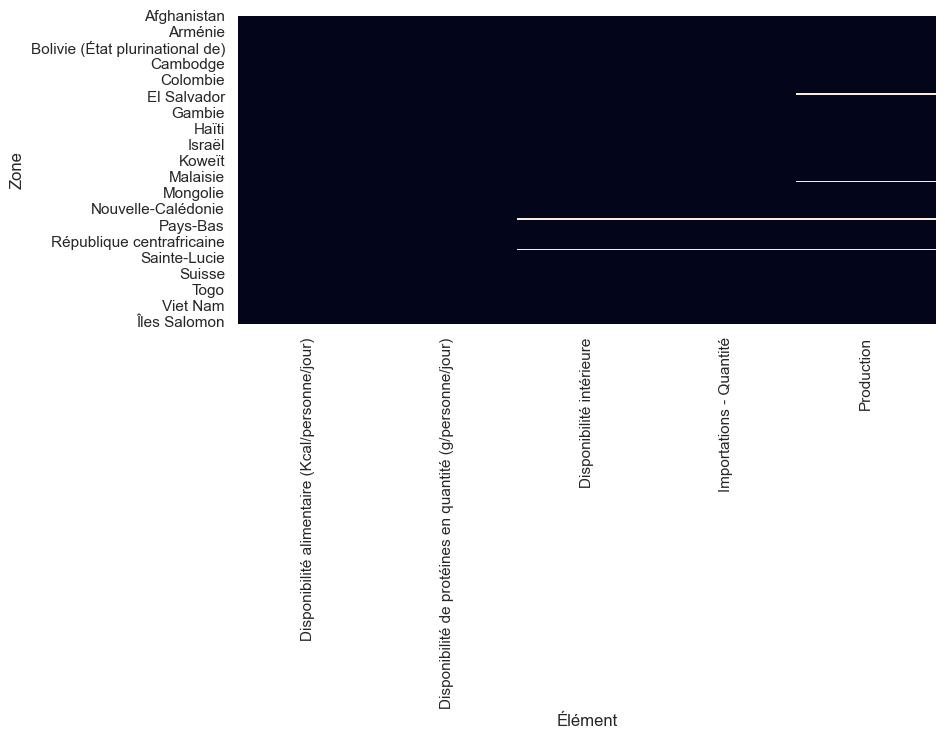

In [17]:
# Vérification de présence de valeurs nulle

isna(df_alim_v)

In [18]:
# Taux de valeurs manquantes

taux_valeurs_manquante = df_alim_v.isna().sum()*100 /len(df_alim_v)
print('Taux de valeurs manquantes (%) = ')
round(taux_valeurs_manquante,2)

Taux de valeurs manquantes (%) = 


Élément
Disponibilité alimentaire (Kcal/personne/jour)              0.00
Disponibilité de protéines en quantité (g/personne/jour)    0.00
Disponibilité intérieure                                    1.16
Importations - Quantité                                     1.16
Production                                                  2.33
dtype: float64

In [19]:
# remplacement des valeurs manquantes

df_alim_v.fillna(0, inplace = True)
df_alim_v.head()

Élément         Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                             
Afghanistan                                                5.0   
Afrique du Sud                                           143.0   
Albanie                                                   85.0   
Algérie                                                   22.0   
Allemagne                                                 71.0   

Élément         Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                       
Afghanistan                                                  0.54          
Afrique du Sud                                              14.11          
Albanie                                                      6.26          
Algérie                                                      1.97          
Allemagne                                                    7.96          

Élément         Disponibilité intérieure  Importations - Quantité  Production  
Zone                                                                           
Afghanistan                         57.0                     29.0        28.0  
Afrique du Sud                    2118.0                    514.0      1667.0  
Albanie                             47.0                     38.0        13.0  
Algérie                            277.0                      2.0       275.0  
Allemagne                         1739.0                    842.0      1514.0

<h3> Création de variables supplémentaires

In [20]:
# calculer dans 2 nouvelles variables le Taux d'importation et le Taux de suffisance

df_alim_v['% Taux importation (volailles)']=round((df_alim_v['Importations - Quantité']/df_alim_v['Disponibilité intérieure'])*100,2)
df_alim_v['% Taux suffisance (volailles)']=round((df_alim_v['Production']/df_alim_v['Disponibilité intérieure'])*100,2)

df_alim_v.head()

Élément         Disponibilité alimentaire (Kcal/personne/jour)  \
Zone                                                             
Afghanistan                                                5.0   
Afrique du Sud                                           143.0   
Albanie                                                   85.0   
Algérie                                                   22.0   
Allemagne                                                 71.0   

Élément         Disponibilité de protéines en quantité (g/personne/jour)  \
Zone                                                                       
Afghanistan                                                  0.54          
Afrique du Sud                                              14.11          
Albanie                                                      6.26          
Algérie                                                      1.97          
Allemagne                                                    7.96          

Élément         Disponibilité intérieure  Importations - Quantité  Production  \
Zone                                                                            
Afghanistan                         57.0                     29.0        28.0   
Afrique du Sud                    2118.0                    514.0      1667.0   
Albanie                             47.0                     38.0        13.0   
Algérie                            277.0                      2.0       275.0   
Allemagne                         1739.0                    842.0      1514.0   

Élément         % Taux importation (volailles)  % Taux suffisance (volailles)  
Zone                                                                           
Afghanistan                              50.88                          49.12  
Afrique du Sud                           24.27                          78.71  
Albanie                                  80.85                          27.66  
Algérie                                   0.72                          99.28  
Allemagne                                48.42                          87.06

Plus le Taux d'importation est élevé plus la dépendance du pays à l'importation est forte<br>
Plus la production est élevé plus le taux de suffisance est forte

In [21]:
# dataset avec les colonnes à utiliser pour les jointures et en suite notre analyse

df_alim_v.rename(columns ={"Disponibilité alimentaire (Kcal/personne/jour)": "Volailles (Kcal/pers/jour)","Disponibilité de protéines en quantité (g/personne/jour)": "Proteine volailles (g/pers/jour)" }, inplace= True)
df_alim_v.drop(['Disponibilité intérieure','Importations - Quantité','Production'], axis=1, inplace=True)
df_alim_v


Élément                Volailles (Kcal/pers/jour)  \
Zone                                                
Afghanistan                                   5.0   
Afrique du Sud                              143.0   
Albanie                                      85.0   
Algérie                                      22.0   
Allemagne                                    71.0   
...                                           ...   
Émirats arabes unis                         147.0   
Équateur                                     83.0   
États-Unis d'Amérique                       219.0   
Éthiopie                                      0.0   
Îles Salomon                                 18.0   

Élément                Proteine volailles (g/pers/jour)  \
Zone                                                      
Afghanistan                                        0.54   
Afrique du Sud                                    14.11   
Albanie                                            6.26   
Algérie                                            1.97   
Allemagne                                          7.96   
...                                                 ...   
Émirats arabes unis                               14.80   
Équateur                                           6.15   
États-Unis d'Amérique                             19.93   
Éthiopie                                           0.04   
Îles Salomon                                       1.51   

Élément                % Taux importation (volailles)  \
Zone                                                    
Afghanistan                                     50.88   
Afrique du Sud                                  24.27   
Albanie                                         80.85   
Algérie                                          0.72   
Allemagne                                       48.42   
...                                               ...   
Émirats arabes unis                            105.10   
Équateur                                         0.00   
États-Unis d'Amérique                            0.67   
Éthiopie                                         7.14   
Îles Salomon                                   200.00   

Élément                % Taux suffisance (volailles)  
Zone                                                  
Afghanistan                                    49.12  
Afrique du Sud                                 78.71  
Albanie                                        27.66  
Algérie                                        99.28  
Allemagne                                      87.06  
...                                              ...  
Émirats arabes unis                            11.65  
Équateur                                       99.71  
États-Unis d'Amérique                         119.97  
Éthiopie                                      100.00  
Îles Salomon                                    0.00  

[172 rows x 4 columns]

UNIQUE:
Élément
Volailles (Kcal/pers/jour)          112
Proteine volailles (g/pers/jour)    164
% Taux importation (volailles)      139
% Taux suffisance (volailles)       146
dtype: int64

----------------------
COUNT:
Élément
Volailles (Kcal/pers/jour)          172
Proteine volailles (g/pers/jour)    172
% Taux importation (volailles)      170
% Taux suffisance (volailles)       170
dtype: int64

----------------------
NULL:
Élément
Volailles (Kcal/pers/jour)          0
Proteine volailles (g/pers/jour)    0
% Taux importation (volailles)      2
% Taux suffisance (volailles)       2
dtype: int64

----------------------
Taux de valeurs manquantes (%):
Élément
Volailles (Kcal/pers/jour)          0.00
Proteine volailles (g/pers/jour)    0.00
% Taux importation (volailles)      1.16
% Taux suffisance (volailles)       1.16
dtype: float64

----------------------
DUPLICATED:
0

----------------------


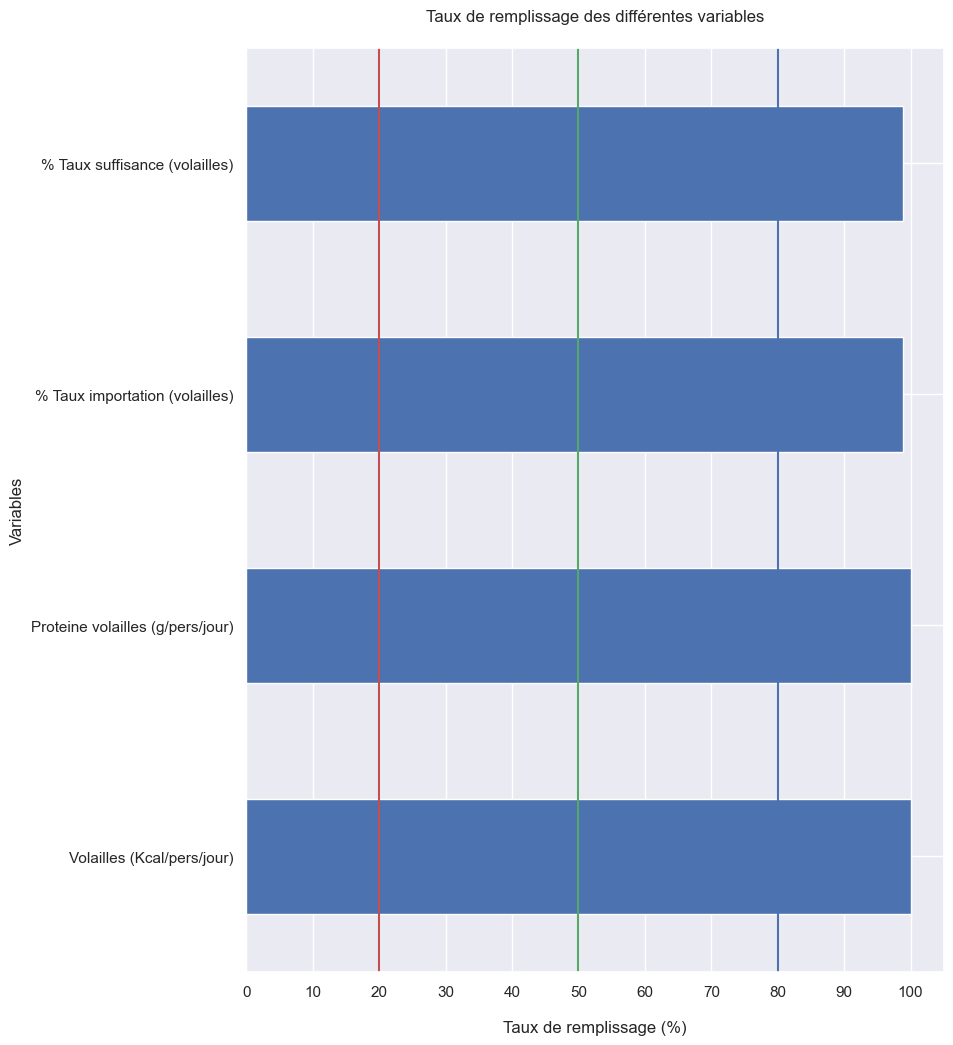

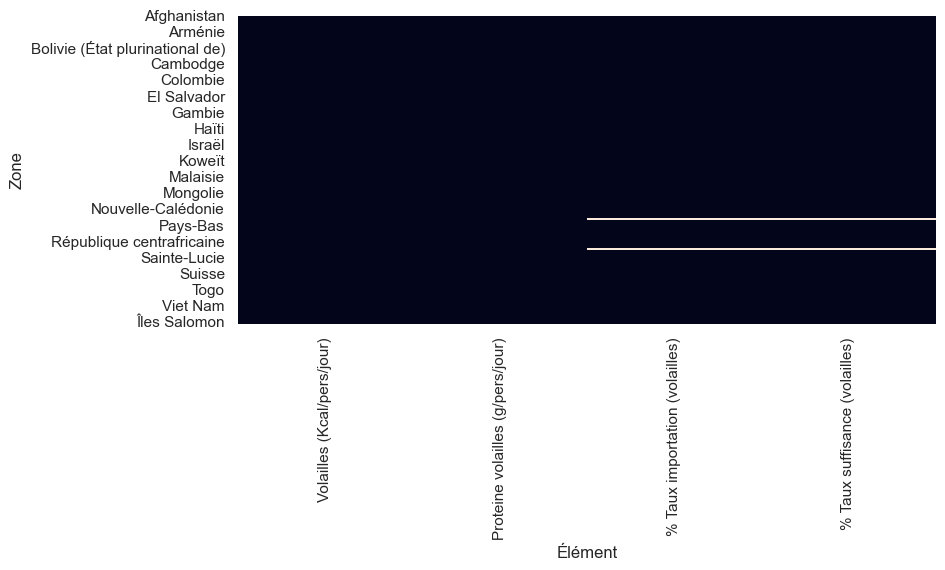

In [22]:
# Vérification du df
verif(df_alim_v)
isna(df_alim_v)

In [23]:
df_alim_v.isna().any().sum()

2

In [24]:
df_alim_v[df_alim_v.isna().any(axis=1)]

Élément                                Volailles (Kcal/pers/jour)  \
Zone                                                                
Ouzbékistan                                                   6.0   
République démocratique populaire lao                        41.0   

Élément                                Proteine volailles (g/pers/jour)  \
Zone                                                                      
Ouzbékistan                                                        0.63   
République démocratique populaire lao                              3.59   

Élément                                % Taux importation (volailles)  \
Zone                                                                    
Ouzbékistan                                                       NaN   
République démocratique populaire lao                             NaN   

Élément                                % Taux suffisance (volailles)  
Zone                                                                  
Ouzbékistan                                                      NaN  
République démocratique populaire lao                            NaN

In [25]:
df_alim_v.fillna(0, inplace = True)
print('Valeurs manquantes sur le df_alim : ' + str(df_alim_v.isna().any().sum()))

Valeurs manquantes sur le df_alim : 0


<h2> Jointure entre DF total & volailles

In [26]:
df = pd.merge(df_alim_v, disp_alim_tot, on='Zone', how= 'left')
df = df.rename(columns={"Zone" : "Pays","Disponibilité alimentaire (Kcal/personne/jour)": " Total calories (Kcal/pers/jour)",
                                  "Disponibilité de protéines en quantité (g/personne/jour)" : "Total prot (g/pers/jour)" })

df


Élément                   Pays  Volailles (Kcal/pers/jour)  \
0                  Afghanistan                         5.0   
1               Afrique du Sud                       143.0   
2                      Albanie                        85.0   
3                      Algérie                        22.0   
4                    Allemagne                        71.0   
..                         ...                         ...   
167        Émirats arabes unis                       147.0   
168                   Équateur                        83.0   
169      États-Unis d'Amérique                       219.0   
170                   Éthiopie                         0.0   
171               Îles Salomon                        18.0   

Élément  Proteine volailles (g/pers/jour)  % Taux importation (volailles)  \
0                                    0.54                           50.88   
1                                   14.11                           24.27   
2                                    6.26                           80.85   
3                                    1.97                            0.72   
4                                    7.96                           48.42   
..                                    ...                             ...   
167                                 14.80                          105.10   
168                                  6.15                            0.00   
169                                 19.93                            0.67   
170                                  0.04                            7.14   
171                                  1.51                          200.00   

Élément  % Taux suffisance (volailles)   Total calories (Kcal/pers/jour)  \
0                                49.12                            1997.0   
1                                78.71                            2987.0   
2                                27.66                            3400.0   
3                                99.28                            3345.0   
4                                87.06                            3559.0   
..                                 ...                               ...   
167                              11.65                            3370.0   
168                              99.71                            2585.0   
169                             119.97                            3762.0   
170                             100.00                            2304.0   
171                               0.00                            2410.0   

Élément  Total prot (g/pers/jour)  
0                           54.09  
1                           83.36  
2                          119.50  
3                           92.85  
4                          104.07  
..                            ...  
167                        107.26  
168                         65.77  
169                        113.61  
170                         65.64  
171                         53.64  

[172 rows x 7 columns]

<h3> Création d'une variable ratio proteines de volailles / proteines totale

In [27]:
# Création d'un variable représentation la portion disponible de protéines volailles / protéines totale 

df['% Prot Volailles/Total'] = round(df["Proteine volailles (g/pers/jour)"]/df["Total prot (g/pers/jour)"] * 100, 2)
df

Élément                   Pays  Volailles (Kcal/pers/jour)  \
0                  Afghanistan                         5.0   
1               Afrique du Sud                       143.0   
2                      Albanie                        85.0   
3                      Algérie                        22.0   
4                    Allemagne                        71.0   
..                         ...                         ...   
167        Émirats arabes unis                       147.0   
168                   Équateur                        83.0   
169      États-Unis d'Amérique                       219.0   
170                   Éthiopie                         0.0   
171               Îles Salomon                        18.0   

Élément  Proteine volailles (g/pers/jour)  % Taux importation (volailles)  \
0                                    0.54                           50.88   
1                                   14.11                           24.27   
2                                    6.26                           80.85   
3                                    1.97                            0.72   
4                                    7.96                           48.42   
..                                    ...                             ...   
167                                 14.80                          105.10   
168                                  6.15                            0.00   
169                                 19.93                            0.67   
170                                  0.04                            7.14   
171                                  1.51                          200.00   

Élément  % Taux suffisance (volailles)   Total calories (Kcal/pers/jour)  \
0                                49.12                            1997.0   
1                                78.71                            2987.0   
2                                27.66                            3400.0   
3                                99.28                            3345.0   
4                                87.06                            3559.0   
..                                 ...                               ...   
167                              11.65                            3370.0   
168                              99.71                            2585.0   
169                             119.97                            3762.0   
170                             100.00                            2304.0   
171                               0.00                            2410.0   

Élément  Total prot (g/pers/jour)  % Prot Volailles/Total  
0                           54.09                    1.00  
1                           83.36                   16.93  
2                          119.50                    5.24  
3                           92.85                    2.12  
4                          104.07                    7.65  
..                            ...                     ...  
167                        107.26                   13.80  
168                         65.77                    9.35  
169                        113.61                   17.54  
170                         65.64                    0.06  
171                         53.64                    2.82  

[172 rows x 8 columns]

In [28]:
# On supprime les variables inutiles ( avec le calcul du ratio de proteine de volailles, pas besoin de conserver les variables suivantes)

df.drop(['Volailles (Kcal/pers/jour)','Proteine volailles (g/pers/jour)',
       'Total prot (g/pers/jour)'], axis=1, inplace=True)
df

Élément                   Pays  % Taux importation (volailles)  \
0                  Afghanistan                           50.88   
1               Afrique du Sud                           24.27   
2                      Albanie                           80.85   
3                      Algérie                            0.72   
4                    Allemagne                           48.42   
..                         ...                             ...   
167        Émirats arabes unis                          105.10   
168                   Équateur                            0.00   
169      États-Unis d'Amérique                            0.67   
170                   Éthiopie                            7.14   
171               Îles Salomon                          200.00   

Élément  % Taux suffisance (volailles)   Total calories (Kcal/pers/jour)  \
0                                49.12                            1997.0   
1                                78.71                            2987.0   
2                                27.66                            3400.0   
3                                99.28                            3345.0   
4                                87.06                            3559.0   
..                                 ...                               ...   
167                              11.65                            3370.0   
168                              99.71                            2585.0   
169                             119.97                            3762.0   
170                             100.00                            2304.0   
171                               0.00                            2410.0   

Élément  % Prot Volailles/Total  
0                          1.00  
1                         16.93  
2                          5.24  
3                          2.12  
4                          7.65  
..                          ...  
167                       13.80  
168                        9.35  
169                       17.54  
170                        0.06  
171                        2.82  

[172 rows x 5 columns]

<h2> Population

UNIQUE:
Code Domaine                 1
Domaine                      1
Code zone                  238
Zone                       238
Code Élément                 1
Élément                      1
Code Produit                 1
Produit                      1
Code année                  19
Année                       19
Unité                        1
Valeur                    4398
Symbole                      2
Description du Symbole       2
Note                         1
dtype: int64

----------------------
COUNT:
Code Domaine              4411
Domaine                   4411
Code zone                 4411
Zone                      4411
Code Élément              4411
Élément                   4411
Code Produit              4411
Produit                   4411
Code année                4411
Année                     4411
Unité                     4411
Valeur                    4411
Symbole                   4411
Description du Symbole    4411
Note                       258
dtype: int64

----

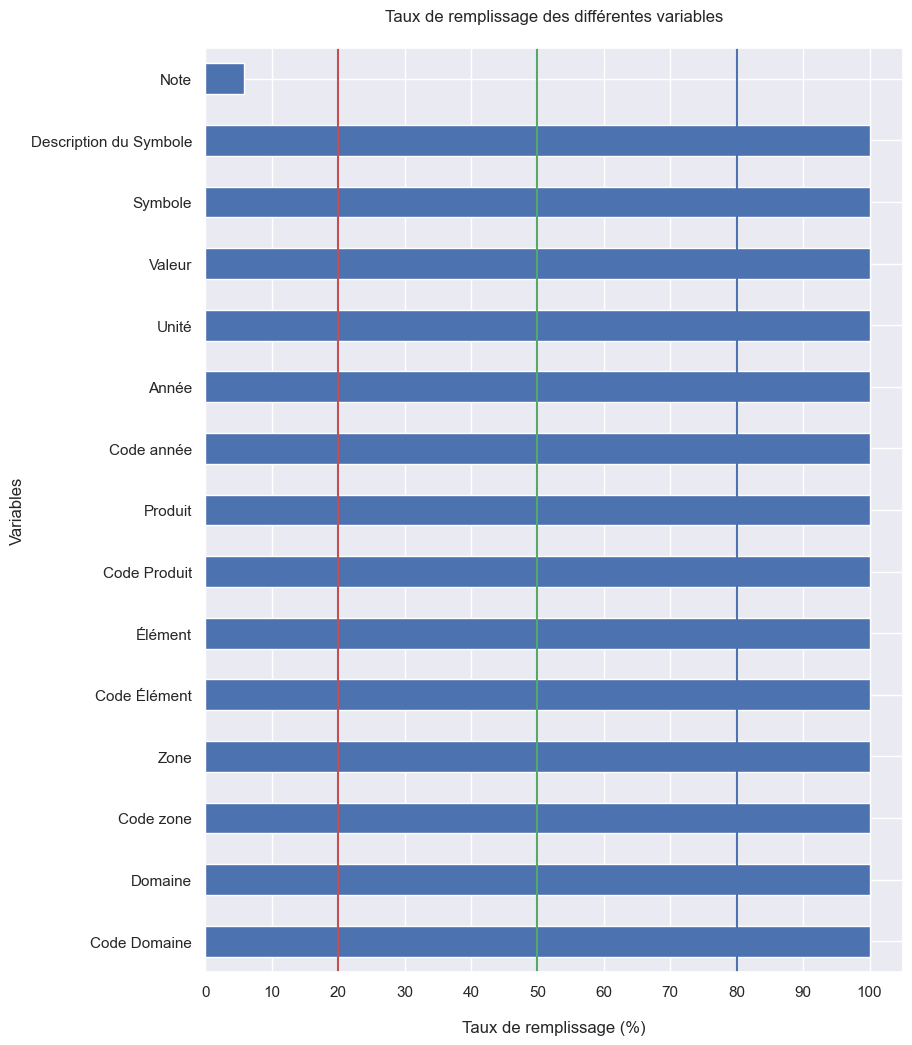

Code Domaine                       Domaine  Code zone         Zone  \
0              OA  Séries temporelles annuelles          2  Afghanistan   
1              OA  Séries temporelles annuelles          2  Afghanistan   
2              OA  Séries temporelles annuelles          2  Afghanistan   
3              OA  Séries temporelles annuelles          2  Afghanistan   
4              OA  Séries temporelles annuelles          2  Afghanistan   
...           ...                           ...        ...          ...   
4406           OA  Séries temporelles annuelles        181     Zimbabwe   
4407           OA  Séries temporelles annuelles        181     Zimbabwe   
4408           OA  Séries temporelles annuelles        181     Zimbabwe   
4409           OA  Séries temporelles annuelles        181     Zimbabwe   
4410           OA  Séries temporelles annuelles        181     Zimbabwe   

      Code Élément            Élément  Code Produit                 Produit  \
0              511  Population totale          3010  Population-Estimations   
1              511  Population totale          3010  Population-Estimations   
2              511  Population totale          3010  Population-Estimations   
3              511  Population totale          3010  Population-Estimations   
4              511  Population totale          3010  Population-Estimations   
...            ...                ...           ...                     ...   
4406           511  Population totale          3010  Population-Estimations   
4407           511  Population totale          3010  Population-Estimations   
4408           511  Population totale          3010  Population-Estimations   
4409           511  Population totale          3010  Population-Estimations   
4410           511  Population totale          3010  Population-Estimations   

      Code année  Année           Unité     Valeur Symbole  \
0           2000   2000  1000 personnes  20779.953       X   
1           2001   2001  1000 personnes  21606.988       X   
2           2002   2002  1000 personnes  22600.770       X   
3           2003   2003  1000 personnes  23680.871       X   
4           2004   2004  1000 personnes  24726.684       X   
...          ...    ...             ...        ...     ...   
4406        2014   2014  1000 personnes  13586.707       X   
4407        2015   2015  1000 personnes  13814.629       X   
4408        2016   2016  1000 personnes  14030.331       X   
4409        2017   2017  1000 personnes  14236.595       X   
4410        2018   2018  1000 personnes  14438.802       X   

             Description du Symbole Note  
0     Sources internationales sûres  NaN  
1     Sources internationales sûres  NaN  
2     Sources internationales sûres  NaN  
3     Sources internationales sûres  NaN  
4     Sources internationales sûres  NaN  
...                             ...  ...  
4406  Sources internationales sûres  NaN  
4407  Sources internationales sûres  NaN  
4408  Sources internationales sûres  NaN  
4409  Sources internationales sûres  NaN  
4410  Sources internationales sûres  NaN  

[4411 rows x 15 columns]

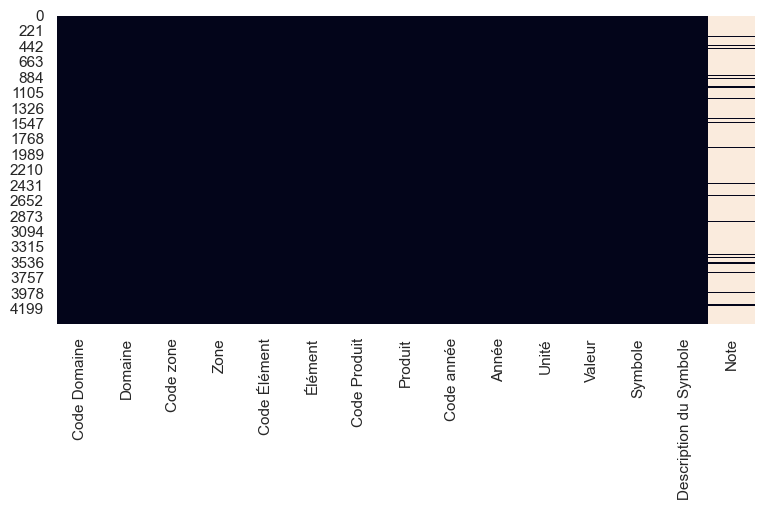

In [29]:
# Vérification du df

verif(pop)

# heatmap

isna(pop)

pop

<h3> Variable croissance démographique

In [30]:
# On garde que les variables pertinente pour la suite de l'étude
# Evolution sur 3 ans ( on gardera les valeurs concernant 2017 pour la cohérence avec les données alimentaire dispo sur 2017)

population = pop[['Zone', 'Année', 'Valeur']]
population = population.loc[(population['Année'] == 2015) | (population['Année'] == 2017)]
population['% Croissance demographique'] = round(population.groupby('Zone')['Valeur'].pct_change()*100,2)
population = population.dropna()
population = population.rename(columns={"Valeur" : "Population", "Zone" : "Pays"})
population

Pays  Année  Population  \
17                               Afghanistan   2017   36296.113   
36                            Afrique du Sud   2017   57009.756   
55                                   Albanie   2017    2884.169   
74                                   Algérie   2017   41389.189   
93                                 Allemagne   2017   82658.409   
...                                      ...    ...         ...   
4333  Venezuela (République bolivarienne du)   2017   29402.484   
4352                                Viet Nam   2017   94600.648   
4371                                   Yémen   2017   27834.819   
4390                                  Zambie   2017   16853.599   
4409                                Zimbabwe   2017   14236.595   

      % Croissance demographique  
17                          5.47  
36                          2.93  
55                         -0.22  
74                          4.18  
93                          1.06  
...                          ...  
4333                       -2.26  
4352                        2.08  
4371                        5.05  
4390                        6.14  
4409                        3.05  

[236 rows x 4 columns]

<h2> Jointure entre les df disponibilité alimentaire et population

In [31]:
#Jointure interne du dataframe principal "df" et "population_pays"

df = pd.merge(df, population[['Pays','% Croissance demographique']], on='Pays')
df = df.rename(columns={"Zone" : "Pays"})
df

Pays  % Taux importation (volailles)  \
0              Afghanistan                           50.88   
1           Afrique du Sud                           24.27   
2                  Albanie                           80.85   
3                  Algérie                            0.72   
4                Allemagne                           48.42   
..                     ...                             ...   
167    Émirats arabes unis                          105.10   
168               Équateur                            0.00   
169  États-Unis d'Amérique                            0.67   
170               Éthiopie                            7.14   
171           Îles Salomon                          200.00   

     % Taux suffisance (volailles)   Total calories (Kcal/pers/jour)  \
0                            49.12                            1997.0   
1                            78.71                            2987.0   
2                            27.66                            3400.0   
3                            99.28                            3345.0   
4                            87.06                            3559.0   
..                             ...                               ...   
167                          11.65                            3370.0   
168                          99.71                            2585.0   
169                         119.97                            3762.0   
170                         100.00                            2304.0   
171                           0.00                            2410.0   

     % Prot Volailles/Total  % Croissance demographique  
0                      1.00                        5.47  
1                     16.93                        2.93  
2                      5.24                       -0.22  
3                      2.12                        4.18  
4                      7.65                        1.06  
..                      ...                         ...  
167                   13.80                        2.42  
168                    9.35                        3.54  
169                   17.54                        1.31  
170                    0.06                        5.52  
171                    2.82                        5.46  

[172 rows x 6 columns]

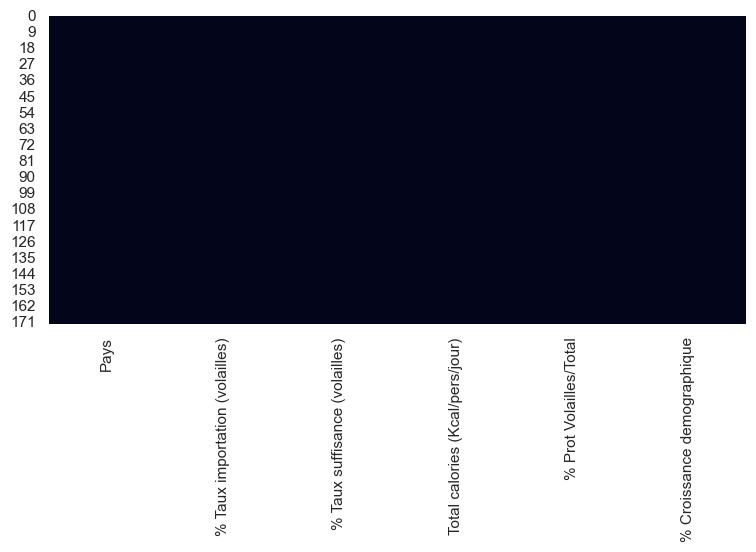

In [32]:
isna(df)

Le dataframe df nous donne une vision par pays des différentes disponibilités, ainsi que les deux ratios attendus sur les protéines et l'évolution démographique entre l'année n et n-3.<br>

On peut aller plus loin dans nos variables, enrichir les caractéristiques des pays, c'est pourquoi le PIB par habitant trouvera tout son sens dans l'analyse du potentiel d'un pays à faire appel (ou non)à nos services alimentaires.

<h2> DF Produit Interieur Brut 

In [33]:
pib = pd.read_csv('pib_fao.csv')

In [34]:
pib

Code Domaine                             Domaine  Code zone  \
0              FS  Données de la sécurité alimentaire          2   
1              FS  Données de la sécurité alimentaire          2   
2              FS  Données de la sécurité alimentaire          2   
3              FS  Données de la sécurité alimentaire          2   
4              FS  Données de la sécurité alimentaire          2   
...           ...                                 ...        ...   
5495           FS  Données de la sécurité alimentaire       9011   
5496           FS  Données de la sécurité alimentaire       9011   
5497           FS  Données de la sécurité alimentaire       9011   
5498           FS  Données de la sécurité alimentaire       9011   
5499           FS  Données de la sécurité alimentaire       9011   

                               Zone  Code Élément Élément  Code Produit  \
0                       Afghanistan          6126  Valeur         22013   
1                       Afghanistan          6126  Valeur         22013   
2                       Afghanistan          6126  Valeur         22013   
3                       Afghanistan          6126  Valeur         22013   
4                       Afghanistan          6126  Valeur         22013   
...                             ...           ...     ...           ...   
5495  Upper-middle-income economies          6126  Valeur         22013   
5496  Upper-middle-income economies          6126  Valeur         22013   
5497  Upper-middle-income economies          6126  Valeur         22013   
5498  Upper-middle-income economies          6126  Valeur         22013   
5499  Upper-middle-income economies          6126  Valeur         22013   

                                                Produit  Code année  Année  \
0     PIB par habitant, ($ PPA internationaux consta...        2000   2000   
1     PIB par habitant, ($ PPA internationaux consta...        2001   2001   
2     PIB par habitant, ($ PPA internationaux consta...        2002   2002   
3     PIB par habitant, ($ PPA internationaux consta...        2003   2003   
4     PIB par habitant, ($ PPA internationaux consta...        2004   2004   
...                                                 ...         ...    ...   
5495  PIB par habitant, ($ PPA internationaux consta...        2017   2017   
5496  PIB par habitant, ($ PPA internationaux consta...        2018   2018   
5497  PIB par habitant, ($ PPA internationaux consta...        2019   2019   
5498  PIB par habitant, ($ PPA internationaux consta...        2020   2020   
5499  PIB par habitant, ($ PPA internationaux consta...        2021   2021   

     Unité   Valeur Symbole         Description du Symbole  Note  
0       I$      NaN       X  Sources internationales sûres   NaN  
1       I$      NaN       X  Sources internationales sûres   NaN  
2       I$      NaN       X  Sources internationales sûres   NaN  
3       I$      NaN       X  Sources internationales sûres   NaN  
4       I$      NaN       X  Sources internationales sûres   NaN  
...    ...      ...     ...                            ...   ...  
5495    I$  18783.9       X  Sources internationales sûres   NaN  
5496    I$  19095.4       X  Sources internationales sûres   NaN  
5497    I$  19224.5       X  Sources internationales sûres   NaN  
5498    I$  18165.8       X  Sources internationales sûres   NaN  
5499    I$  19154.8       X  Sources internationales sûres   NaN  

[5500 rows x 15 columns]

In [35]:
pib = pib.loc[pib['Année'] == 2017]
pib = pib[['Zone','Valeur']]
pib = pib.rename(columns={"Zone" : "Pays", "Valeur": "Pib/habitant(US$)"})
pib.head()

Pays  Pib/habitant(US$)
17      Afghanistan             2058.4
39   Afrique du Sud            13860.3
61          Albanie            12771.0
83          Algérie            11737.4
105       Allemagne            53071.5

<h2> Jointure df final

In [36]:
df_l = pd.merge(df, pib, on='Pays', how='left')
df_l.head(15)

Pays  % Taux importation (volailles)  \
0          Afghanistan                           50.88   
1       Afrique du Sud                           24.27   
2              Albanie                           80.85   
3              Algérie                            0.72   
4            Allemagne                           48.42   
5               Angola                           86.83   
6   Antigua-et-Barbuda                          100.00   
7      Arabie saoudite                           50.31   
8            Argentine                            0.41   
9              Arménie                           74.47   
10           Australie                            1.37   
11            Autriche                           63.58   
12         Azerbaïdjan                           20.93   
13             Bahamas                           92.31   
14          Bangladesh                            0.00   

    % Taux suffisance (volailles)   Total calories (Kcal/pers/jour)  \
0                           49.12                            1997.0   
1                           78.71                            2987.0   
2                           27.66                            3400.0   
3                           99.28                            3345.0   
4                           87.06                            3559.0   
5                           13.17                            2266.0   
6                            0.00                            2429.0   
7                           42.93                            3194.0   
8                          110.14                            3239.0   
9                           23.40                            3072.0   
10                         108.37                            3307.0   
11                          85.55                            3694.0   
12                          80.62                            3102.0   
13                          23.08                            2043.0   
14                          99.60                            2596.0   

    % Prot Volailles/Total  % Croissance demographique  Pib/habitant(US$)  
0                     1.00                        5.47             2058.4  
1                    16.93                        2.93            13860.3  
2                     5.24                       -0.22            12771.0  
3                     2.12                        4.18            11737.4  
4                     7.65                        1.06            53071.5  
5                     6.66                        6.93             7310.9  
6                    21.90                        1.99            19840.3  
7                    17.79                        4.36            47306.2  
8                    13.18                        2.00            23597.1  
9                     5.59                        0.66            12115.1  
10                   15.37                        2.72            48398.5  
11                    6.93                        1.63            54173.0  
12                    4.82                        2.31            14121.4  
13                   23.81                        2.02            35911.7  
14                    0.78                        2.19             4894.6

In [37]:
df_l = df.reindex(columns=['Pays',' Total calories (Kcal/pers/jour)', '% Prot Volailles/Total',
                           '% Taux importation (volailles)','% Taux suffisance (volailles)', '% Croissance demographique','Pib/habitant(US$)'])

In [38]:
substring = 'eg'
mask = df_l.applymap(lambda x: substring in x.lower() if isinstance(x,str) else False).to_numpy()
df_l.loc[mask]

Empty DataFrame
Columns: [Pays,  Total calories (Kcal/pers/jour), % Prot Volailles/Total, % Taux importation (volailles), % Taux suffisance (volailles), % Croissance demographique, Pib/habitant(US$)]
Index: []

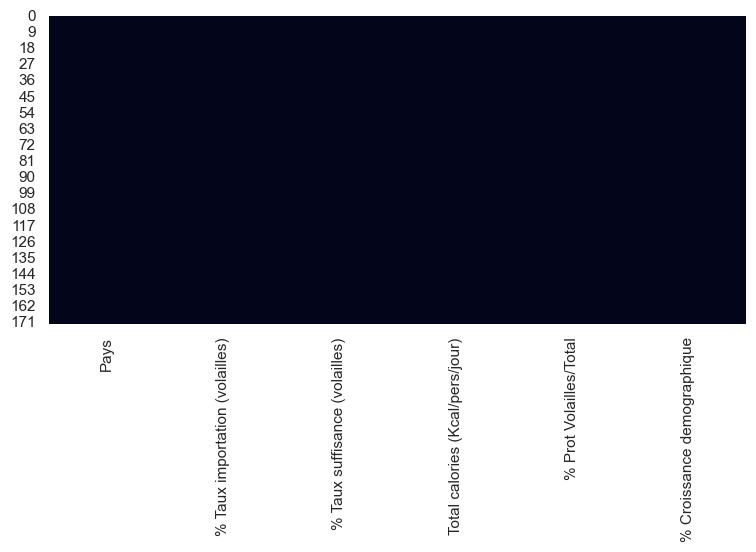

In [39]:
isna(df)

In [40]:
df.fillna(0, inplace= True)

In [41]:
# vérification du df final

df.describe().T

count         mean         std      min  \
% Taux importation (volailles)    172.0    45.271163   51.780882     0.00   
% Taux suffisance (volailles)     172.0    76.207093   49.869935     0.00   
 Total calories (Kcal/pers/jour)  172.0  2858.395349  454.544301  1754.00   
% Prot Volailles/Total            172.0     8.314651    6.047855     0.06   
% Croissance demographique        172.0     2.602500    2.323260    -2.95   

                                        25%       50%        75%      max  
% Taux importation (volailles)       4.0575    24.255    80.2125   323.93  
% Taux suffisance (volailles)       32.4975    86.500   100.0000   304.61  
 Total calories (Kcal/pers/jour)  2514.2500  2871.500  3250.2500  3770.00  
% Prot Volailles/Total               3.4175     7.420    11.8825    28.15  
% Croissance demographique           0.9950     2.300     4.3375     9.34

In [42]:
df

Pays  % Taux importation (volailles)  \
0              Afghanistan                           50.88   
1           Afrique du Sud                           24.27   
2                  Albanie                           80.85   
3                  Algérie                            0.72   
4                Allemagne                           48.42   
..                     ...                             ...   
167    Émirats arabes unis                          105.10   
168               Équateur                            0.00   
169  États-Unis d'Amérique                            0.67   
170               Éthiopie                            7.14   
171           Îles Salomon                          200.00   

     % Taux suffisance (volailles)   Total calories (Kcal/pers/jour)  \
0                            49.12                            1997.0   
1                            78.71                            2987.0   
2                            27.66                            3400.0   
3                            99.28                            3345.0   
4                            87.06                            3559.0   
..                             ...                               ...   
167                          11.65                            3370.0   
168                          99.71                            2585.0   
169                         119.97                            3762.0   
170                         100.00                            2304.0   
171                           0.00                            2410.0   

     % Prot Volailles/Total  % Croissance demographique  
0                      1.00                        5.47  
1                     16.93                        2.93  
2                      5.24                       -0.22  
3                      2.12                        4.18  
4                      7.65                        1.06  
..                      ...                         ...  
167                   13.80                        2.42  
168                    9.35                        3.54  
169                   17.54                        1.31  
170                    0.06                        5.52  
171                    2.82                        5.46  

[172 rows x 6 columns]

In [139]:
# Chargement du fichier csv avec les noms de pays en anglais

df = pd.read_csv('df_f_.csv', sep = ';')
df.drop(['Unnamed: 0','Pays','Pays_en','Cluster'], axis = 1, inplace = True)
df.rename(columns ={"name_en": "Pays" }, inplace= True)

In [44]:
#df.drop(['Unnamed: 0','Pays','Pays_en'], axis = 1, inplace = True)

In [45]:
#df.rename(columns ={"name_en": "Pays" }, inplace= True)

In [46]:
df.loc[df['% Taux importation (volailles)'] > 100.00]

Pays   Total calories (Kcal/pers/jour)  \
16                            Belgium                            3770.0   
26                         Cabo Verde                            2512.0   
31                                NaN                            3353.0   
32                                NaN                            2999.0   
53                              Gabon                            2542.0   
82                             Latvia                            3170.0   
96                         Mauritania                            2842.0   
98                           Mongolia                            2369.0   
102                           Namibia                            2429.0   
110                              Oman                            2924.0   
116                       Netherlands                            3251.0   
133  Saint Vincent and the Grenadines                            2962.0   
135                             Samoa                            2971.0   
151                       Timor-Leste                            2142.0   
159                           Vanuatu                            2623.0   
166              United Arab Emirates                            3370.0   
170                   Solomon Islands                            2410.0   

     % Prot Volailles/Total  % Taux importation (volailles)  \
16                     4.51                          222.37   
26                     9.40                          120.00   
31                    16.14                          323.93   
32                    11.86                          121.05   
53                     1.95                          200.00   
82                     7.42                          104.88   
96                     1.99                          109.09   
98                     1.15                          111.11   
102                    6.85                          103.57   
110                    8.68                          110.53   
116                    8.12                          163.44   
133                   28.15                          112.50   
135                   25.53                          113.33   
151                    2.53                          220.00   
159                    6.36                          133.33   
166                   13.80                          105.10   
170                    2.82                          200.00   

     % Taux suffisance (volailles)  % Croissance demographique  \
16                          304.61                        1.17   
26                           10.00                        2.43   
31                            8.57                        1.67   
32                           15.79                        3.40   
53                           25.00                        6.14   
82                           80.49                       -2.33   
96                           22.73                        5.84   
98                            0.00                        3.85   
102                          39.29                        3.79   
110                           6.14                        9.34   
116                         295.70                        0.49   
133                           0.00                        0.62   
135                           0.00                        0.95   
151                          20.00                        3.93   
159                          33.33                        5.30   
166                          11.65                        2.42   
170                           0.00                        5.46   

     Pib/habitant(US$)  
16             50442.3  
26              6643.2  
31             59842.2  
32            126144.0  
53              2072.6  
82             28673.6  
96              5108.5  
98             11366.3  
102            10171.4  
110            33308.5  
116            55088.6  
133            13102.1  
135             6486.1  
151     

Commentaire explicatif sur la valeur importante du taux d'importation superieur à 100%

In [47]:
df.loc[df['% Taux suffisance (volailles)'] > 100.00]

Pays   Total calories (Kcal/pers/jour)  \
8                           Argentina                            3239.0   
10                          Australia                            3307.0   
16                            Belgium                            3770.0   
17                             Belize                            2694.0   
18   Bolivia (Plurinational State of)                            2354.0   
19                           Botswana                            3266.0   
21                             Brazil                            3250.0   
24                            Belarus                            3289.0   
30                              Chile                            3007.0   
34                              China                            3197.0   
39                            Comoros                            3079.0   
42                            Denmark                            3383.0   
45                        El Salvador                            2660.0   
46                              Spain                            3270.0   
50                            Finland                            3337.0   
56                             Greece                            3353.0   
64                            Hungary                            3289.0   
72                              Italy                            3522.0   
85                          Lithuania                            3419.0   
89                           Malaysia                            2902.0   
90                             Malawi                            2646.0   
94                            Morocco                            3378.0   
103                         Nicaragua                            2627.0   
108                       New Zealand                            3153.0   
114                            Panama                            2839.0   
115                          Paraguay                            2741.0   
116                       Netherlands                            3251.0   
118                            Poland                            3526.0   
120                          Portugal                            3494.0   
122                           Romania                            3525.0   
140                          Slovenia                            3200.0   
150                          Thailand                            2826.0   
154                           Tunisia                            3469.0   
156                            Turkey                            3538.0   
157                           Ukraine                            3033.0   
168          United States of America                            3762.0   

     % Prot Volailles/Total  % Taux importation (volailles)  \
8                     13.18                            0.41   
10                    15.37                            1.37   
16                     4.51                          222.37   
17                    12.31                            0.00   
18                    16.71                            0.23   
19                     5.98                           18.18   
21                    17.26                            0.03   
24                    10.00                            7.92   
30                    13.79                           23.07   
34                     3.90                            2.49   
39                     4.50                           53.33   
42                    11.49                           79.64   
45                     8.37                           12.21   
46                    11.66                           13.69   
50                     6.68                           14.41   
56                     6.01                           44.38   
64                    11.17                           21.80   
72                     7.34                            8.27   
85                     7.79                           53.66 

In [48]:
df.shape

(171, 7)

le projet est celui d'exporter du poulet à l'International, le pays de production (France) ne sera pas utile dans l'analyse, il sera donc exclu.<br>
L'analyse sera donc réalisée sur **171 observations (Pays) par 6 variables quantitatives**.

In [49]:
#Retrait du pays 'France' sur notre échantillon 
df = df[df['Pays'] != 'France']

<h2> Matrice de corrélation

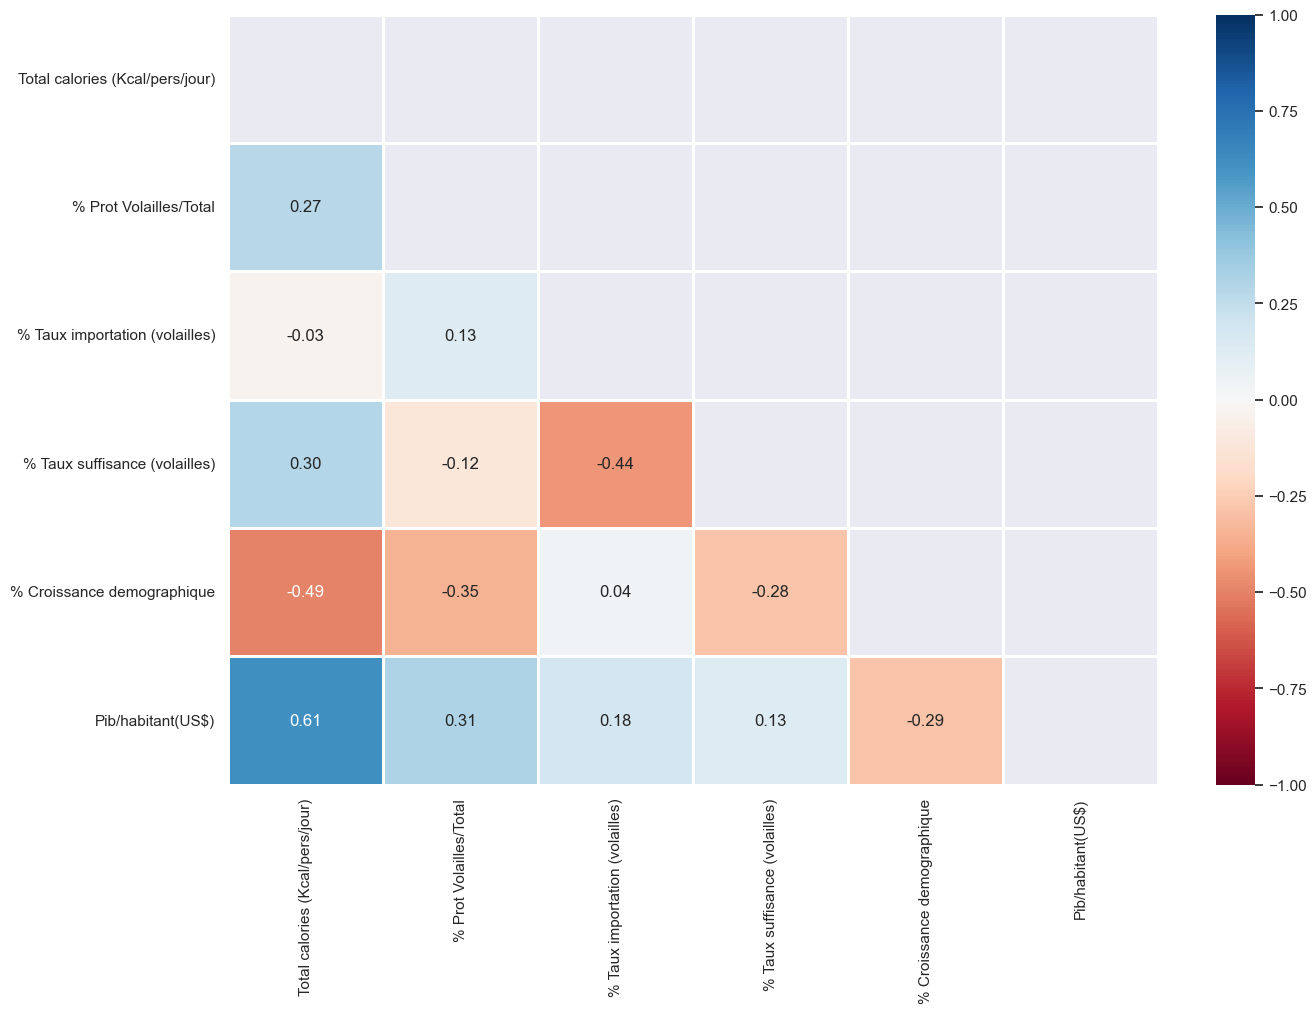

In [50]:
f, ax = plt.subplots(figsize=(15, 10))
    
correlation_matrix(df)
plt.savefig('Matrice corr.jpg')

<h3> Analyse

Fortes corrélations entre :
- le PIB et le Total calories / hab
- la Croissance démographique et le Total calories / hab
- le Taux d'importation (volailles) et le Taux de suffisance (volailles)

Nous sommes intéressés par les pays les plus susceptibles de consommer du poulet,<br>
donc ceux ayant un fort ratio de protéines volailles. Les corrélations montrent que ces pays sont susceptibles d'avoir :<br>
un fort PIB, et une grande disponibilité en calories avec un taux de croissance démographique bas.

<h2> Pairplot

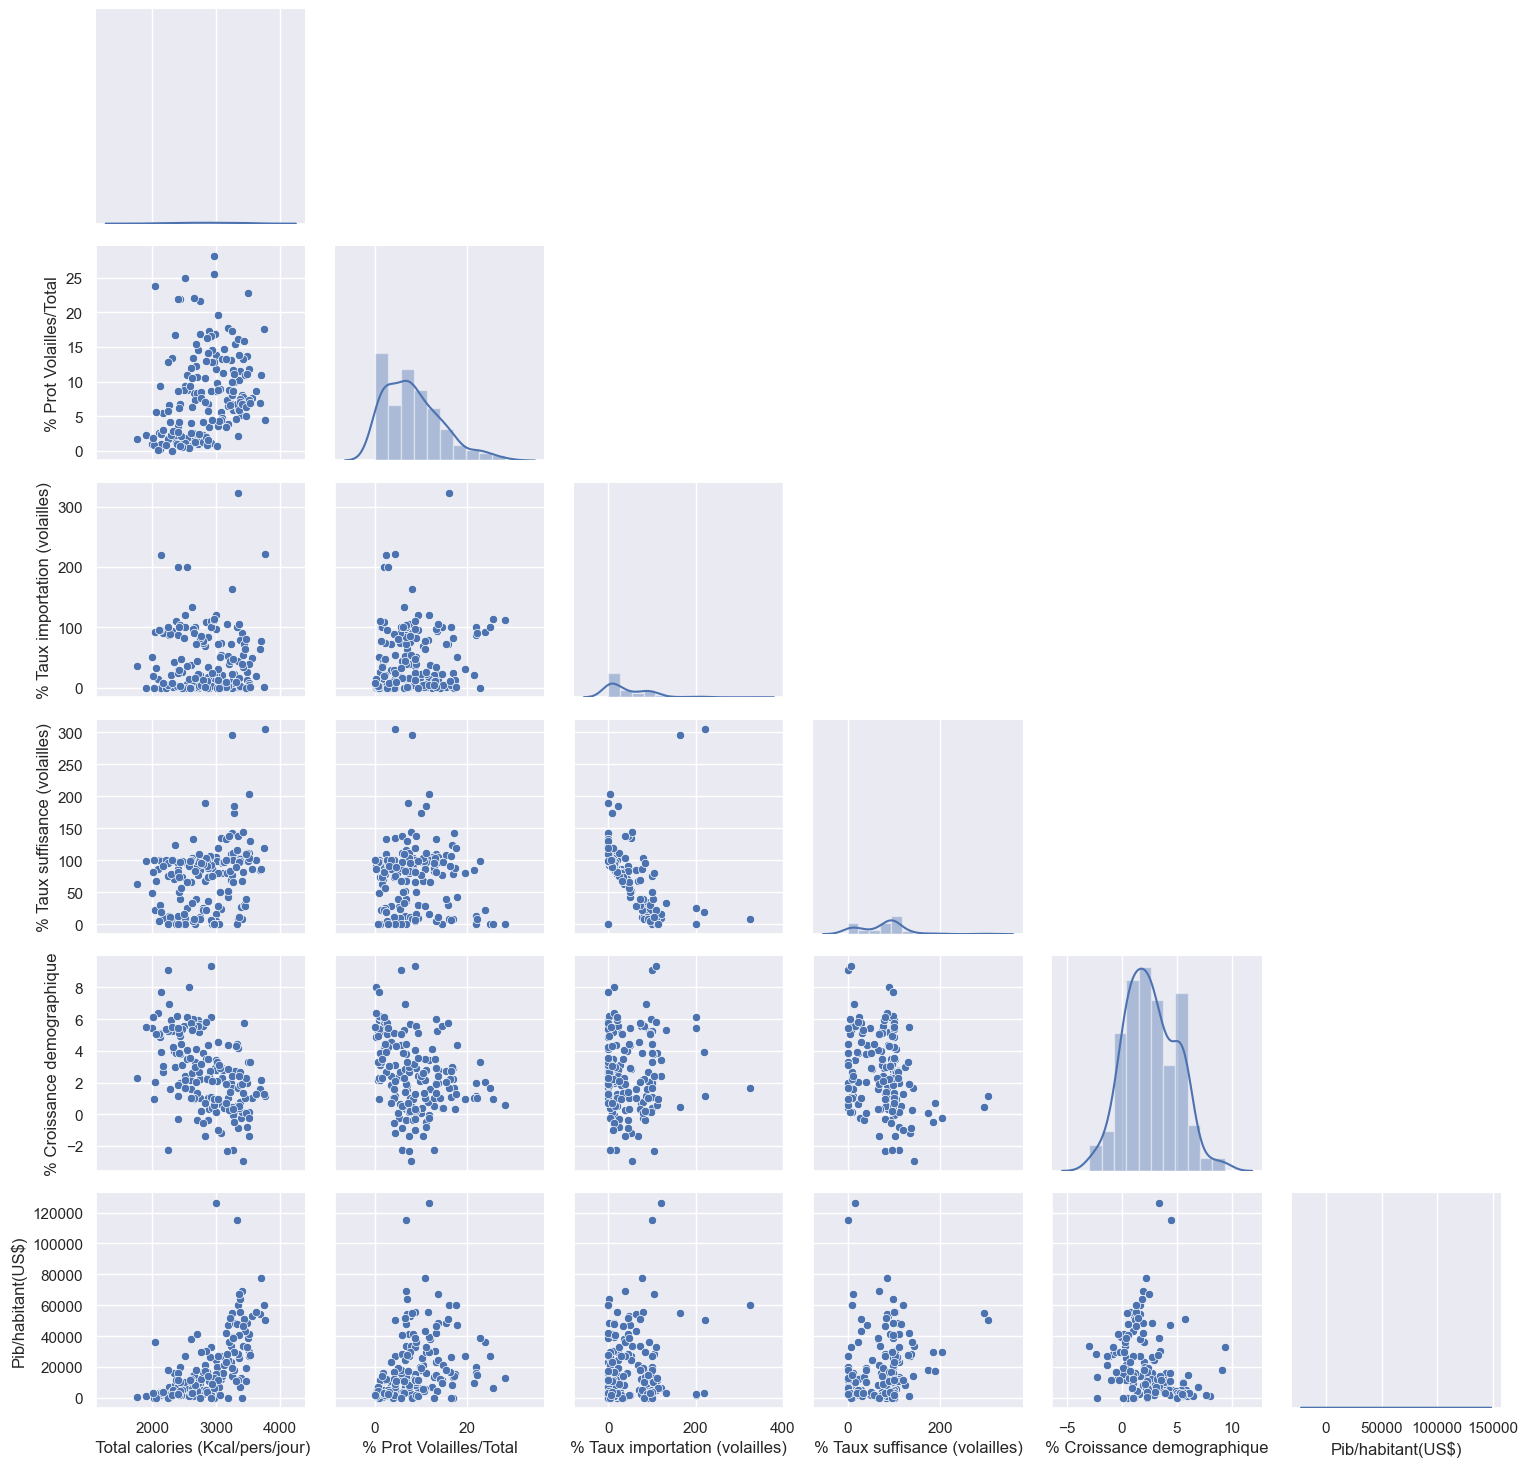

In [51]:
visu = sns.PairGrid(df, corner= True)
visu.map_diag(sns.distplot)
visu.map_offdiag(sns.scatterplot)
visu.add_legend();

On a une idée de la distribution de nos  principales variables.

<h1> Classification ascendante hiérarchique (CAH): le dendrogramme

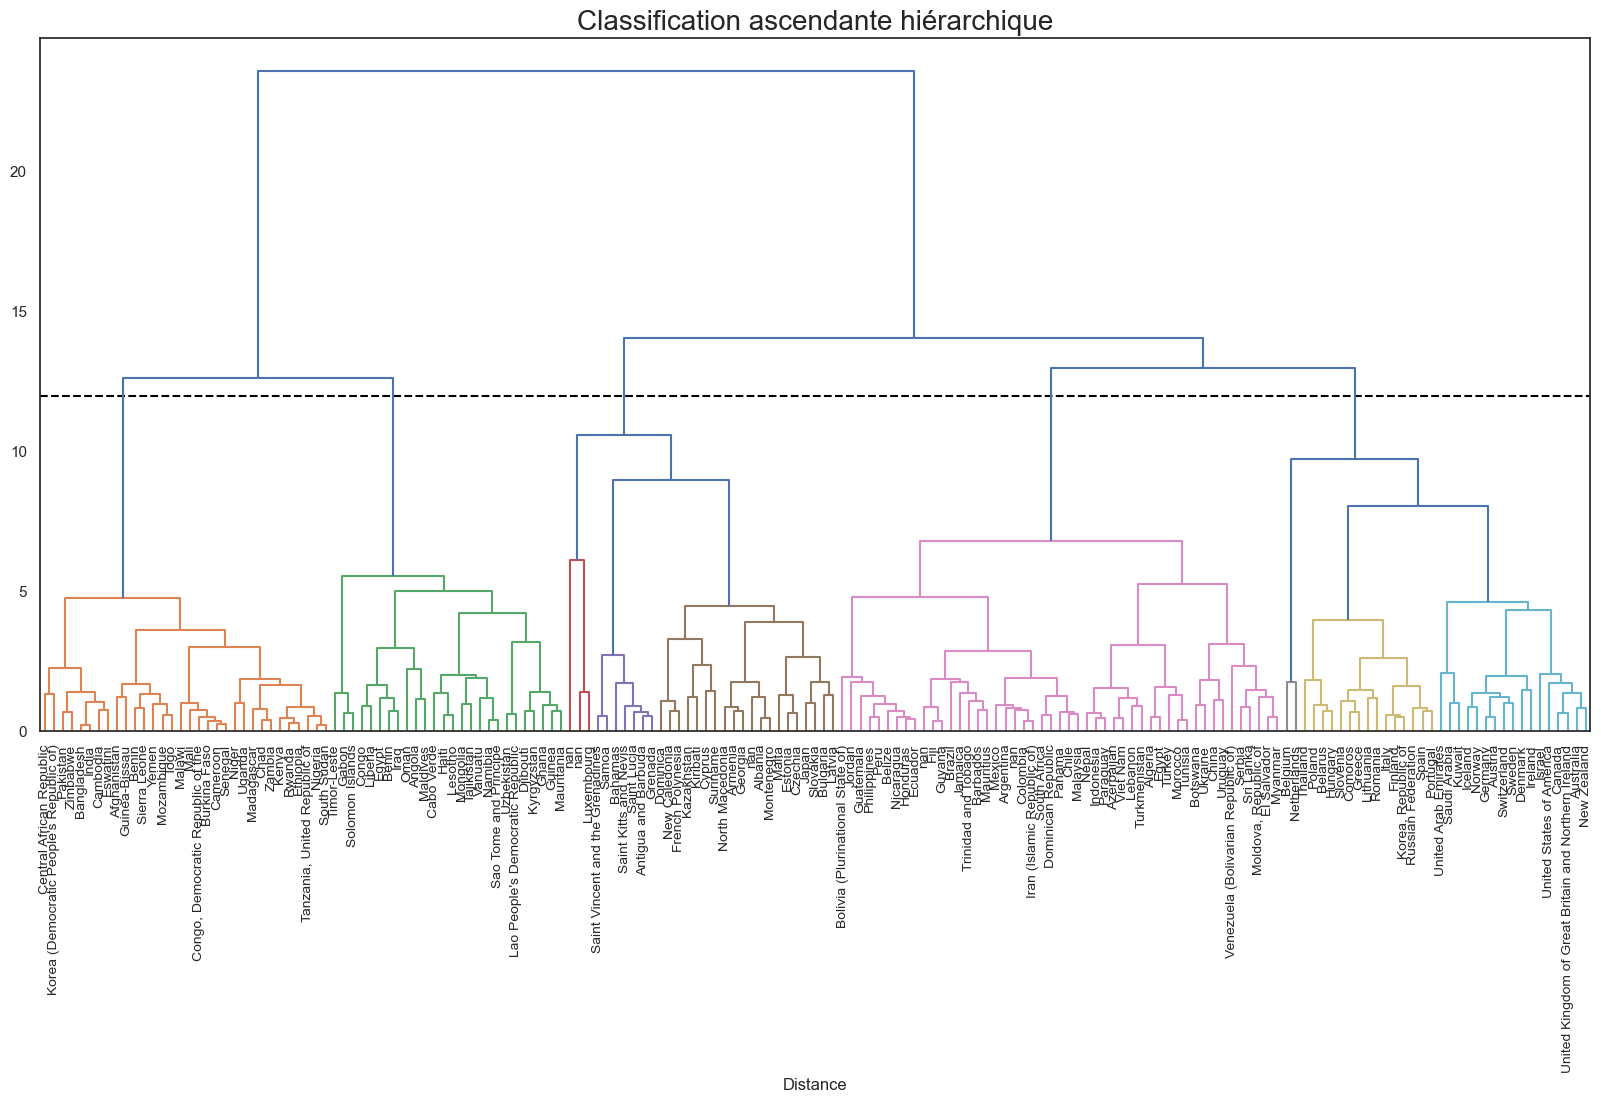

In [52]:
from sklearn import decomposition, preprocessing
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#Transformation en array Numpy
#Indexation selon les pays par la fonction .set_index()
df.set_index('Pays', inplace=True)

# préparation des données pour le clustering
X = df.values
names = df.index

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

#Clustering hiérarchique: création d'une Matrice des liens selon la Méthode de Ward
Z = linkage(X_scaled, method = 'ward', metric='euclidean')

#Affichage d'un premier dendrogramme global
fig =plt.figure(figsize=(20,9))
sns.set_style('white')
plt.axhline(y=12, color='black', linestyle='dashed') # Threshold
plt.title('Classification ascendante hiérarchique', fontsize=20)
plt.xlabel('Distance')

dendrogram(Z, labels = df.index, leaf_font_size=10, color_threshold=7, orientation='top')
plt.show()

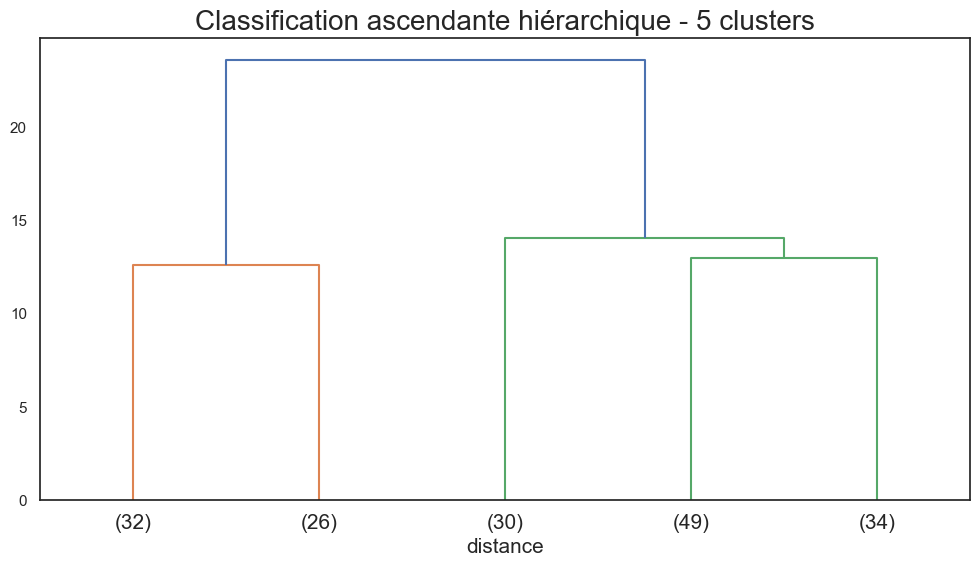

In [53]:
#Coupage du dendrogramme en 5 groupes pour avoir une première idée du partitionnement
fig = plt.figure(figsize=(12,6))
plt.title('Classification ascendante hiérarchique - 5 clusters', fontsize=20)
plt.xlabel('distance', fontsize=15)

dendrogram(Z, labels = df.index, p=5, truncate_mode='lastp', leaf_font_size=15, orientation='top')
plt.show()

In [54]:
# On récupère les données du dendrogramme
# puis on crée un DataFrame avec la liste des pays associée à leur cluster

cluster = fcluster(Z, t=5, criterion='maxclust')
data_cluster = pd.DataFrame({'Pays' : df.index.tolist(),
                             'Cluster' : cluster})
data_cluster

Pays  Cluster
0                 Afghanistan        1
1                South Africa        4
2                     Albania        3
3                     Algeria        4
4                     Germany        5
..                        ...      ...
166      United Arab Emirates        5
167                   Ecuador        4
168  United States of America        5
169                  Ethiopia        1
170           Solomon Islands        2

[171 rows x 2 columns]

In [55]:
# Rajout de la variable "Cluster" au df 

df = pd.merge(df, data_cluster, on='Pays', how= 'left')
df

Pays   Total calories (Kcal/pers/jour)  \
0                 Afghanistan                            1997.0   
1                South Africa                            2987.0   
2                     Albania                            3400.0   
3                     Algeria                            3345.0   
4                     Germany                            3559.0   
..                        ...                               ...   
190      United Arab Emirates                            3370.0   
191                   Ecuador                            2585.0   
192  United States of America                            3762.0   
193                  Ethiopia                            2304.0   
194           Solomon Islands                            2410.0   

     % Prot Volailles/Total  % Taux importation (volailles)  \
0                      1.00                           50.88   
1                     16.93                           24.27   
2                      5.24                           80.85   
3                      2.12                            0.72   
4                      7.65                           48.42   
..                      ...                             ...   
190                   13.80                          105.10   
191                    9.35                            0.00   
192                   17.54                            0.67   
193                    0.06                            7.14   
194                    2.82                          200.00   

     % Taux suffisance (volailles)  % Croissance demographique  \
0                            49.12                        5.47   
1                            78.71                        2.93   
2                            27.66                       -0.22   
3                            99.28                        4.18   
4                            87.06                        1.06   
..                             ...                         ...   
190                          11.65                        2.42   
191                          99.71                        3.54   
192                         119.97                        1.31   
193                         100.00                        5.52   
194                           0.00                        5.46   

     Pib/habitant(US$)  Cluster  
0               2058.4        1  
1              13860.3        4  
2              12771.0        3  
3              11737.4        4  
4              53071.5        5  
..                 ...      ...  
190            67183.6        5  
191            11617.9        4  
192            59914.8        5  
193             2021.6        1  
194             2663.5        2  

[195 rows x 8 columns]

UNIQUE:
Pays                                164
 Total calories (Kcal/pers/jour)    165
% Prot Volailles/Total              161
% Taux importation (volailles)      138
% Taux suffisance (volailles)       145
% Croissance demographique          155
Pib/habitant(US$)                   164
Cluster                               5
dtype: int64

----------------------
COUNT:
Pays                                170
 Total calories (Kcal/pers/jour)    195
% Prot Volailles/Total              195
% Taux importation (volailles)      195
% Taux suffisance (volailles)       195
% Croissance demographique          195
Pib/habitant(US$)                   195
Cluster                             195
dtype: int64

----------------------
NULL:
Pays                                25
 Total calories (Kcal/pers/jour)     0
% Prot Volailles/Total               0
% Taux importation (volailles)       0
% Taux suffisance (volailles)        0
% Croissance demographique           0
Pib/habitant(US$)              

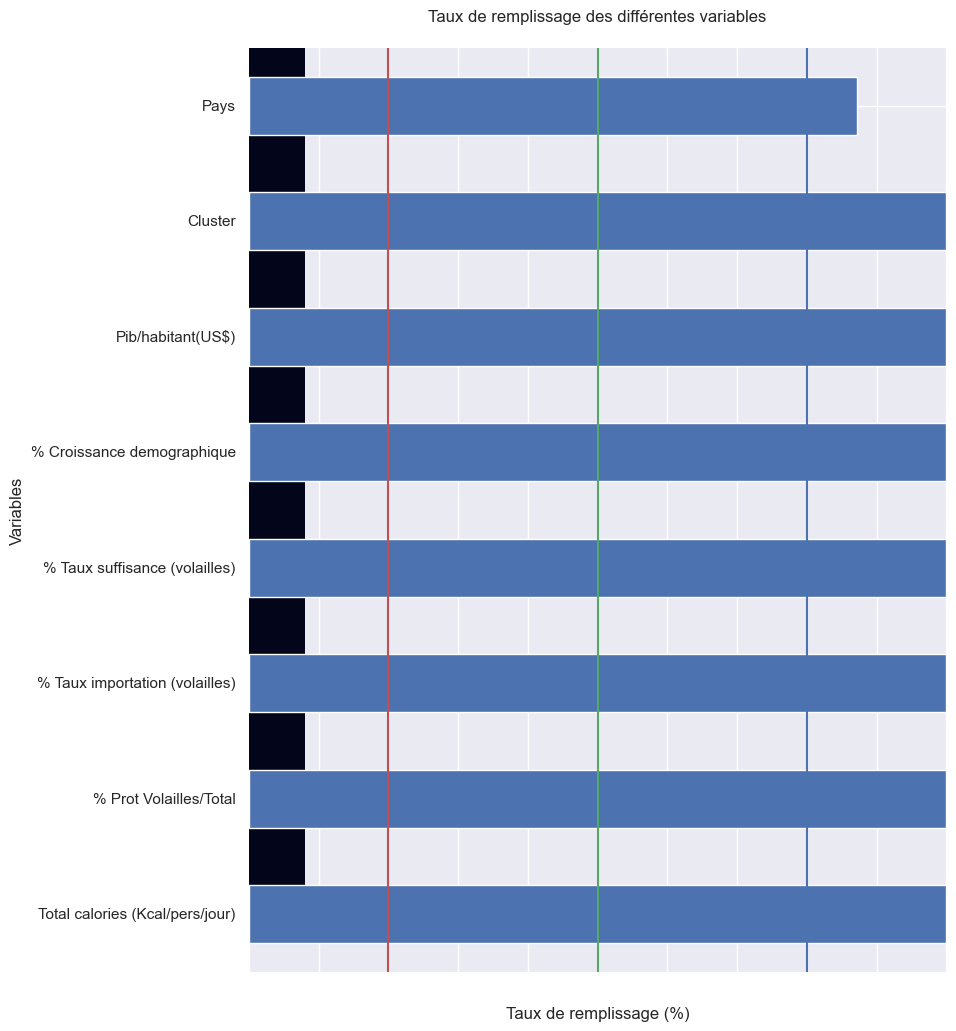

In [56]:
isna(df)
verif(df)

In [57]:
df.dropna(inplace = True)

<h2> Profil moyen des clusters

In [58]:
Cluster = [1,2,3,4,5]


for i in Cluster:
    moy = df.loc[df['Cluster'] ==i].mean()
    print(moy)

 Total calories (Kcal/pers/jour)    2356.454545
% Prot Volailles/Total                 1.875455
% Taux importation (volailles)        17.312121
% Taux suffisance (volailles)         86.580303
% Croissance demographique             4.876970
Pib/habitant(US$)                   3302.933333
Cluster                                1.000000
dtype: float64
 Total calories (Kcal/pers/jour)    2557.714286
% Prot Volailles/Total                 5.194643
% Taux importation (volailles)        96.117500
% Taux suffisance (volailles)         19.729286
% Croissance demographique             4.820357
Pib/habitant(US$)                   7461.150000
Cluster                                2.000000
dtype: float64
 Total calories (Kcal/pers/jour)     2916.555556
% Prot Volailles/Total                 13.252593
% Taux importation (volailles)         81.208889
% Taux suffisance (volailles)          33.303704
% Croissance demographique              0.931481
Pib/habitant(US$)                   24259.903704
Clus

<h2> Distribution des valeurs dans les 5 clusters

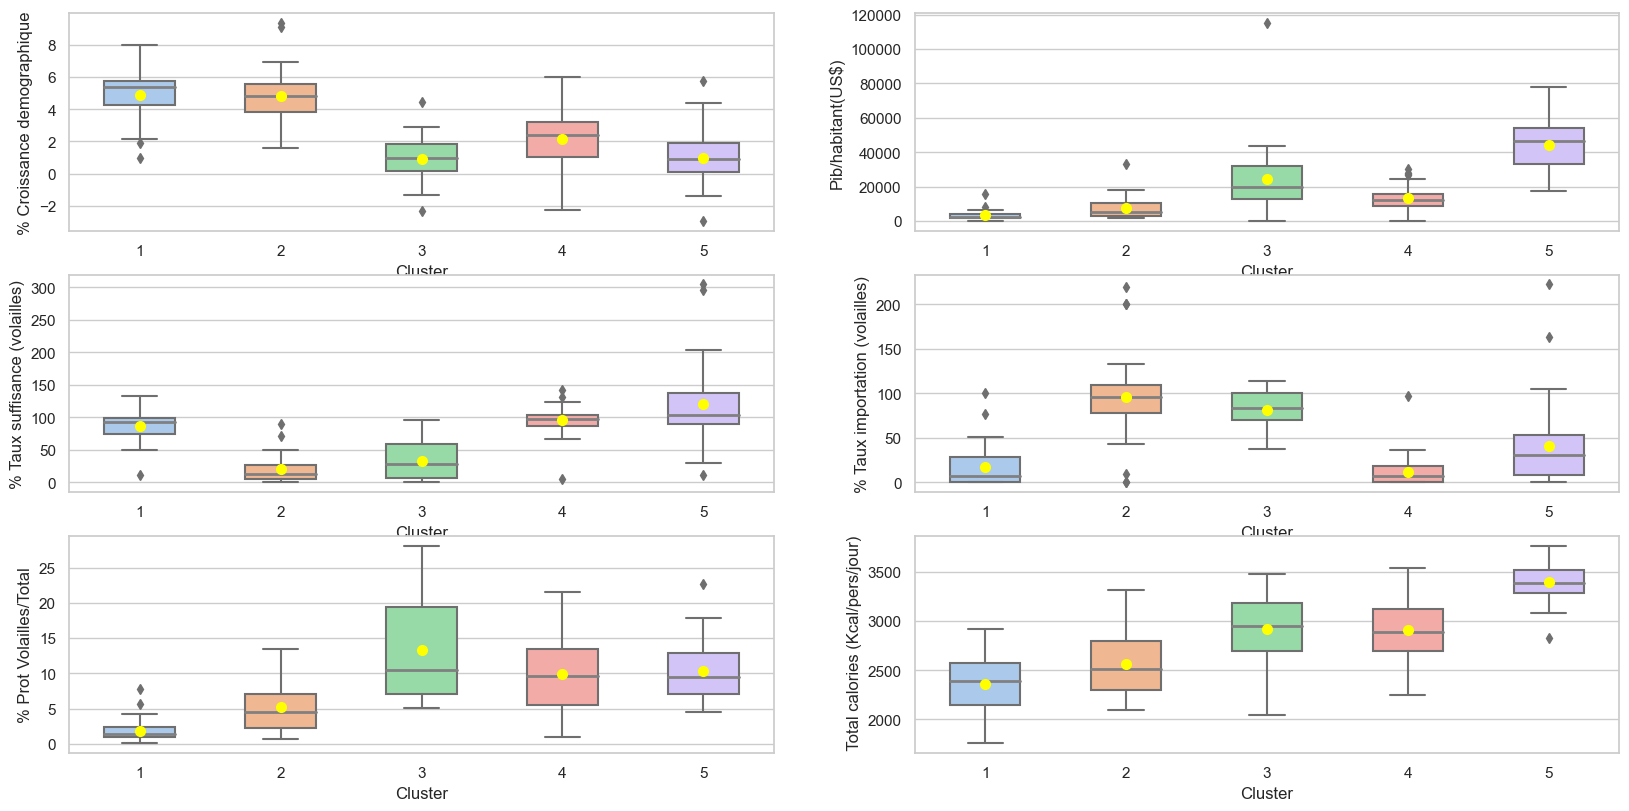

In [59]:
#Comparaison visuelle par Boxplot

medianprops = dict(linewidth=2, color='grey')
meanprops={"marker":"o",
                       "markerfacecolor":"yellow", 
                       "markeredgecolor":"yellow",
                      "markersize":"7"}

plt.figure(figsize=(20, 13))
sns.set(style="whitegrid",palette='pastel')
plt.subplot(421)
sns.boxplot(data=df, x='Cluster', y='% Croissance demographique',medianprops = medianprops, showmeans=True, meanprops=meanprops, width = .5)
plt.subplot(422)
sns.boxplot(data=df, x='Cluster', y='Pib/habitant(US$)',medianprops = medianprops, showmeans=True, meanprops=meanprops, width = .5)
plt.subplot(423)
sns.boxplot(data=df, x='Cluster', y='% Taux suffisance (volailles)',medianprops = medianprops, showmeans=True, meanprops=meanprops, width = .5)
plt.subplot(424)
sns.boxplot(data=df, x='Cluster', y='% Taux importation (volailles)',medianprops = medianprops, showmeans=True, meanprops=meanprops, width = .5)
plt.subplot(425)
sns.boxplot(data=df, x='Cluster', y='% Prot Volailles/Total',medianprops = medianprops, showmeans=True, meanprops=meanprops, width = .5)
plt.subplot(426)
sns.boxplot(data=df, x='Cluster', y=' Total calories (Kcal/pers/jour)',medianprops = medianprops, showmeans=True, meanprops=meanprops, width = .5)
plt.show();

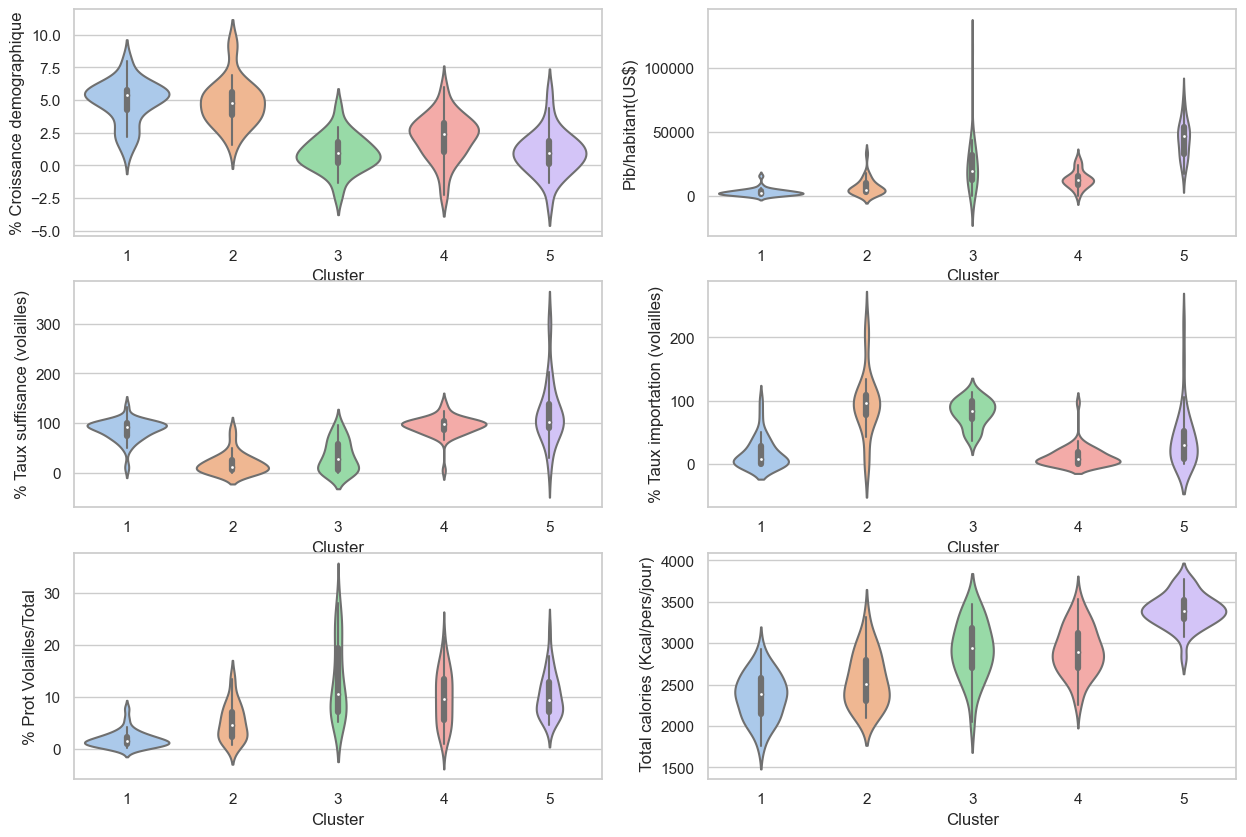

In [60]:
# Comparaison des groupes par violinplot 

plt.figure(figsize=(15, 10))
sns.set(style="whitegrid",palette='pastel')
plt.subplot(321)
sns.violinplot(data=df, x='Cluster', y='% Croissance demographique')
plt.subplot(322)
sns.violinplot(data=df, x='Cluster', y='Pib/habitant(US$)')
plt.subplot(323)
sns.violinplot(data=df, x='Cluster', y='% Taux suffisance (volailles)')
plt.subplot(324)
sns.violinplot(data=df, x='Cluster', y='% Taux importation (volailles)')
plt.subplot(325)
sns.violinplot(data=df, x='Cluster', y='% Prot Volailles/Total')
plt.subplot(326)
sns.violinplot(data=df, x='Cluster', y=' Total calories (Kcal/pers/jour)');
plt.savefig('violinplot.jpg')


- Sur le critère du ratio des protéines volaille / totales ,les pays des groupe 3 , 4 et 5 <br>
- Sur la disponibilité calorique, les pays des groupe 3 , 4 et 5<br>
- Sur le taux d'importation de volailles , les pays des groupe 2 et 3<br>
- Sur le taux de suffisance ( volailles) , les pays des groupes 2 et 3<br><br>
- Les profils moyen calculées ci-dessus ainsi que les réprésentations graphiques permettent d'identifier le groupe 3.

In [61]:
# Nombre et noms de pays dans chaque cluster

for i in df.sort_values('Cluster')['Cluster'].unique():
    print('Cluster', i, ':', len(df[df['Cluster']==i]), 'Pays\n' + 
        ', '.join(df[df['Cluster']==i]['Pays'].values), '\n' + '-- '*3)

Cluster 1 : 33 Pays
Afghanistan, Bangladesh, Benin, Burkina Faso, Benin, Cambodia, Cameroon, Congo, Democratic Republic of the, Eswatini, Guinea-Bissau, India, Kenya, Madagascar, Malawi, Mali, Mozambique, Niger, Nigeria, Uganda, Pakistan, Rwanda, Central African Republic, Korea (Democratic People's Republic of), Tanzania, United Republic of, Sierra Leone, South Sudan, Senegal, Chad, Togo, Yemen, Zambia, Zimbabwe, Ethiopia 
-- -- -- 
Cluster 2 : 28 Pays
Angola, Benin, Benin, Cabo Verde, Congo, Djibouti, Egypt, Gabon, Ghana, Guinea, Haiti, Iraq, Kyrgyzstan, Lesotho, Liberia, Maldives, Mauritania, Mongolia, Namibia, Oman, Uzbekistan, Lao People's Democratic Republic, Sao Tome and Principe, Tajikistan, Timor-Leste, Vanuatu, Egypt, Solomon Islands 
-- -- -- 
Cluster 3 : 27 Pays
Albania, Antigua and Barbuda, Armenia, Bahamas, Bulgaria, Cyprus, Dominica, Estonia, Grenada, Georgia, Japan, Kazakhstan, Kiribati, Latvia, Luxembourg, North Macedonia, Malta, Montenegro, New Caledonia, French Polyne

<h2> Tests

In [62]:
# Test d'adéquation de Kolmogorov-Smirnov 

from scipy.stats import ks_2samp

stat, p = ks_2samp(df[' Total calories (Kcal/pers/jour)'],
          list(np.random.normal(np.mean(df[' Total calories (Kcal/pers/jour)']), 
          np.std(df[' Total calories (Kcal/pers/jour)']), 1000)))
print('Statistics=%.3f, p=%.3f' % (stat, p))

#Interprétation
alpha = 0.05
if p > alpha:
    print('On ne peut pas rejeter H0 pour des niveaux de test de 5%\n',
          'la variable "Total calories (Kcal/pers/jour)" répond positivement à une loi normale' )
else:
    print('H0 est rejetée à un niveau de test de 5%')
    

Statistics=0.063, p=0.590
On ne peut pas rejeter H0 pour des niveaux de test de 5%
 la variable "Total calories (Kcal/pers/jour)" répond positivement à une loi normale


In [63]:
#On teste l’égalité des variances 

cluster_t1 = df[df['Cluster'] == 2][' Total calories (Kcal/pers/jour)']
cluster_t2 = df[df['Cluster'] == 3][' Total calories (Kcal/pers/jour)']

from scipy.stats import bartlett
stat, p = bartlett(cluster_t1, cluster_t2)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#Interprétation
alpha = 0.05
if p > alpha:
    print('On ne rejette donc pas H0, l’égalité des variances de nos 2 clusters au niveau de test 5%')
else:
    print('H0 est rejetée au niveau de test 5%')

Statistics=0.158, p=0.691
On ne rejette donc pas H0, l’égalité des variances de nos 2 clusters au niveau de test 5%


In [64]:
#On teste l’égalité des moyennes 

from scipy.stats import ttest_ind
stat, p = ttest_ind(cluster_t1, cluster_t2, equal_var=True)
print('Statistics=%.3f, p=%.9f' % (stat, p))

#Interprétation
alpha = 0.05
if p > alpha:
    print('On ne rejette donc pas H0, l’égalité des moyennes de nos 2 clusters au niveau de test 5%')
else:
    print('H0 l\'hypothèse d’égalité des moyennes est rejetée au niveau de test 5%')

Statistics=-3.947, p=0.000234686
H0 l'hypothèse d’égalité des moyennes est rejetée au niveau de test 5%


On rejette que nos deux clusters suivent la même distribution, on a rejeté l’hypothèse d’égalité des moyennes.

<h1> Vérification de la normalité de nos variables

**rappel = Les propriétés d'une distribution normale sont :** <br>

    - La fonction de densité de probabilités de la loi normale a la forme d'une courbe en cloche symétrique.
    - la moyenne et la médiane sont égales : la courbe est centrée sur la moyenne.

In [65]:
import scipy as st
from scipy.stats import ks_2samp

def distrib_normalize(i):
        
 # """
 # Fonction qui trace la distribution d'une variable et qui calcule la symétrie (skewness), 
 # le coefficient d'applatissement (kurtosis) et le respect à une loi statistique : ici la loi normale
 #
 # Entrée : 
 # - Colonne d'une variable

 # Sortie : 
 # - Graphique de distribution
 # - Résultat de la symétrie
 # - Résultat du coefficient d'applatissement
 # - Résultat à l'adéquation à la loi normale
 # """
    
            print(i.upper())
        
            _ = plt.figure()
            _ = sns.distplot(df[i])
            _ = sns.displot(df[i])
            _ = plt.axvline(x=df[i].mean(), label='Moyenne', linestyle='-', color='r', linewidth=2)
            _ = plt.axvline(x=df[i].median(), label='Médiane', linestyle='--', color='b', linewidth=2)
            _ = plt.legend();
            _ = plt.show()
            print('Skewness: ', str(st.stats.skew(df[i])))
            print('Kurtosis: ', str(st.stats.kurtosis(df[i])))
            print('Kolmogorov-Smirnov: \n',str(ks_2samp(df[i],list(np.random.normal(np.mean(df[i]),np.std(df[i]), 1000)))))
            print('------------------\n')





 TOTAL CALORIES (KCAL/PERS/JOUR)


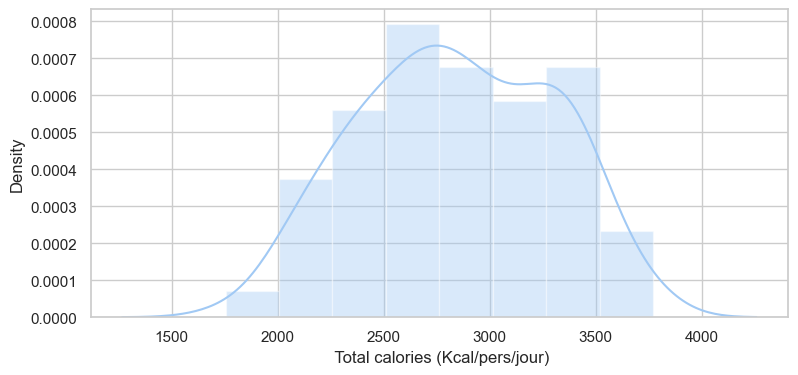

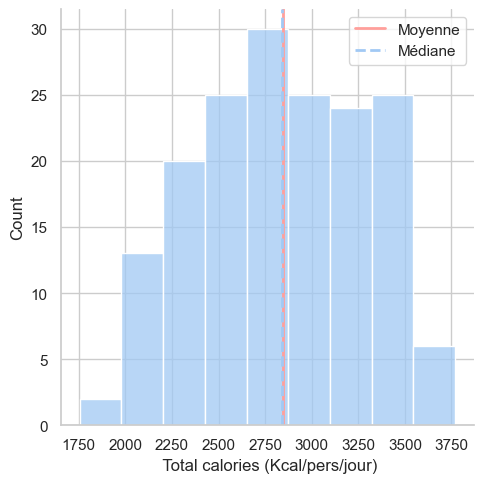

Skewness:  -0.06382001705459958
Kurtosis:  -0.8484441287596094
Kolmogorov-Smirnov: 
 KstestResult(statistic=0.07782352941176471, pvalue=0.3236402296752552)
------------------

% PROT VOLAILLES/TOTAL


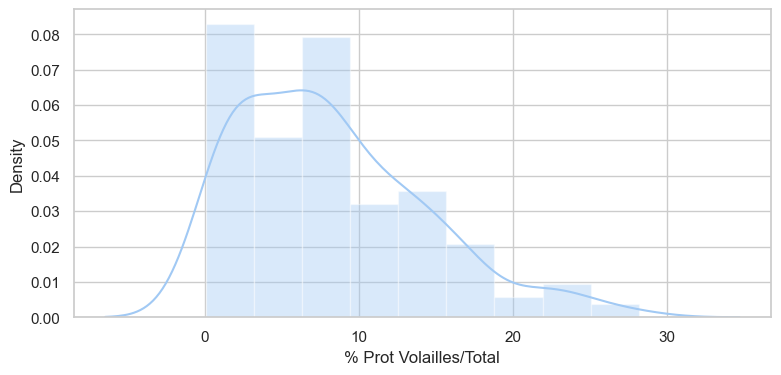

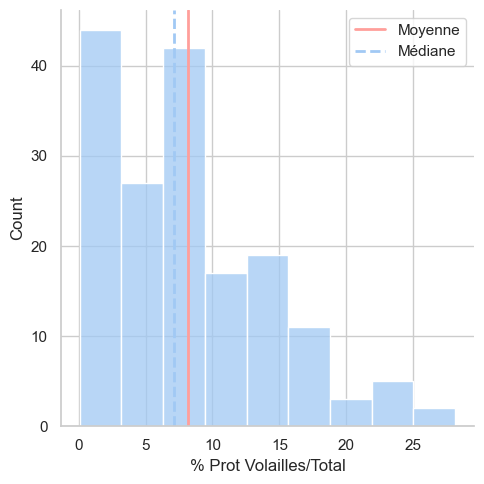

Skewness:  0.8802362489435976
Kurtosis:  0.39026402574483443
Kolmogorov-Smirnov: 
 KstestResult(statistic=0.0918235294117647, pvalue=0.16108081499059482)
------------------

% TAUX IMPORTATION (VOLAILLES)


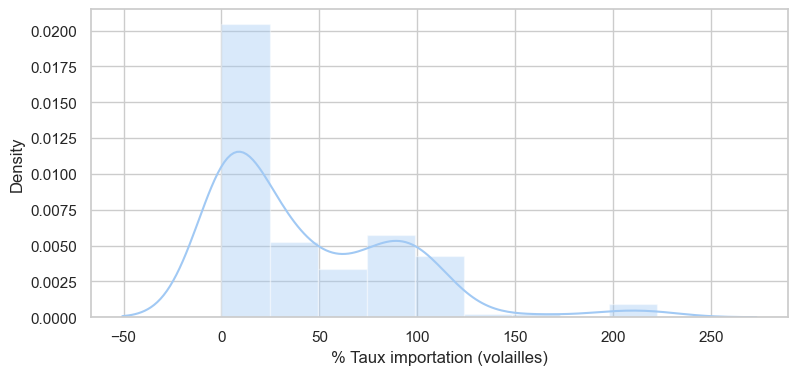

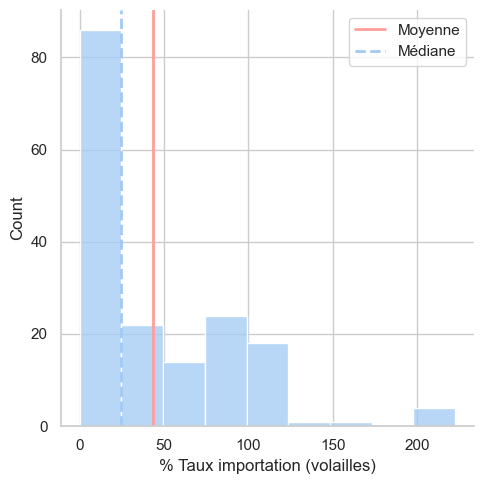

Skewness:  1.304935424280349
Kurtosis:  1.8424381433766452
Kolmogorov-Smirnov: 
 KstestResult(statistic=0.193, pvalue=3.238973063483915e-05)
------------------

% TAUX SUFFISANCE (VOLAILLES)


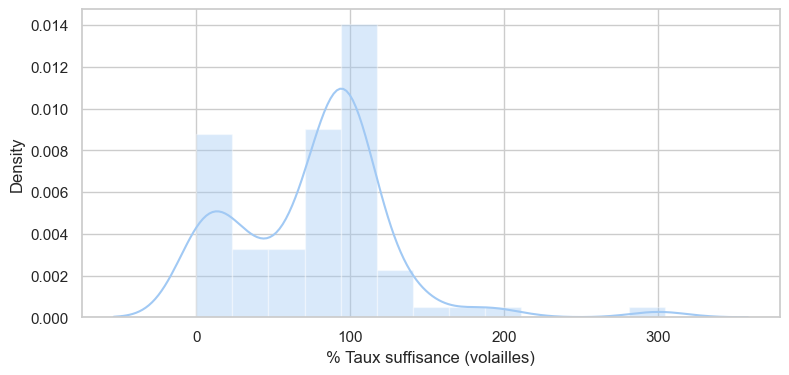

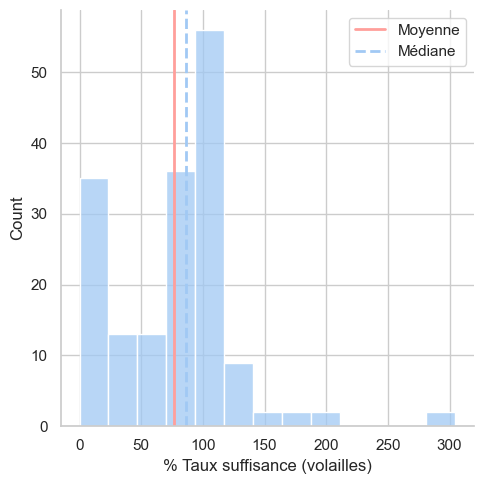

Skewness:  0.8905456907547614
Kurtosis:  3.480729852422545
Kolmogorov-Smirnov: 
 KstestResult(statistic=0.12823529411764706, pvalue=0.01516812303319315)
------------------

% CROISSANCE DEMOGRAPHIQUE


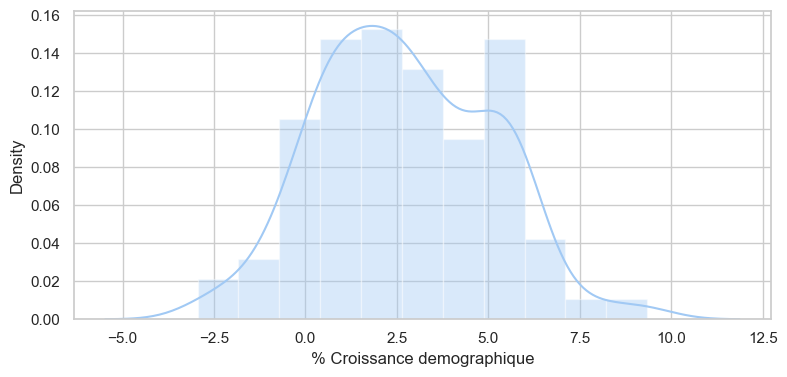

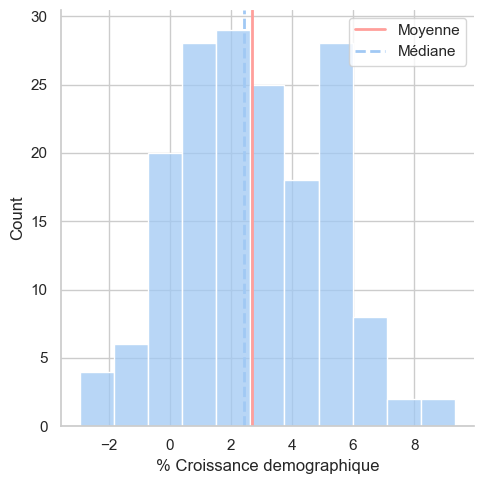

Skewness:  0.18600836388325465
Kurtosis:  -0.32155212531531463
Kolmogorov-Smirnov: 
 KstestResult(statistic=0.06276470588235294, pvalue=0.591263758587419)
------------------

PIB/HABITANT(US$)


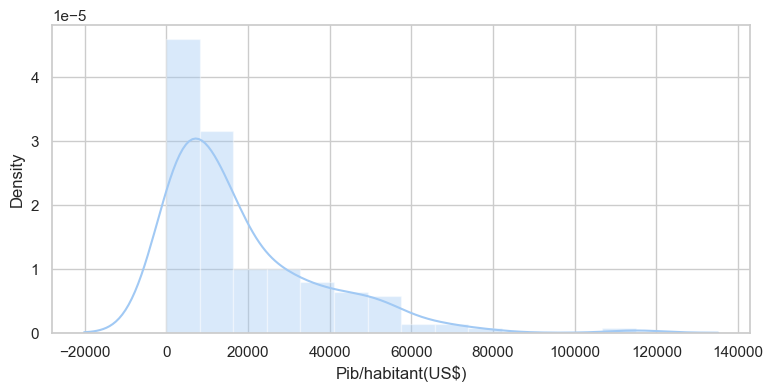

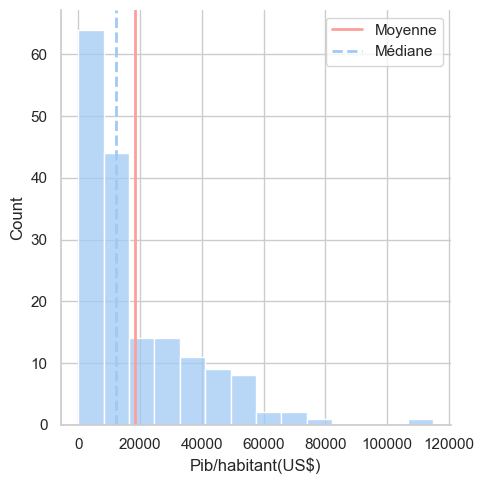

Skewness:  1.6961558959906773
Kurtosis:  3.782497313559304
Kolmogorov-Smirnov: 
 KstestResult(statistic=0.17741176470588235, pvalue=0.00017907641191284676)
------------------



In [66]:
cols = df[[' Total calories (Kcal/pers/jour)', '% Prot Volailles/Total',
       '% Taux importation (volailles)', '% Taux suffisance (volailles)',
       '% Croissance demographique', 'Pib/habitant(US$)']]


for i in cols:
    distrib_normalize(i)

In [67]:
# eta-squared : effet de la taille dans le cadre d'une ANOVA à un facteur
# https://www.statology.org/eta-squared/

# (A p-value can only tell us whether or not there is some significant association between two variables, 
# but a measure of effect size like Eta squared can tell us the strength of association between the variables.)

# Estimateur biaisé de la variance expliquée par le modèle dans la population (il estime l'effet de la taille dans l'échantillon)
# La valeur de Eta-squared varie de 0 à 1, où les valeurs plus proches de 1 indiquent une proportion plus élevée de variance 
# qui peut être expliquée par une variable donnée dans le modèle.

for i in cols:
    print(i.capitalize())
    X = df['Cluster'] # qualitative
    Y = df[i] # quantitative
    print('eta-squared :', eta_squared(X,Y))

 total calories (kcal/pers/jour)
eta-squared : 0.22528858244488995
% prot volailles/total
eta-squared : 0.21051629822861023
% taux importation (volailles)
eta-squared : 0.06066171340022985
% taux suffisance (volailles)
eta-squared : 0.008421167805388579
% croissance demographique
eta-squared : 0.16780601847881832
Pib/habitant(us$)
eta-squared : 0.12666491048100742


<h1> Clustering k-means

In [68]:
from sklearn.cluster import KMeans

In [69]:
df_clust_kmean = df.copy()
df_clust_kmean.drop(['Cluster',"Pays"], axis=1, inplace = True)
#df_clust_kmean.set_index('Pays')

In [70]:
#import mglearn 
from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import MinMaxScaler

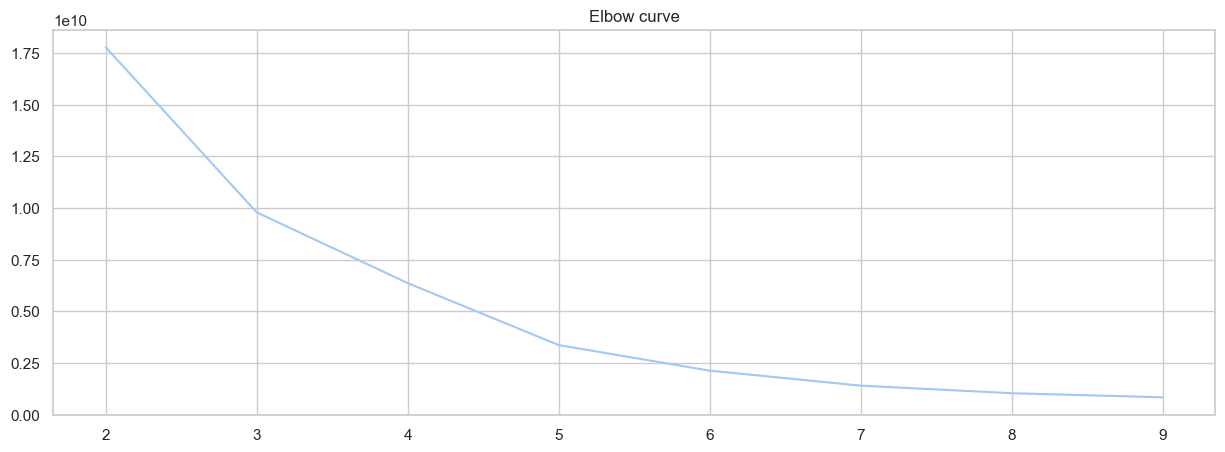

In [71]:
X = df_clust_kmean
distorsions = []
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 10), distorsions)
plt.grid(True)
plt.title('Elbow curve');

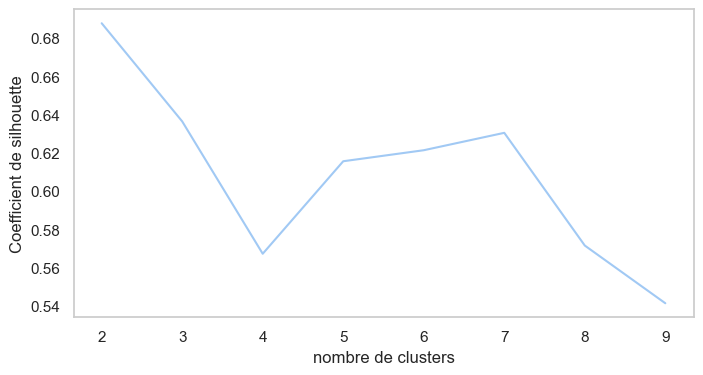

[0.6878357641958882,
 0.6364878867324189,
 0.5672665172048347,
 0.61564973916232,
 0.6214148362229985,
 0.630514636869703,
 0.5715534339251989,
 0.5413692549530387]

In [72]:
from sklearn.metrics import silhouette_score

tab_silhouette =[]
k_range=range(2,10)
for k in k_range:
    model=KMeans(n_clusters=k)
    cluster_labels=model.fit_predict(X)
    tab_silhouette.append(silhouette_score(X,cluster_labels))

fig = plt.figure(figsize=(8,4))
plt.plot(k_range,tab_silhouette)
plt.xlabel('nombre de clusters')
plt.ylabel('Coefficient de silhouette')
plt.grid()
plt.show()
tab_silhouette

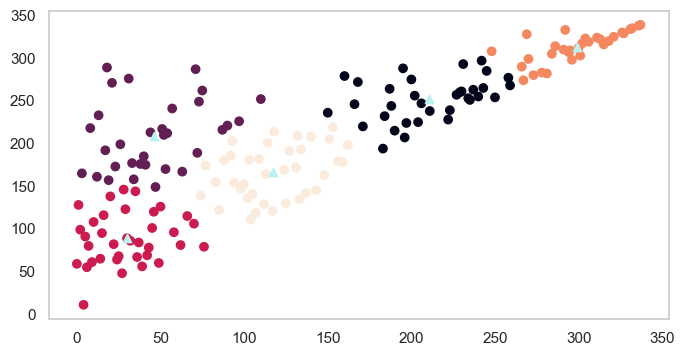

In [73]:
# Affichage du nuage de points (individus) en cluster avec les centoîdes
fig = plt.figure(figsize=(8,4))
model = KMeans(n_clusters=5)
model.fit(Z)
model.predict(Z)
plt.scatter(Z[:,0], Z[:,1],c=model.predict(Z))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], marker='^',c='c')
plt.grid()
plt.show();

En vu d'un partitionnement optimal nous avons couplé 2 méthodes :
 
   - Méthode du coude
   - Coefficient de silhouette

- Avec la méthode du coude, on remarque que l’inertie stagne à partir de 5 clusters.
- Comme pour la méthode du coude nous affichons l'évolution du coefficient de silhouette en fonction du nombre de clusters :

   - Le nombre de 5 clusters donne un coefficient de silhouette de 0.61<br><br>
    rappel : Le coefficient de silhouette varie entre -1 (pire classification) et 1 (meilleure classification).<br><br>
  
L'affichage du nuage de points avec les 5 clusters et leur centroîdes grâce à l'algorithme Kmeans :

   - Le nuage de points est étalé 
   - Le nombre de clusters est optimal, et centroîdes bien distants

l'analyse sera plus fine en 5 clusters<br>
Il est pertinent de comparer les deux méthodes ( k-means et cah dans notre cas) sur le même nombre de clusters.

In [74]:
df

Pays   Total calories (Kcal/pers/jour)  \
0                 Afghanistan                            1997.0   
1                South Africa                            2987.0   
2                     Albania                            3400.0   
3                     Algeria                            3345.0   
4                     Germany                            3559.0   
..                        ...                               ...   
190      United Arab Emirates                            3370.0   
191                   Ecuador                            2585.0   
192  United States of America                            3762.0   
193                  Ethiopia                            2304.0   
194           Solomon Islands                            2410.0   

     % Prot Volailles/Total  % Taux importation (volailles)  \
0                      1.00                           50.88   
1                     16.93                           24.27   
2                      5.24                           80.85   
3                      2.12                            0.72   
4                      7.65                           48.42   
..                      ...                             ...   
190                   13.80                          105.10   
191                    9.35                            0.00   
192                   17.54                            0.67   
193                    0.06                            7.14   
194                    2.82                          200.00   

     % Taux suffisance (volailles)  % Croissance demographique  \
0                            49.12                        5.47   
1                            78.71                        2.93   
2                            27.66                       -0.22   
3                            99.28                        4.18   
4                            87.06                        1.06   
..                             ...                         ...   
190                          11.65                        2.42   
191                          99.71                        3.54   
192                         119.97                        1.31   
193                         100.00                        5.52   
194                           0.00                        5.46   

     Pib/habitant(US$)  Cluster  
0               2058.4        1  
1              13860.3        4  
2              12771.0        3  
3              11737.4        4  
4              53071.5        5  
..                 ...      ...  
190            67183.6        5  
191            11617.9        4  
192            59914.8        5  
193             2021.6        1  
194             2663.5        2  

[170 rows x 8 columns]

In [75]:
df2 = df.copy()
df2.drop('Cluster', axis = 1 , inplace = True)
df2.set_index('Pays', inplace = True)
df2

Total calories (Kcal/pers/jour)  \
Pays                                                         
Afghanistan                                         1997.0   
South Africa                                        2987.0   
Albania                                             3400.0   
Algeria                                             3345.0   
Germany                                             3559.0   
...                                                    ...   
United Arab Emirates                                3370.0   
Ecuador                                             2585.0   
United States of America                            3762.0   
Ethiopia                                            2304.0   
Solomon Islands                                     2410.0   

                          % Prot Volailles/Total  \
Pays                                               
Afghanistan                                 1.00   
South Africa                               16.93   
Albania                                     5.24   
Algeria                                     2.12   
Germany                                     7.65   
...                                          ...   
United Arab Emirates                       13.80   
Ecuador                                     9.35   
United States of America                   17.54   
Ethiopia                                    0.06   
Solomon Islands                             2.82   

                          % Taux importation (volailles)  \
Pays                                                       
Afghanistan                                        50.88   
South Africa                                       24.27   
Albania                                            80.85   
Algeria                                             0.72   
Germany                                            48.42   
...                                                  ...   
United Arab Emirates                              105.10   
Ecuador                                             0.00   
United States of America                            0.67   
Ethiopia                                            7.14   
Solomon Islands                                   200.00   

                          % Taux suffisance (volailles)  \
Pays                                                      
Afghanistan                                       49.12   
South Africa                                      78.71   
Albania                                           27.66   
Algeria                                           99.28   
Germany                                           87.06   
...                                                 ...   
United Arab Emirates                              11.65   
Ecuador                                           99.71   
United States of America                         119.97   
Ethiopia                                         100.00   
Solomon Islands                                    0.00   

                          % Croissance demographique  Pib/habitant(US$)  
Pays                                                                     
Afghanistan                                     5.47             2058.4  
South Africa                                    2.93            13860.3  
Albania                                        -0.22            12771.0  
Algeria                                         4.18            11737.4  
Germany                                         1.06            53071.5  
...                                              ...                ...  
United Arab Emirates                            2.42            67183.6  
Ecuador                                         3.54            11617.9  
United States of America                        1.31            59914.8  
Ethiopia                                        5.52             2021.6  
Solomon Islands                                 5.46             2663.5  

[170 rows x 6 columns]

<Figure size 700x700 with 0 Axes>

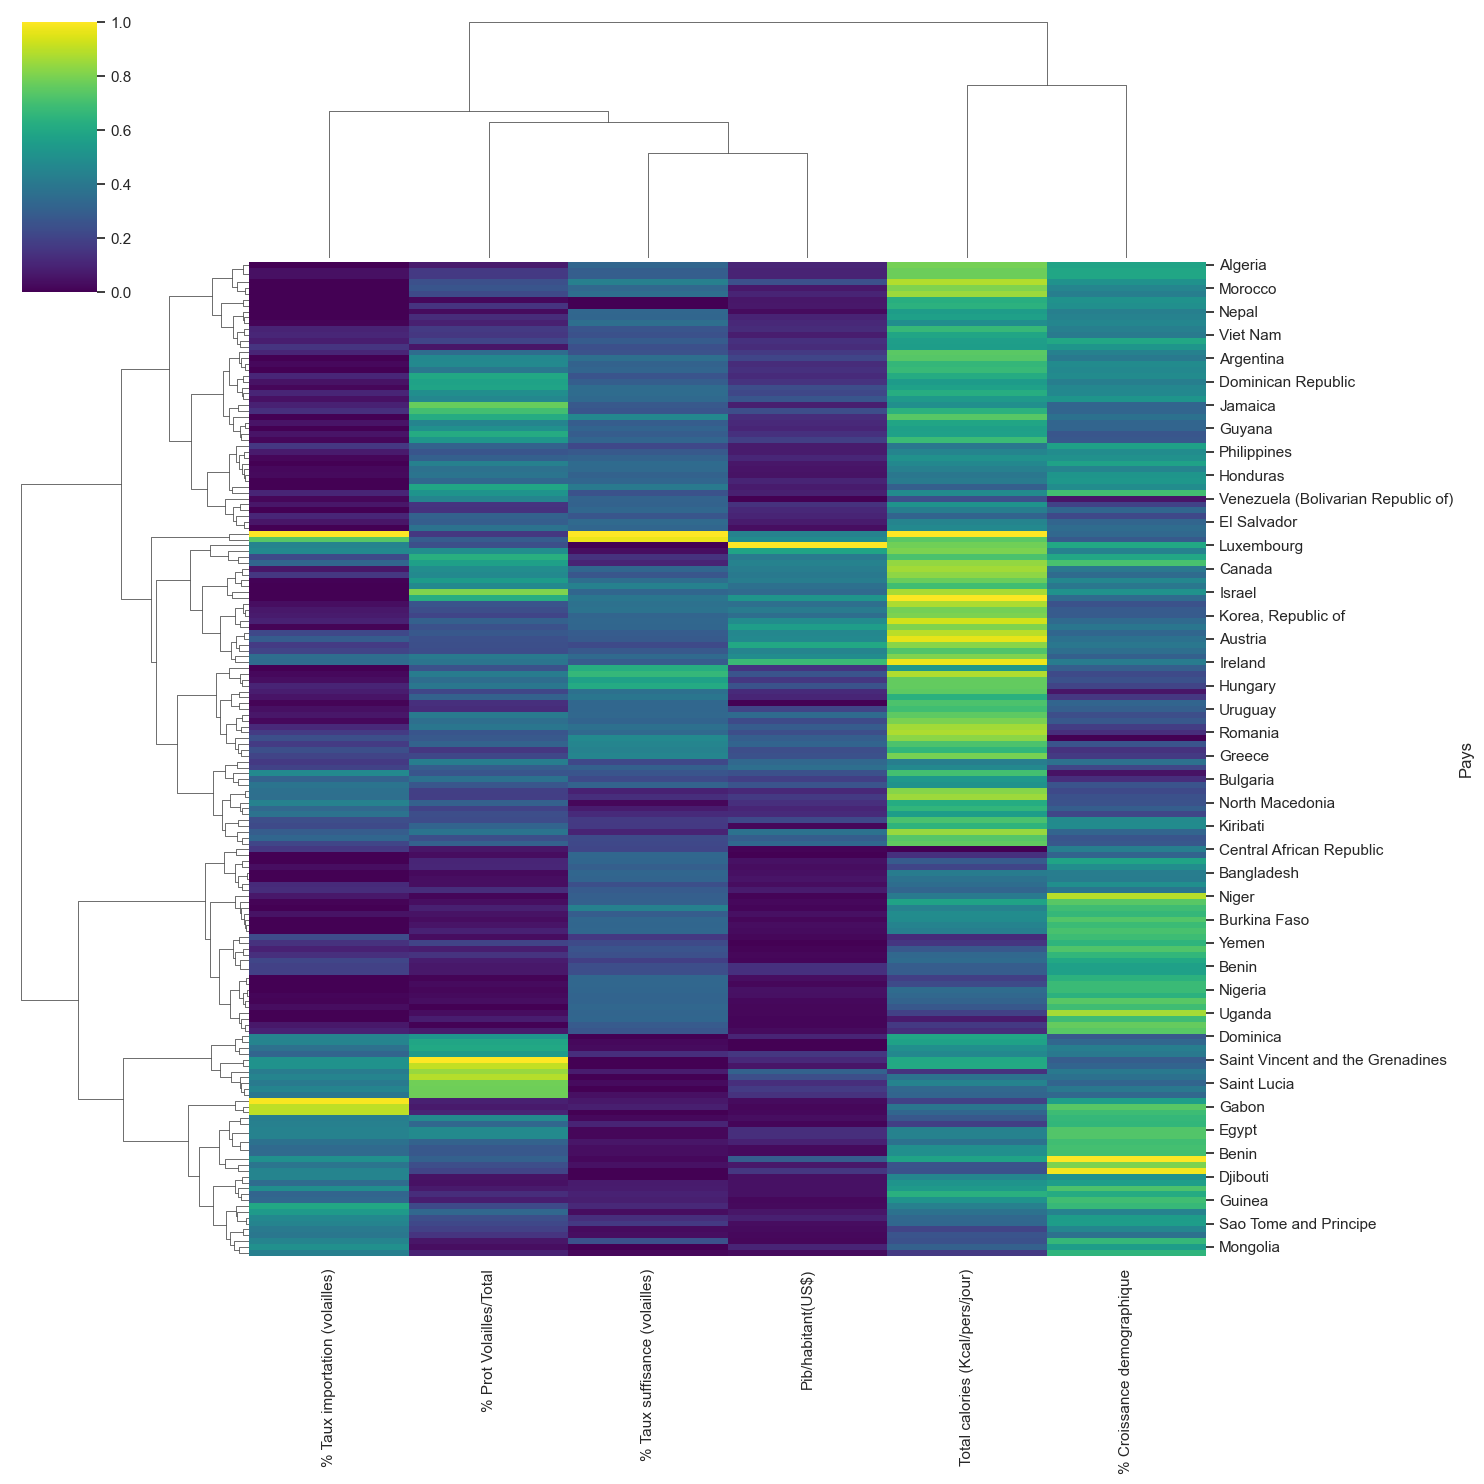

In [76]:
#heatmap avec les croisements entre les clusters de pays et les différentes variables
plt.figure(figsize=(7, 7))
sns.clustermap(df2, cmap = 'viridis',method = 'ward',metric = 'euclidean',standard_scale =1,figsize = (15, 15));
plt.savefig('Heatmap Cluster.jpg')

<h1> Analyse en Composante Principale (ACP)

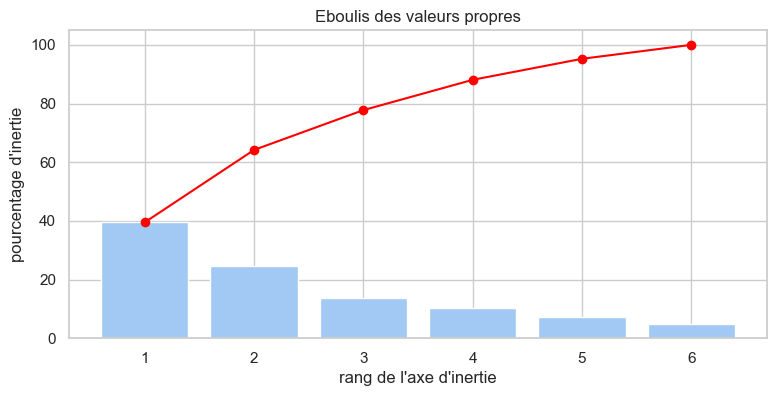

Variance expliquée : 64.2 % 
Variance par composante : [0.39496576 0.24683162]
La méthode du coude précise une forte représentation de nos variables sur les deux premières composantes principales, le premier axe factoriel


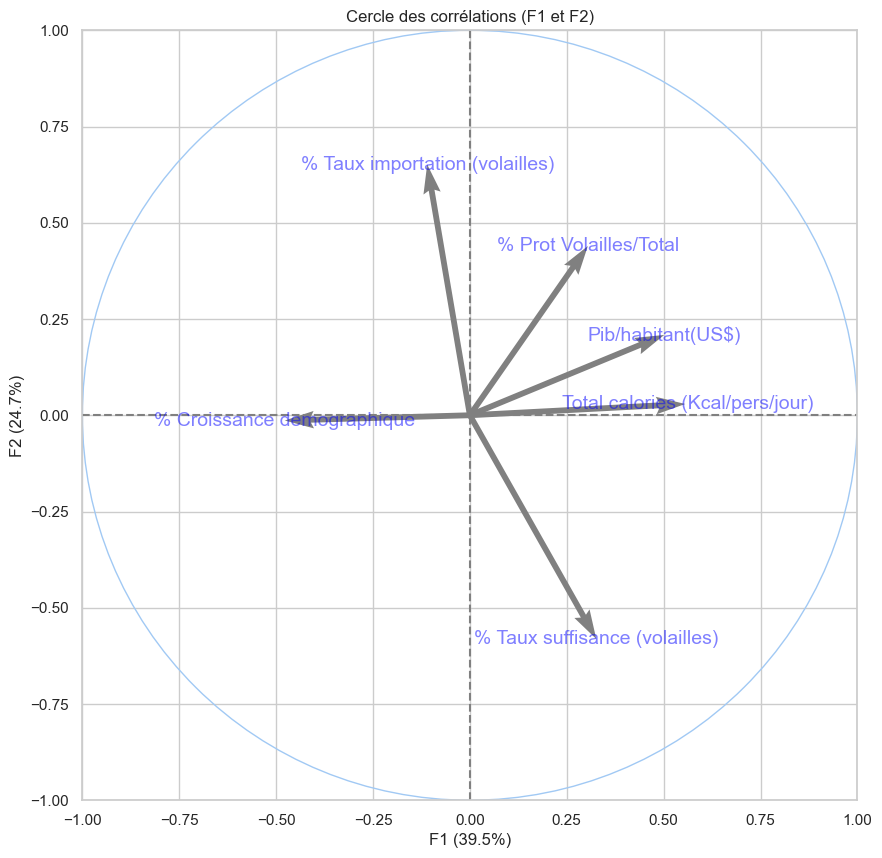

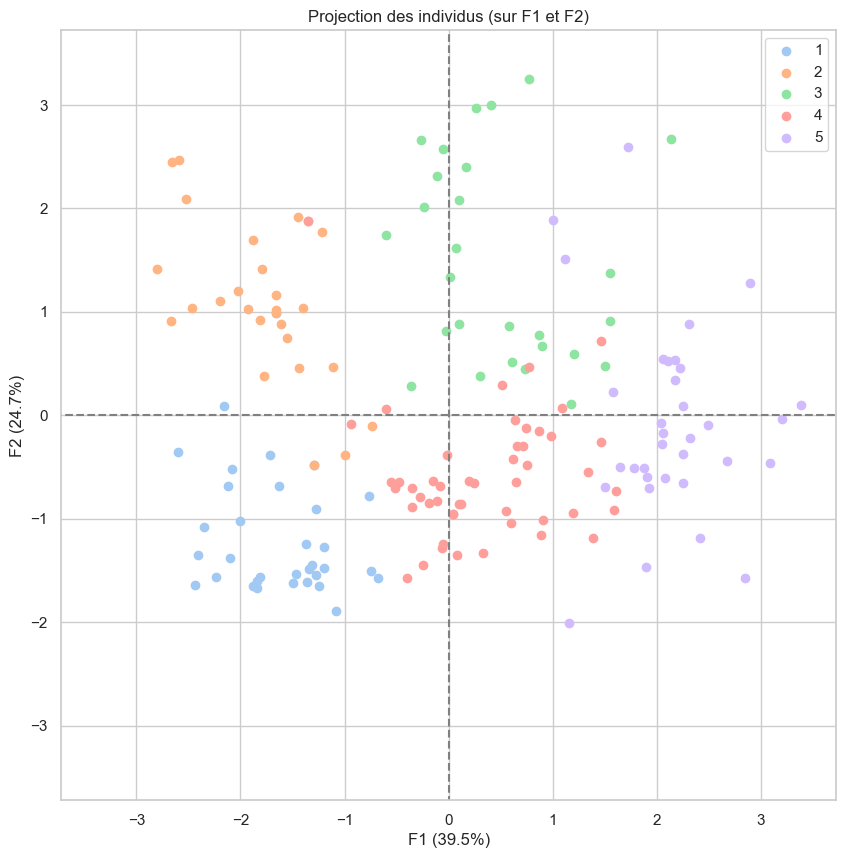

 Projection des centroïdes : 



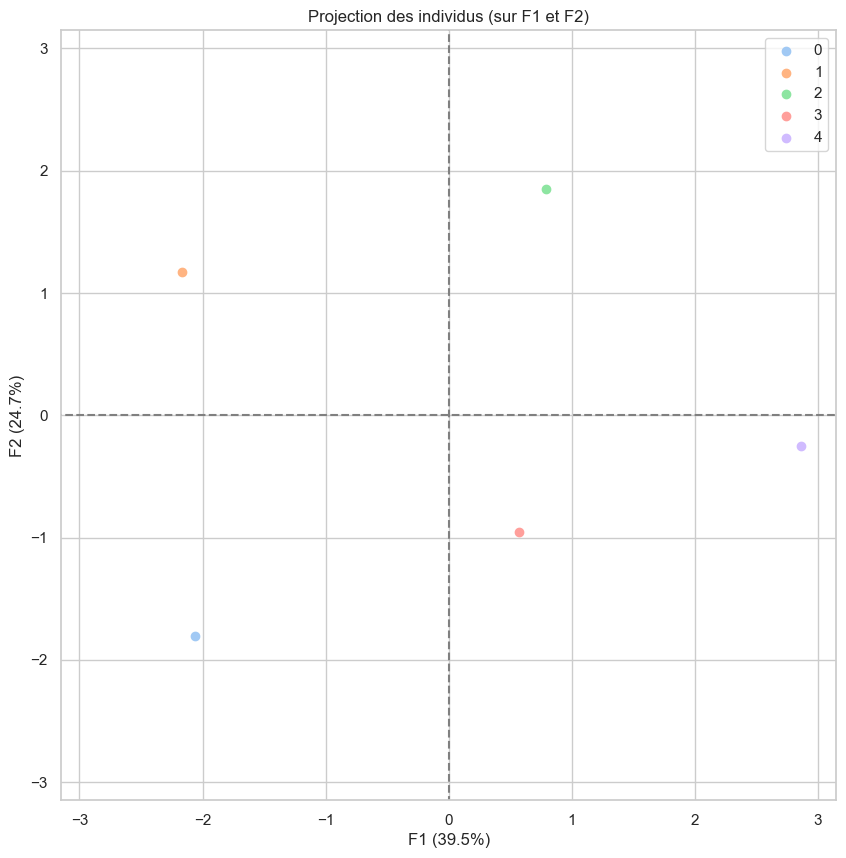

In [77]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

# choix du nombre de composantes à calculer
n_comp = 6

# import de l'échantillon
data_ = df[[' Total calories (Kcal/pers/jour)', '% Prot Volailles/Total',
       '% Taux importation (volailles)', '% Taux suffisance (volailles)',
       '% Croissance demographique', 'Pib/habitant(US$)']]

# selection des colonnes à prendre en compte dans l'ACP
data_pca = data_[[' Total calories (Kcal/pers/jour)', '% Prot Volailles/Total',
       '% Taux importation (volailles)', '% Taux suffisance (volailles)',
       '% Croissance demographique', 'Pib/habitant(US$)']]

# préparation des données pour l'ACP
#data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data_.index # ou data.index pour avoir les intitulés
features = data_.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)#ici

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

n_components = 2 # Nombre de composantes
pca = PCA(n_components=n_components).fit(X_scaled)
print('Variance expliquée :',
      round(sum(pca.explained_variance_ratio_) * 100, 1), '%',
      '\nVariance par composante :', pca.explained_variance_ratio_)

print (colored("La méthode du coude précise une forte représentation de nos variables sur les deux premières composantes principales, le premier axe factoriel",'red',attrs=['bold']))

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))

# Projection des individus

illustrative_var = df['Cluster']

X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var=illustrative_var)

print( " Projection des centroïdes : \n")
# Projection des centroïdes

df2 = df.groupby('Cluster').mean().reset_index()
df2 = df2.drop(columns='Cluster')

X = df2.values
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Projection des points dans le premier plan factoriel
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var=df2.index)

plt.show()

In [78]:
df_3 = df.copy()
df_3.drop(['Pays','Cluster'], axis = 1, inplace = True)

In [79]:
# création de la matrice de corrélation
t=pca.components_[:]
df_corr_comp = pd.DataFrame(t,index = ['F1', 'F2'],columns=df_3.columns)
df_corr_comp.head()

Total calories (Kcal/pers/jour)  % Prot Volailles/Total  \
F1                          0.555747                0.304500   
F2                          0.029228                0.439611   

    % Taux importation (volailles)  % Taux suffisance (volailles)  \
F1                       -0.110142                       0.326176   
F2                        0.651548                      -0.581086   

    % Croissance demographique  Pib/habitant(US$)  
F1                   -0.477773           0.501633  
F2                   -0.013688           0.208628

In [80]:
df

Pays   Total calories (Kcal/pers/jour)  \
0                 Afghanistan                            1997.0   
1                South Africa                            2987.0   
2                     Albania                            3400.0   
3                     Algeria                            3345.0   
4                     Germany                            3559.0   
..                        ...                               ...   
190      United Arab Emirates                            3370.0   
191                   Ecuador                            2585.0   
192  United States of America                            3762.0   
193                  Ethiopia                            2304.0   
194           Solomon Islands                            2410.0   

     % Prot Volailles/Total  % Taux importation (volailles)  \
0                      1.00                           50.88   
1                     16.93                           24.27   
2                      5.24                           80.85   
3                      2.12                            0.72   
4                      7.65                           48.42   
..                      ...                             ...   
190                   13.80                          105.10   
191                    9.35                            0.00   
192                   17.54                            0.67   
193                    0.06                            7.14   
194                    2.82                          200.00   

     % Taux suffisance (volailles)  % Croissance demographique  \
0                            49.12                        5.47   
1                            78.71                        2.93   
2                            27.66                       -0.22   
3                            99.28                        4.18   
4                            87.06                        1.06   
..                             ...                         ...   
190                          11.65                        2.42   
191                          99.71                        3.54   
192                         119.97                        1.31   
193                         100.00                        5.52   
194                           0.00                        5.46   

     Pib/habitant(US$)  Cluster  
0               2058.4        1  
1              13860.3        4  
2              12771.0        3  
3              11737.4        4  
4              53071.5        5  
..                 ...      ...  
190            67183.6        5  
191            11617.9        4  
192            59914.8        5  
193             2021.6        1  
194             2663.5        2  

[170 rows x 8 columns]

<h1> Radar chart

1) https://towardsdatascience.com/how-to-make-stunning-radar-charts-with-python-implemented-in-matplotlib-and-plotly-91e21801d8ca<br>
2) https://towardsdatascience.com/how-to-create-and-visualize-complex-radar-charts-f7764d0f3652

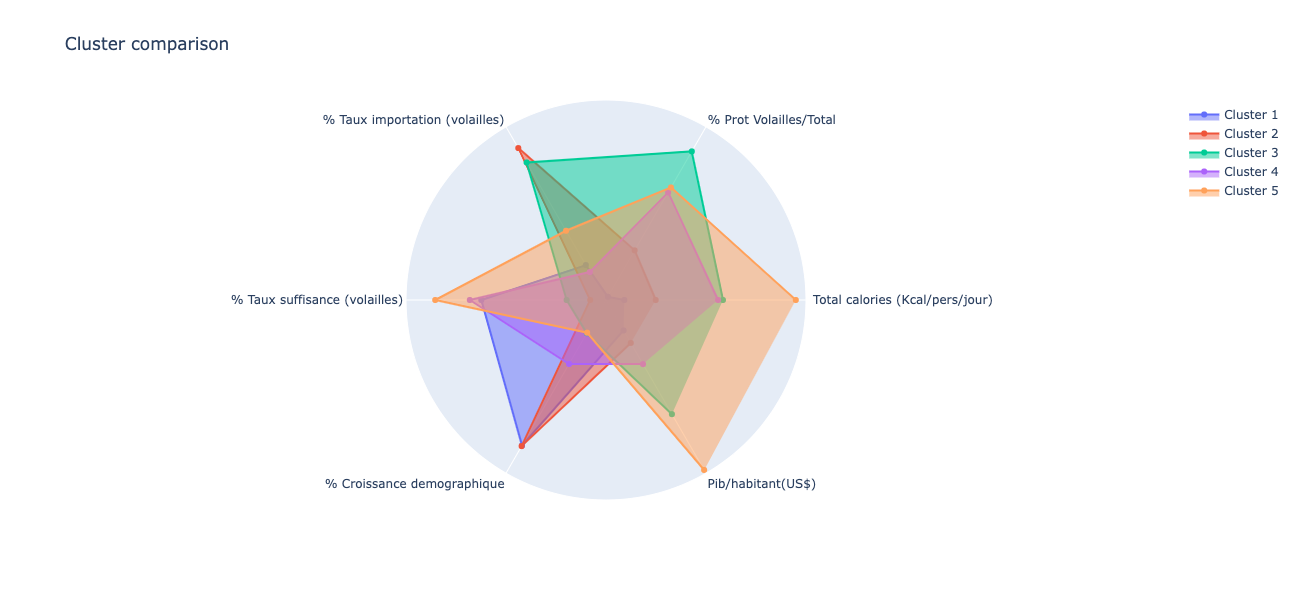

In [81]:
import plotly.graph_objects as go
import plotly.offline as pyo


rdr = (df.groupby(['Cluster']).mean()).round(2).reset_index()

# import de l'échantillon
data_ = rdr[[' Total calories (Kcal/pers/jour)', '% Prot Volailles/Total',
       '% Taux importation (volailles)', '% Taux suffisance (volailles)',
       '% Croissance demographique', 'Pib/habitant(US$)']]

# selection des colonnes à prendre en compte 
data_pca = data_[[' Total calories (Kcal/pers/jour)', '% Prot Volailles/Total',
       '% Taux importation (volailles)', '% Taux suffisance (volailles)',
       '% Croissance demographique', 'Pib/habitant(US$)']]

# préparation des données
X = data_pca.values
names = data_.index 
features = data_.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

categories = [' Total calories (Kcal/pers/jour)', '% Prot Volailles/Total',
       '% Taux importation (volailles)', '% Taux suffisance (volailles)',
       '% Croissance demographique', 'Pib/habitant(US$)']

# valeurs moyenne par cluster standardisée (X_scaled)

Cluster_1 = [-1.3300045 , -1.57506188, -0.95963746,  0.45980325,  1.18910036,
        -1.04659825]
Cluster_2 = [-0.80161092, -0.67396848,  1.31332713, -1.37266325,  1.20045758,
        -0.8040596 ]
Cluster_3 = [ 0.32966766,  1.249187  ,  1.03439039, -0.9755627 , -0.99148483,
         0.57966967]
Cluster_4 = [ 0.24663477,  0.45178107, -1.09461537,  0.65302082, -0.39523107,
        -0.3927077 ]
Cluster_5 = [ 1.55531299,  0.54806228, -0.29346469,  1.23540188, -1.00284204,
         1.66369589]

# Valeurs moyenne par cluster 

#Cluster_1 = [2344.03, 1.69, 15.47, 88.94, 4.85, 3311.01]
#Cluster_2 = [2537.04, 5.34, 101.52, 15.06, 4.87, 6998.07]
#Cluster_3 = [2950.27, 13.13, 90.96, 31.07, 1.01,28033.45]
#Cluster_4 = [2919.94, 9.9, 10.36, 96.73, 2.06, 13251.42]
#Cluster_5 = [3397.97, 10.29, 40.69, 120.21, 0.99, 44512.76]


fig = go.Figure(
    data=[
        go.Scatterpolar(r=Cluster_1, theta=categories, fill='toself', name='Cluster 1'),
        go.Scatterpolar(r=Cluster_2, theta=categories, fill='toself', name='Cluster 2'),
        go.Scatterpolar(r=Cluster_3, theta=categories, fill='toself', name='Cluster 3'),
        go.Scatterpolar(r=Cluster_4, theta=categories, fill='toself', name='Cluster 4'),
        go.Scatterpolar(r=Cluster_5, theta=categories, fill='toself', name='Cluster 5')
    ],
    layout=go.Layout(
        title=go.layout.Title(text='Cluster comparison'),
        polar={'radialaxis': {'visible': False}},
        showlegend=True
    )
)
fig.update_layout(
    autosize=True,
    width=800,
    height=600,
    margin=dict(
        l=50,
        r=50,
        b=100,
        t=100,
        pad=4
    ),
    paper_bgcolor="rgba(0,0,0,0)", plot_bgcolor="rgba(0,0,0,0)",
)

#pyo.plot(fig)
fig.show()

Nous souhaitons exporter vers des pays qui ont les caracteristiques suivantes :

- Consommation de viande de volailles dans une bonne proportion
- Taux de suffisance moyenne/basse
- Pib élevé / moyen
- Consommation caloriques moyen / élevé
- Taux d'importation élevé

In [82]:
# moyenne par cluster

rdr_1 = rdr.loc[rdr['Cluster'] == 1]

rdr_2 = rdr.loc[rdr['Cluster'] == 2]

rdr_3 = rdr.loc[rdr['Cluster'] == 3]

rdr_4 = rdr.loc[rdr['Cluster'] == 4]

rdr_5 = rdr.loc[rdr['Cluster'] == 5]

<h1> Choix du cluster

Choix selon les pays avec la consomation et l'importation de volailles la plus importante

In [136]:
# Df avec les continents

AE = pd.read_csv('df_final_merge.csv', sep =';')
AE.drop('Unnamed: 0', axis = 1, inplace = True)

In [137]:
AE.drop(columns=['pop_est', 'iso_a3', 'gdp_md_est', 'geometry',
       ' Total calories (Kcal/pers/jour)', '% Prot Volailles/Total',
       '% Taux importation (volailles)', '% Taux suffisance (volailles)',
       '% Croissance demographique', 'Pib/habitant(US$)', 'Cluster'], inplace = True)


In [138]:
df = pd.merge(df, AE, on='Pays', how= 'left')

In [86]:
df_cluster_3 = df[df['Cluster']==3]
df_cluster_3['Pays'].unique()

array(['Albania', 'Antigua and Barbuda', 'Armenia', 'Bahamas', 'Bulgaria',
       'Cyprus', 'Dominica', 'Estonia', 'Grenada', 'Georgia', 'Japan',
       'Kazakhstan', 'Kiribati', 'Latvia', 'Luxembourg',
       'North Macedonia', 'Malta', 'Montenegro', 'New Caledonia',
       'French Polynesia', 'Saint Kitts and Nevis',
       'Saint Vincent and the Grenadines', 'Saint Lucia', 'Samoa',
       'Slovakia', 'Suriname', 'Czechia'], dtype=object)

In [87]:
df[df.isna().any(axis=1)].groupby(['Cluster']).count()

Pays   Total calories (Kcal/pers/jour)  % Prot Volailles/Total  \
Cluster                                                                   
1           6                                 6                       6   
2           6                                 6                       6   
3          10                                10                      10   
4           8                                 8                       8   
5           4                                 4                       4   

         % Taux importation (volailles)  % Taux suffisance (volailles)  \
Cluster                                                                  
1                                     6                              6   
2                                     6                              6   
3                                    10                             10   
4                                     8                              8   
5                                     4                              4   

         % Croissance demographique  Pib/habitant(US$)  continent  
Cluster                                                            
1                                 6                  6          0  
2                                 6                  6          0  
3                                10                 10          0  
4                                 8                  8          0  
5                                 4                  4          0

In [88]:
df_cluster_3[df_cluster_3.isna().any(axis=1)]

Pays   Total calories (Kcal/pers/jour)  \
6                 Antigua and Barbuda                            2429.0   
41                           Dominica                            2945.0   
55                            Grenada                            2404.0   
79                           Kiribati                            3056.0   
93                              Malta                            3460.0   
119                  French Polynesia                            2917.0   
132             Saint Kitts and Nevis                            2517.0   
133  Saint Vincent and the Grenadines                            2962.0   
134                       Saint Lucia                            2658.0   
135                             Samoa                            2971.0   

     % Prot Volailles/Total  % Taux importation (volailles)  \
6                     21.90                          100.00   
41                    14.59                          100.00   
55                    21.96                           87.50   
79                     9.00                           50.00   
93                    10.90                           64.29   
119                   16.61                          100.00   
132                   25.01                          100.00   
133                   28.15                          112.50   
134                   22.03                           90.91   
135                   25.53                          113.33   

     % Taux suffisance (volailles)  % Croissance demographique  \
6                             0.00                        1.99   
41                            0.00                        0.39   
55                           12.50                        1.16   
79                           50.00                        2.91   
93                           28.57                        1.01   
119                           6.67                        1.09   
132                           0.00                        1.64   
133                           0.00                        0.62   
134                           9.09                        1.02   
135                           0.00                        0.95   

     Pib/habitant(US$)  Cluster continent  
6              19840.3        3       NaN  
41             11341.3        3       NaN  
55             16217.5        3       NaN  
79              2069.1        3       NaN  
93             43559.3        3       NaN  
119                0.0        3       NaN  
132            26980.3        3       NaN  
133            13102.1        3       NaN  
134            14928.4        3       NaN  
135             6486.1        3       NaN

In [89]:
# Remplacement ds valeurs manquante pour le continent

df_cluster_3.at[6, 'continent'] = 'North America'
df_cluster_3.at[41, 'continent'] = 'North America'
df_cluster_3.at[55, 'continent'] = 'North America'
df_cluster_3.at[79, 'continent'] = 'Oceania'
df_cluster_3.at[93, 'continent'] = 'Europe'
df_cluster_3.at[119, 'continent'] = 'Oceania'
df_cluster_3.at[132, 'continent'] = 'North America'
df_cluster_3.at[133, 'continent'] = 'North America'
df_cluster_3.at[134, 'continent'] = 'North America'
df_cluster_3.at[135, 'continent'] = 'Oceania'


<h2> Nombre de pays par continent dans le groupe retenu

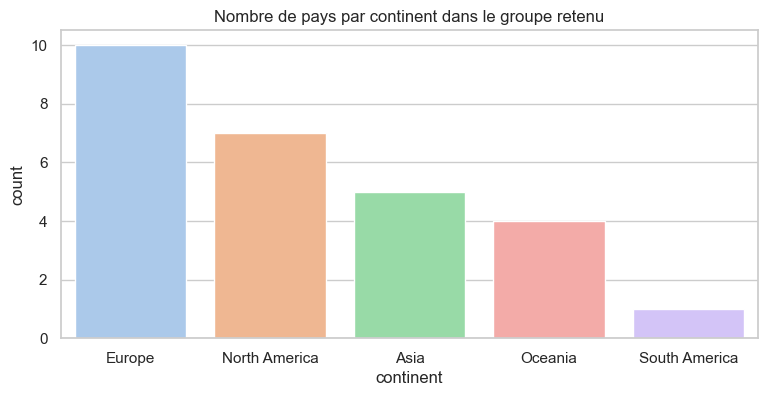

<Figure size 900x400 with 0 Axes>

In [90]:
sns.countplot(data=df_cluster_3, x='continent')
plt.title('Nombre de pays par continent dans le groupe retenu')
plt.show()
plt.savefig('nbre pays par continent.jpg')

In [91]:
Europe = df_cluster_3[df_cluster_3['continent']== 'Europe']
Europe

Pays   Total calories (Kcal/pers/jour)  \
2            Albania                            3400.0   
23          Bulgaria                            2827.0   
44           Estonia                            3241.0   
82            Latvia                            3170.0   
86        Luxembourg                            3334.0   
87   North Macedonia                            2996.0   
93             Malta                            3460.0   
99        Montenegro                            3478.0   
139         Slovakia                            2771.0   
149          Czechia                            3275.0   

     % Prot Volailles/Total  % Taux importation (volailles)  \
2                      5.24                           80.85   
23                    10.51                           68.79   
44                     6.78                           72.41   
82                     7.42                          104.88   
86                     6.80                          100.00   
87                     8.70                           97.56   
93                    10.90                           64.29   
99                     5.12                           80.00   
139                    7.61                           85.14   
149                    8.67                           46.59   

     % Taux suffisance (volailles)  % Croissance demographique  \
2                            27.66                       -0.22   
23                           68.15                       -1.35   
44                           68.97                        0.31   
82                           80.49                       -2.33   
86                            0.00                        4.44   
87                            4.88                        0.13   
93                           28.57                        1.01   
99                           40.00                        0.10   
139                          95.95                        0.23   
149                          65.46                        0.37   

     Pib/habitant(US$)  Cluster continent  
2              12771.0        3    Europe  
23             21469.9        3    Europe  
44             33821.9        3    Europe  
82             28673.6        3    Europe  
86            114986.0        3    Europe  
87             15706.4        3    Europe  
93             43559.3        3    Europe  
99             19682.3        3    Europe  
139            30061.6        3    Europe  
149            38824.9        3    Europe

In [92]:
North_America = df_cluster_3[df_cluster_3['continent']== 'North America']
North_America

Pays   Total calories (Kcal/pers/jour)  \
6                 Antigua and Barbuda                            2429.0   
13                            Bahamas                            2043.0   
41                           Dominica                            2945.0   
55                            Grenada                            2404.0   
132             Saint Kitts and Nevis                            2517.0   
133  Saint Vincent and the Grenadines                            2962.0   
134                       Saint Lucia                            2658.0   

     % Prot Volailles/Total  % Taux importation (volailles)  \
6                     21.90                          100.00   
13                    23.81                           92.31   
41                    14.59                          100.00   
55                    21.96                           87.50   
132                   25.01                          100.00   
133                   28.15                          112.50   
134                   22.03                           90.91   

     % Taux suffisance (volailles)  % Croissance demographique  \
6                             0.00                        1.99   
13                           23.08                        2.02   
41                            0.00                        0.39   
55                           12.50                        1.16   
132                           0.00                        1.64   
133                           0.00                        0.62   
134                           9.09                        1.02   

     Pib/habitant(US$)  Cluster      continent  
6              19840.3        3  North America  
13             35911.7        3  North America  
41             11341.3        3  North America  
55             16217.5        3  North America  
132            26980.3        3  North America  
133            13102.1        3  North America  
134            14928.4        3  North America

In [93]:
Asia = df_cluster_3[df_cluster_3['continent']== 'Asia']
Asia

Pays   Total calories (Kcal/pers/jour)  % Prot Volailles/Total  \
9      Armenia                            3072.0                    5.59   
34      Cyprus                            2612.0                   11.95   
61     Georgia                            2871.0                    6.75   
74       Japan                            2699.0                    8.37   
76  Kazakhstan                            3195.0                    6.51   

    % Taux importation (volailles)  % Taux suffisance (volailles)  \
9                            74.47                          23.40   
34                           36.84                          65.79   
61                           83.61                          36.07   
74                           44.27                          91.72   
76                           52.57                          51.66   

    % Croissance demographique  Pib/habitant(US$)  Cluster continent  
9                         0.66            12115.1        3      Asia  
34                        1.61            38288.0        3      Asia  
61                       -0.38            13589.7        3      Asia  
74                       -0.38            41444.2        3      Asia  
76                        2.89            24863.0        3      Asia

In [94]:
Oceania = df_cluster_3[df_cluster_3['continent']== 'Oceania']
Oceania

Pays   Total calories (Kcal/pers/jour)  \
79           Kiribati                            3056.0   
107     New Caledonia                            2750.0   
119  French Polynesia                            2917.0   
135             Samoa                            2971.0   

     % Prot Volailles/Total  % Taux importation (volailles)  \
79                     9.00                           50.00   
107                   16.90                           81.82   
119                   16.61                          100.00   
135                   25.53                          113.33   

     % Taux suffisance (volailles)  % Croissance demographique  \
79                           50.00                        2.91   
107                           9.09                        2.24   
119                           6.67                        1.09   
135                           0.00                        0.95   

     Pib/habitant(US$)  Cluster continent  
79              2069.1        3   Oceania  
107                0.0        3   Oceania  
119                0.0        3   Oceania  
135             6486.1        3   Oceania

In [95]:
South_America = df_cluster_3[df_cluster_3['continent']== 'South America']
South_America

Pays   Total calories (Kcal/pers/jour)  % Prot Volailles/Total  \
144  Suriname                            2694.0                   15.41   

     % Taux importation (volailles)  % Taux suffisance (volailles)  \
144                            72.0                           40.0   

     % Croissance demographique  Pib/habitant(US$)  Cluster      continent  
144                        2.03            18283.7        3  South America

https://stackoverflow.com/questions/68943476/mapping-a-dictionary-with-continent-country-to-a-dataframe-with-a-country-colum

<h1> Axe d'amélioration de l'étude

Afin d'affiner notre selection de pays, il pourait être envisageable de :

- Rajouter une variable droit de douane 
- Rajouter une variable pour le coût du transport

Dans le cadre d'une expansion future de la société il pourrait également être interessant de s'implanter dans 
un continent afin de reduire certains coûts ( logistique/douane ...). <br>
<br>

Les informations complémentaires suivantes seraient pertinentes :

- Coût main d'oeuvre 
- Capacité de production/élevage
- Stabilité politique


<h1> Geopandas

In [102]:
import matplotlib.pyplot as plt
from matplotlib import patheffects
#from cartopy import crs as ccrs
import geopandas
import os

In [103]:
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres')).drop(['pop_est', 'gdp_md_est'], axis=1)
world.rename(columns={'name': 'Pays'}, inplace=True)

In [104]:
#world.to_csv('/Users/ismaelh/Data Analyst/DA/Projet 9/countries/csv df pour pays /world_base.csv')

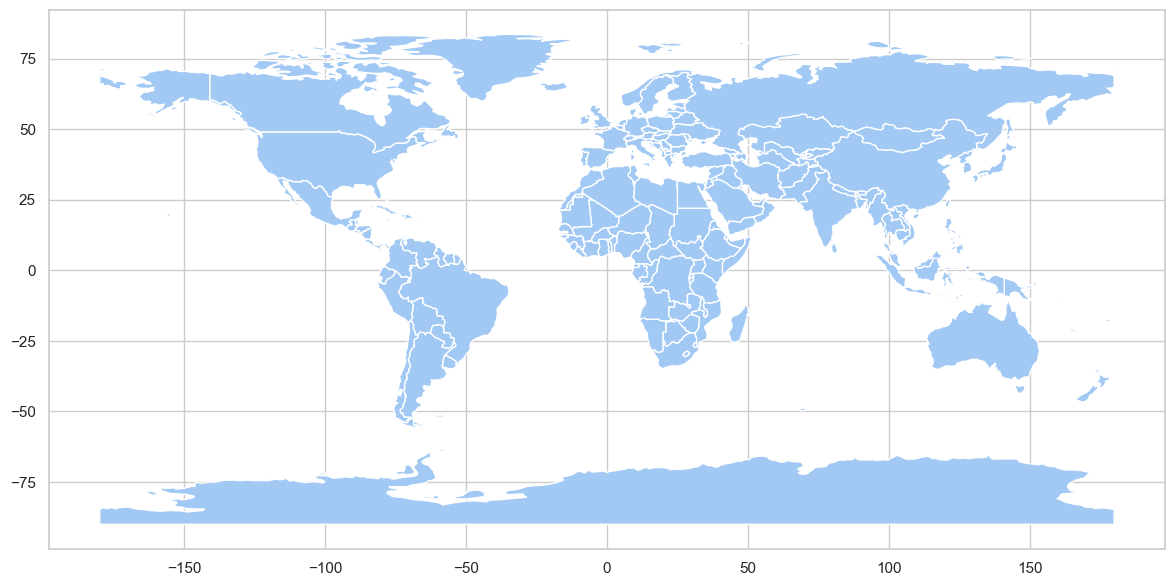

In [105]:
world.plot(figsize=(15,7));

In [106]:
world.columns

Index(['continent', 'Pays', 'iso_a3', 'geometry'], dtype='object')

In [107]:
world.shape

(177, 4)

In [108]:
world

continent                      Pays iso_a3  \
0          Oceania                      Fiji    FJI   
1           Africa                  Tanzania    TZA   
2           Africa                 W. Sahara    ESH   
3    North America                    Canada    CAN   
4    North America  United States of America    USA   
..             ...                       ...    ...   
172         Europe                    Serbia    SRB   
173         Europe                Montenegro    MNE   
174         Europe                    Kosovo    KOS   
175  North America       Trinidad and Tobago    TTO   
176         Africa                  S. Sudan    SSD   

                                              geometry  
0    MULTIPOLYGON (((180.00000 -16.06713, 180.00000...  
1    POLYGON ((33.90371 -0.95000, 34.07262 -1.05982...  
2    POLYGON ((-8.66559 27.65643, -8.66512 27.58948...  
3    MULTIPOLYGON (((-122.84000 49.00000, -122.9742...  
4    MULTIPOLYGON (((-122.84000 49.00000, -120.0000...  
..                                                 ...  
172  POLYGON ((18.82982 45.90887, 18.82984 45.90888...  
173  POLYGON ((20.07070 42.58863, 19.80161 42.50009...  
174  POLYGON ((20.59025 41.85541, 20.52295 42.21787...  
175  POLYGON ((-61.68000 10.76000, -61.10500 10.890...  
176  POLYGON ((30.83385 3.50917, 29.95350 4.17370, ...  

[177 rows x 4 columns]

In [134]:
final = pd.read_csv('df_final_1.csv',sep=';')
final.drop(['Unnamed: 0','Pays_en'], axis = 1, inplace = True)

In [111]:
final

Pays   Total calories (Kcal/pers/jour)  \
0                  Afghanistan                            1997.0   
1                      Albania                            3400.0   
2                      Algeria                            3345.0   
3                       Angola                            2266.0   
4          Antigua and Barbuda                            2429.0   
..                         ...                               ...   
166   Chine - RAS de Hong-Kong                            3353.0   
167       Chine - RAS de Macao                            2999.0   
168  Chine, Taiwan Province de                            2976.0   
169                 Costa Rica                            3013.0   
170                       Cuba                            3409.0   

     % Prot Volailles/Total  % Taux importation (volailles)  \
0                      1.00                           50.88   
1                      5.24                           80.85   
2                      2.12                            0.72   
3                      6.66                           86.83   
4                     21.90                          100.00   
..                      ...                             ...   
166                   16.14                          323.93   
167                   11.86                          121.05   
168                   12.85                           20.51   
169                    9.77                           12.69   
170                    8.05                           91.23   

     % Taux suffisance (volailles)  % Croissance demographique  \
0                            49.12                        5.47   
1                            27.66                       -0.22   
2                            99.28                        4.18   
3                            13.17                        6.93   
4                             0.00                        1.99   
..                             ...                         ...   
166                           8.57                        1.67   
167                          15.79                        3.40   
168                          83.06                        0.50   
169                          99.25                        2.11   
170                           8.48                        0.13   

     Pib/habitant(US$)  Cluster  
0               2058.4        1  
1              12771.0        3  
2              11737.4        4  
3               7310.9        2  
4              19840.3        3  
..                 ...      ...  
166            59842.2        3  
167           126144.0        3  
168                0.0        4  
169            20347.0        4  
170                0.0        3  

[171 rows x 8 columns]

In [112]:
world_f = pd.merge(world, final, how='inner', on='Pays')

In [113]:
# Pays non représentables sur la carte

map_missing = final[~final['Pays'].isin(world['Pays'])]
map_missing.groupby(['Cluster']).count()

Pays   Total calories (Kcal/pers/jour)  % Prot Volailles/Total  \
Cluster                                                                   
2           4                                 4                       4   
3          12                                12                      12   
4           5                                 5                       5   
5           1                                 1                       1   

         % Taux importation (volailles)  % Taux suffisance (volailles)  \
Cluster                                                                  
2                                     4                              4   
3                                    12                             12   
4                                     5                              5   
5                                     1                              1   

         % Croissance demographique  Pib/habitant(US$)  
Cluster                                                 
2                                 4                  4  
3                                12                 12  
4                                 5                  5  
5                                 1                  1

In [114]:
world_f[world_f.isna().any(axis=1)]

Empty GeoDataFrame
Columns: [continent, Pays, iso_a3, geometry,  Total calories (Kcal/pers/jour), % Prot Volailles/Total, % Taux importation (volailles), % Taux suffisance (volailles), % Croissance demographique, Pib/habitant(US$), Cluster]
Index: []

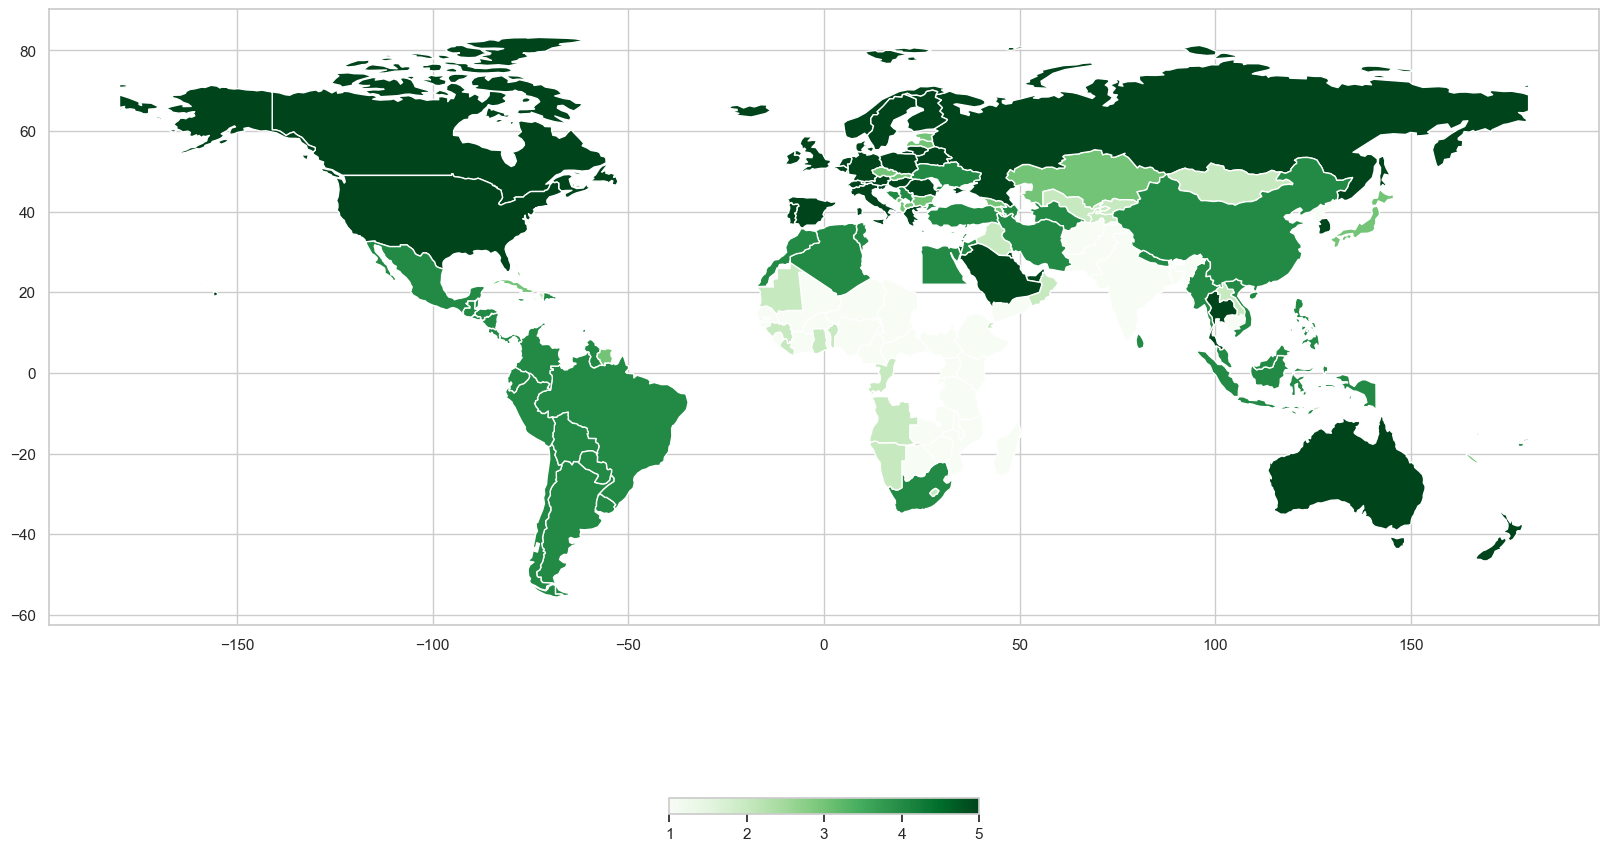

In [115]:
cluster_map = world_f.plot(column='Cluster',cmap='Greens',\
legend=True, 
legend_kwds={'shrink': 0.2,'orientation': "horizontal"}, figsize=(20, 15),\
missing_kwds={"color": "purple","edgecolor": "grey","hatch": "///","label": "Missing values"})

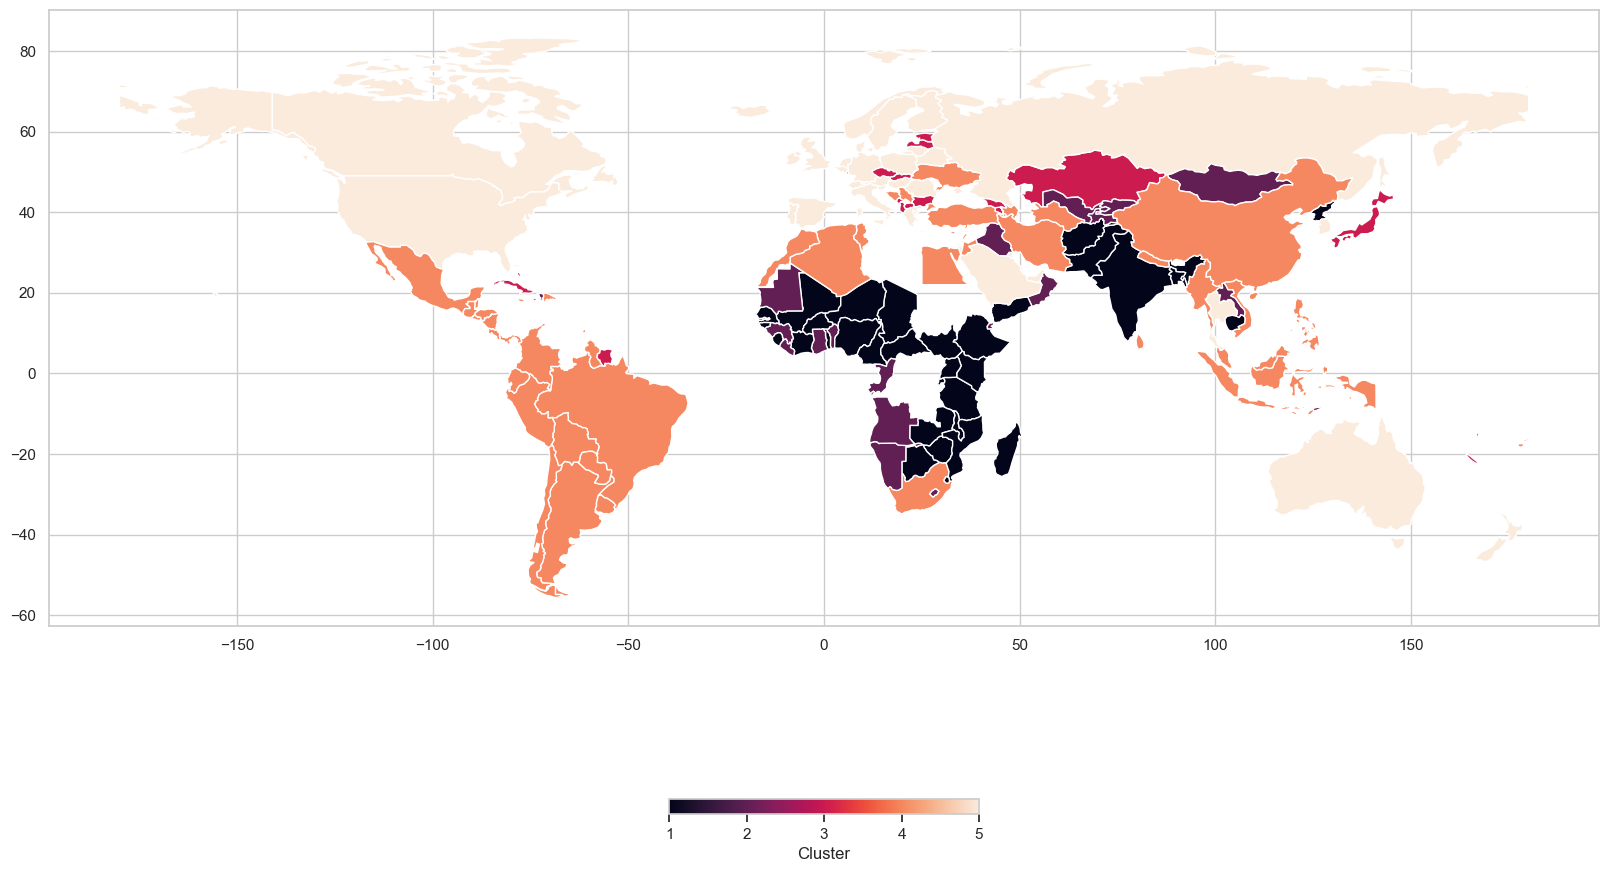

In [116]:
cluster_map = world_f.plot(column='Cluster',\
legend=True, 
legend_kwds={'shrink': 0.2,'label': "Cluster",
                            'orientation': "horizontal"}, figsize=(20, 15),\
missing_kwds={"color": "purple","edgecolor": "grey","hatch": "///","label": "Missing values"})



In [117]:
Pays_cluster_1 = world_f.loc[world_f['Cluster'] == 1]

Pays_cluster_2 = world_f.loc[world_f['Cluster'] == 2]

Pays_cluster_3 = world_f.loc[world_f['Cluster'] == 3]

Pays_cluster_4 = world_f.loc[world_f['Cluster'] == 4]

Pays_cluster_5 = world_f.loc[world_f['Cluster'] == 5]


<h2> Pays Cluster 1

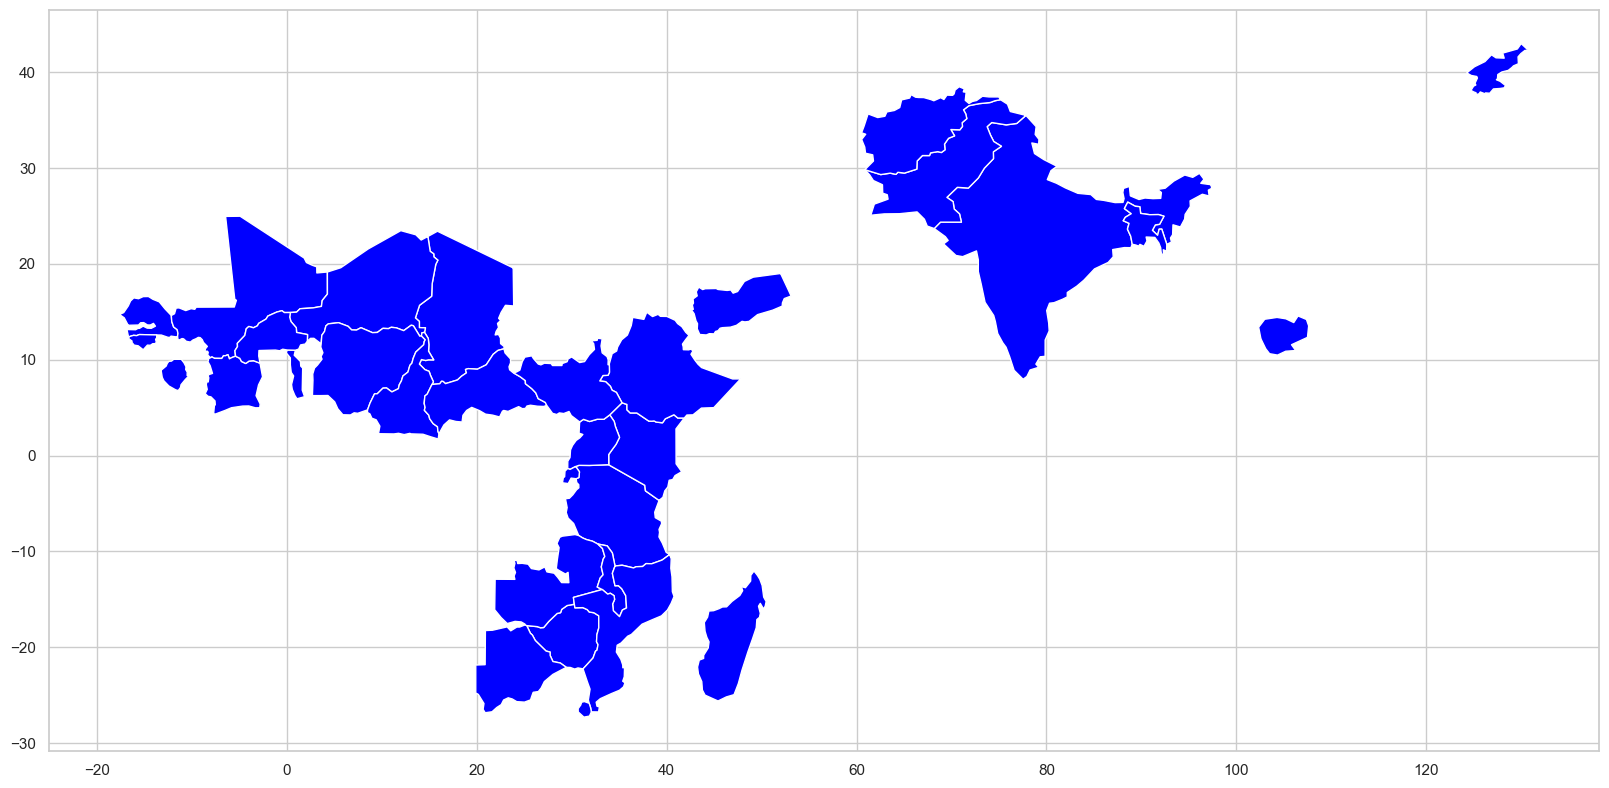

In [118]:
cluster_map = Pays_cluster_1.plot(column='Cluster',cmap='winter',\
legend=False, legend_kwds={'shrink': 0.3}, figsize=(20, 15),\
missing_kwds={"color": "purple","edgecolor": "grey","hatch": "///","label": "Missing values"})

<h2> Pays Cluster 2

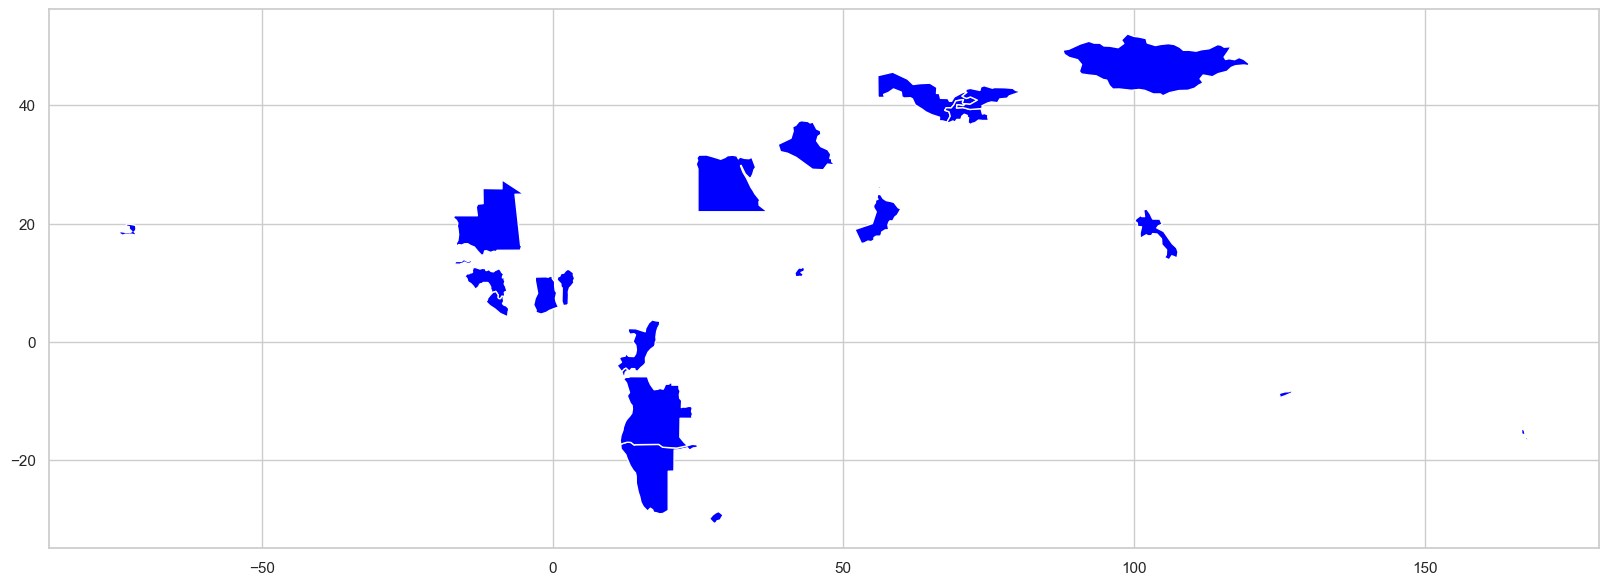

In [119]:
cluster_map = Pays_cluster_2.plot(column='Cluster',cmap= 'winter',\
legend=False, legend_kwds={'shrink': 0.3}, figsize=(20, 15),\
missing_kwds={"color": "purple","edgecolor": "grey","hatch": "///","label": "Missing values"})

<h2> Pays Cluster 3

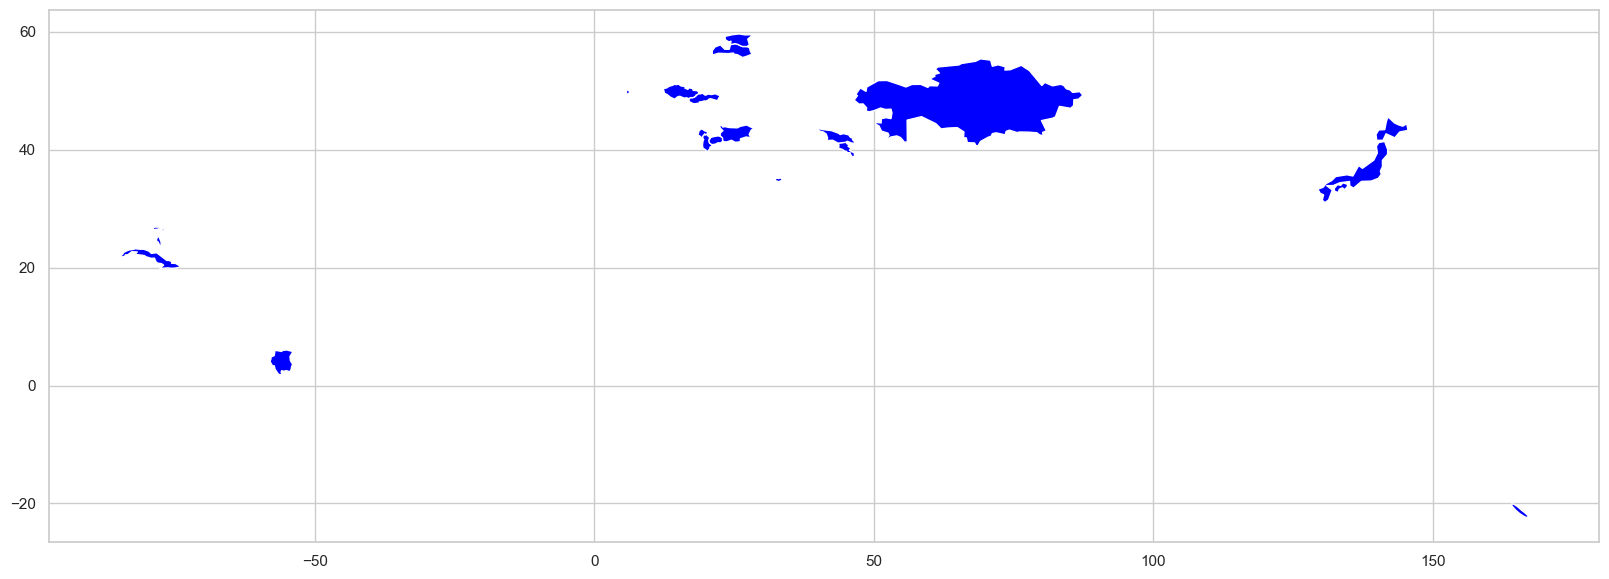

In [120]:
cluster_map = Pays_cluster_3.plot(column='Cluster',cmap= 'winter',\
legend=False, legend_kwds={'shrink': 0.3}, figsize=(20, 15),\
missing_kwds={"color": "purple","edgecolor": "grey","hatch": "///","label": "Missing values"})

<h2> Pays Cluster 4

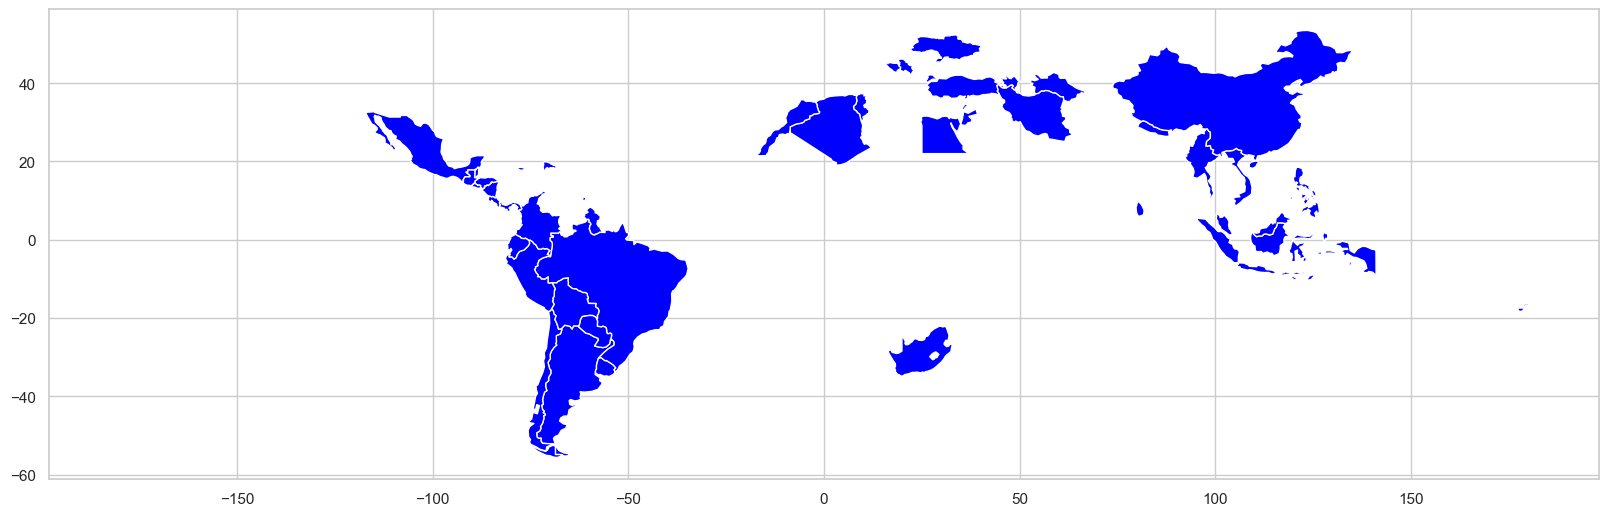

In [121]:
cluster_map = Pays_cluster_4.plot(column='Cluster',cmap= 'winter',\
legend=False, legend_kwds={'shrink': 0.3}, figsize=(20, 15),\
missing_kwds={"color": "purple","edgecolor": "grey","hatch": "///","label": "Missing values"})

<h2> Pays Cluster 5

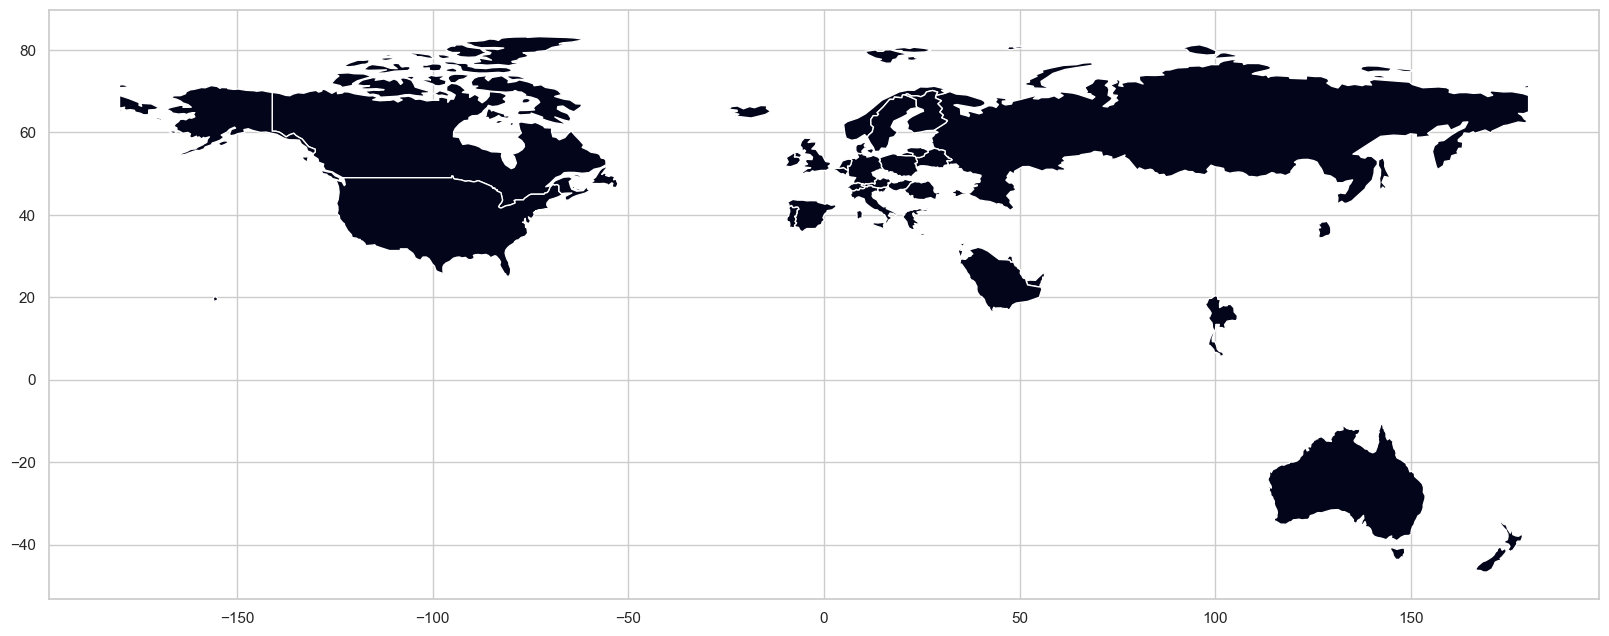

In [122]:
cluster_map = Pays_cluster_5.plot(column='Cluster',\
legend=False, legend_kwds={'shrink': 0.3}, figsize=(20, 15),\
missing_kwds={"color": "purple","edgecolor": "grey","hatch": "///","label": "Missing values"})

<h1> Map avec Plotly

In [123]:
import chart_studio.plotly as py
import plotly.offline as po
import plotly.graph_objs as pg

In [131]:
AE2 = pd.read_csv('iso_final.csv', sep = ';')

In [132]:
AE2.drop(['Unnamed: 0'], axis = 1, inplace = True)

In [133]:
AE2

Pays  Cluster iso_alpha
0                                    Afghanistan      1.0       AFG
1                                        Albania      3.0       ALB
2                                        Algeria      4.0       DZA
3                                         Angola      2.0       AGO
4                            Antigua and Barbuda      3.0       ATG
..                                           ...      ...       ...
167  Venezuela (Bolivarian RepVenezuelaublic of)      4.0       VEN
168                                      Vietnam      4.0       VNM
169                                        Yemen      1.0       YEM
170                                       Zambia      1.0       ZMB
171                                     Zimbabwe      1.0       ZWE

[172 rows x 3 columns]

In [140]:
Pays_clust_1 = AE2.loc[AE2['Cluster'] == 1]

Pays_clust_2 = AE2.loc[AE2['Cluster'] == 2]

Pays_clust_3 = AE2.loc[AE2['Cluster'] == 3]

Pays_clust_4 = AE2.loc[AE2['Cluster'] == 4]

Pays_clust_5 = AE2.loc[AE2['Cluster'] == 5]

In [141]:
data = dict(type='choropleth', 
            locations = AE2['iso_alpha'], 
            z = AE2['Cluster'], 
            text = AE2['Pays'])

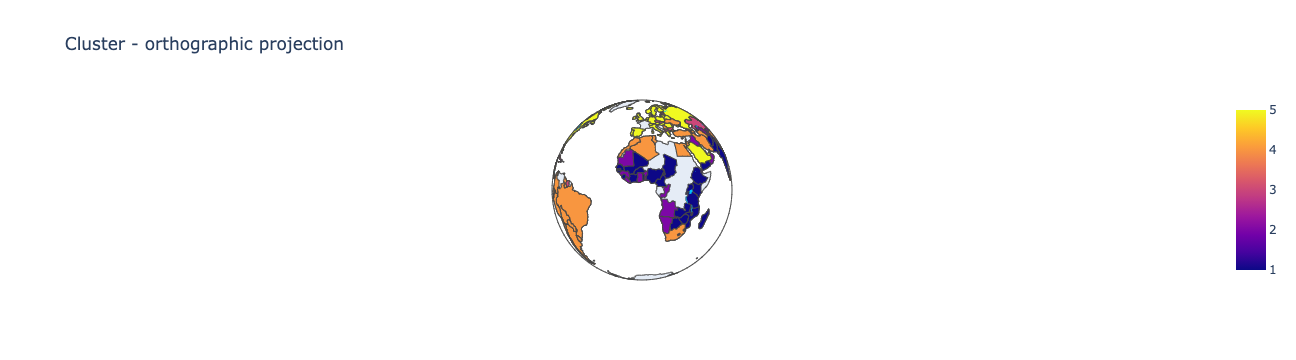

In [142]:
layout = dict(title = 'Cluster - orthographic projection', 
              geo = dict( projection = {'type':'orthographic'}, 
                       showlakes = True, 
                       lakecolor = 'rgb(0,191,255)'))
x = pg.Figure(data = [data], 
              layout = layout)
po.iplot(x)

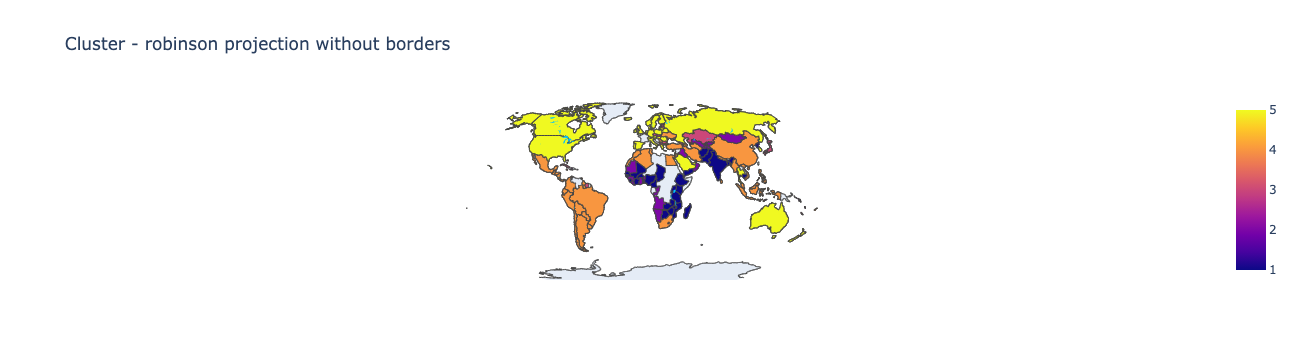

In [143]:
layout = dict(title = 'Cluster - robinson projection without borders', 
              geo = dict(showframe = False, 
                       projection = {'type':'robinson'}, 
                       showlakes = True, 
                       lakecolor = 'rgb(0,191,255)',
                        ),
             )
x = pg.Figure(data = [data], layout = layout)


po.iplot(x)

<h2>Pays cluster 1

In [144]:
data = dict(type='choropleth', 
            locations = Pays_clust_1['iso_alpha'], 
            z = Pays_clust_1['Cluster'], 
            text = Pays_clust_1['Pays'])

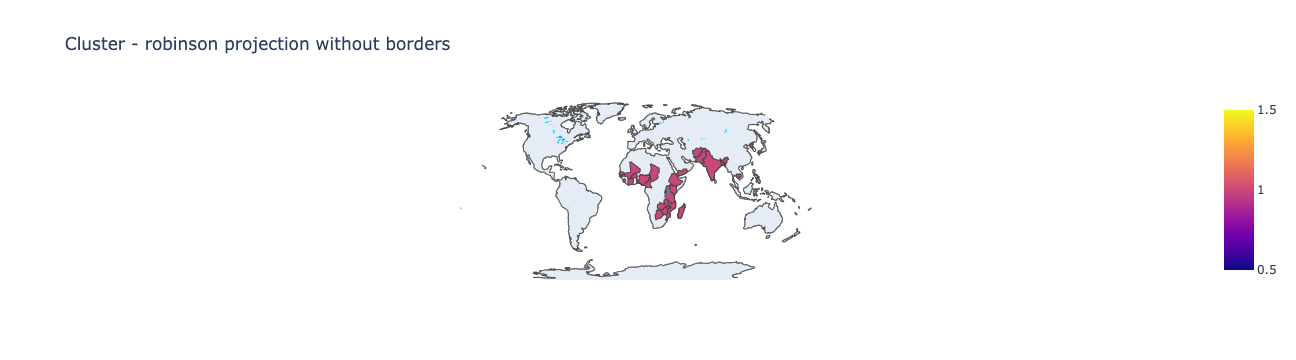

In [145]:
layout = dict(title = 'Cluster - robinson projection without borders', 
              geo = dict(showframe = False, 
                       projection = {'type':'robinson'}, 
                       showlakes = True, 
                       lakecolor = 'rgb(0,191,255)',
                        ),
             )
x = pg.Figure(data = [data], layout = layout)


po.iplot(x)

<h2>Pays cluster 2

In [146]:
data = dict(type='choropleth', 
            locations = Pays_clust_2['iso_alpha'], 
            z = Pays_clust_2['Cluster'], 
            text = Pays_clust_2['Pays'])

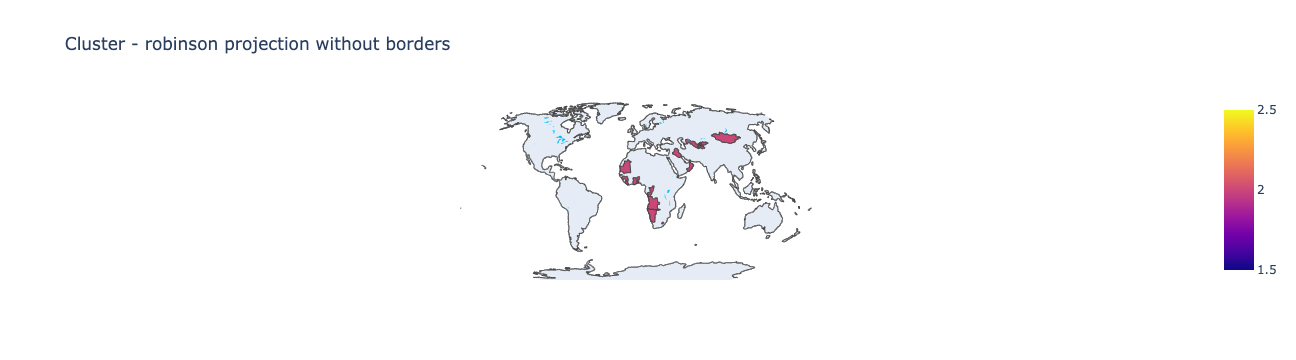

In [147]:
layout = dict(title = 'Cluster - robinson projection without borders', 
              geo = dict(showframe = False, 
                       projection = {'type':'robinson'}, 
                       showlakes = True, 
                       lakecolor = 'rgb(0,191,255)',
                        ),
             )
x = pg.Figure(data = [data], layout = layout)


po.iplot(x)

<h2>Pays cluster 3

In [148]:
data = dict(type='choropleth', 
            locations = Pays_clust_3['iso_alpha'], 
            z = Pays_clust_3['Cluster'], 
            text = Pays_clust_3['Pays'])

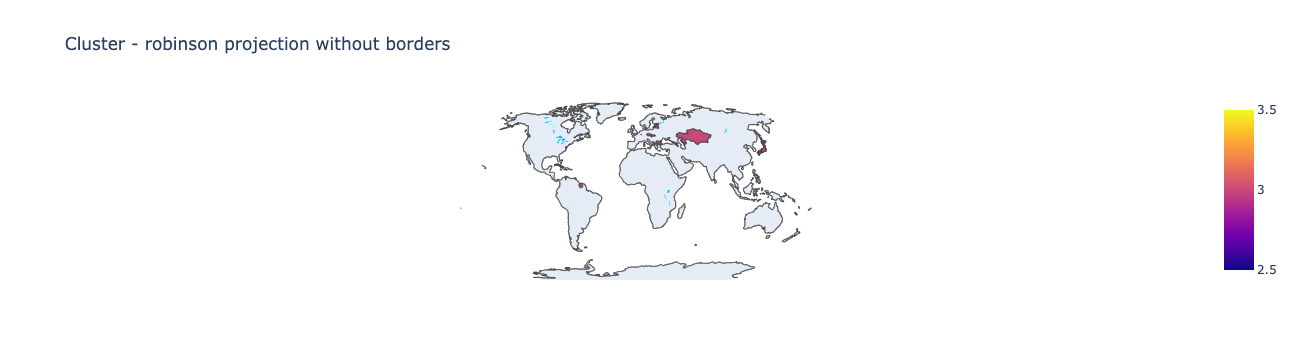

In [149]:
layout = dict(title = 'Cluster - robinson projection without borders', 
              geo = dict(showframe = False, 
                       projection = {'type':'robinson'}, 
                       showlakes = True, 
                       lakecolor = 'rgb(0,191,255)',
                        ),
             )
x = pg.Figure(data = [data], layout = layout)


po.iplot(x)

<h2>Pays cluster 4

In [150]:
data = dict(type='choropleth', 
            locations = Pays_clust_4['iso_alpha'], 
            z = Pays_clust_4['Cluster'], 
            text = Pays_clust_4['Pays'])

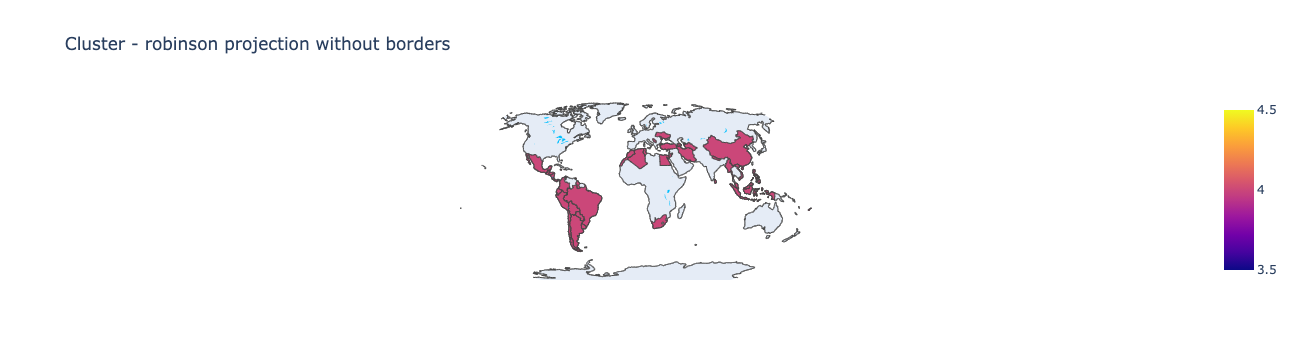

In [151]:
layout = dict(title = 'Cluster - robinson projection without borders', 
              geo = dict(showframe = False, 
                       projection = {'type':'robinson'}, 
                       showlakes = True, 
                       lakecolor = 'rgb(0,191,255)',
                        ),
             )
x = pg.Figure(data = [data], layout = layout)


po.iplot(x)

<h2>Pays cluster 5

In [152]:
data = dict(type='choropleth', 
            locations = Pays_clust_5['iso_alpha'], 
            z = Pays_clust_5['Cluster'], 
            text = Pays_clust_5['Pays'])

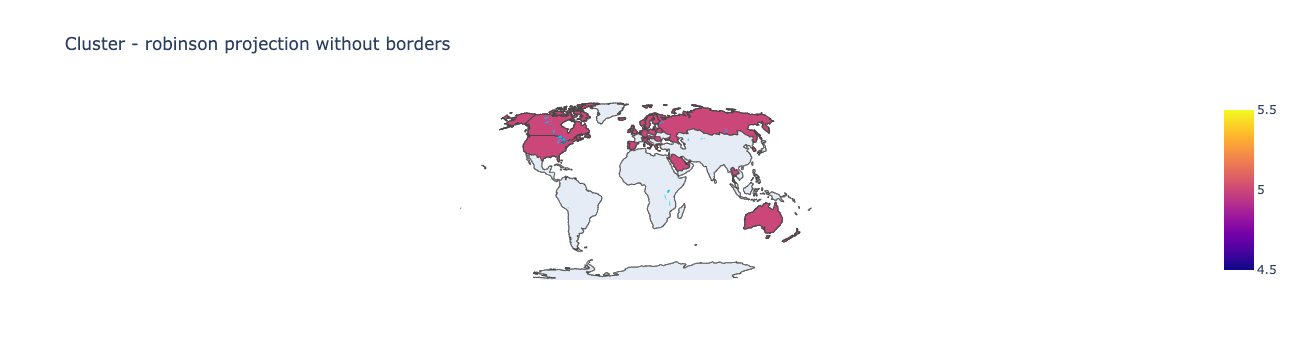

In [153]:
layout = dict(title = 'Cluster - robinson projection without borders', 
              geo = dict(showframe = False, 
                       projection = {'type':'robinson'}, 
                       showlakes = True, 
                       lakecolor = 'rgb(0,191,255)',
                        ),
             )
x = pg.Figure(data = [data], layout = layout)


po.iplot(x)